# 🚀 AlgVex 加密货币量化交易完整教程

**版本**: v5.0 系统集成版  
**更新日期**: 2025-12-23  
**适用对象**: 零基础新手到进阶用户  
**系统依赖**: 需要安装 algvex 包  
**预计学习时间**: 8-12小时

---

## 📖 教程说明

本教程是 **AlgVex** 加密货币量化交易平台的完整入门指南。AlgVex 融合了：

- **Qlib** (微软开源量化研究框架) - 用于因子研究和模型训练
- **Hummingbot** (专业交易执行引擎) - 用于实盘交易执行

### 🎯 学完本教程你将掌握：

1. 完整的环境搭建和问题排查
2. 加密货币数据的获取和处理
3. 11个MVP核心因子的计算原理
4. 使用Qlib进行因子研究和模型训练
5. 永续合约的回测方法
6. 风险管理和仓位控制
7. 使用Hummingbot进行实盘交易
8. 完整的端到端量化交易流程

---

## 📋 目录结构

| Part | 内容 | 预计时间 |
|------|------|----------|
| **Part 0** | 环境准备与Jupyter启动 | 30分钟 |
| **Part 1** | 配置与初始化 | 20分钟 |
| **Part 2** | 数据获取与存储 | 1小时 |
| **Part 3** | 数据探索与可视化 | 1小时 |
| **Part 4** | 因子计算与分析 | 2小时 |
| **Part 5** | 模型训练与评估 | 2小时 |
| **Part 6** | 信号生成与回测 | 2小时 |
| **Part 7** | 实盘部署 (可选) | 1小时 |

---

## ⚠️ 重要提示

> **免责声明**: 本教程仅供学习和研究使用。加密货币交易具有高风险，可能导致本金全部损失。请务必：
> - 只使用你能承受损失的资金
> - 在测试网充分测试后再进行实盘
> - 理解并接受所有相关风险

In [1]:
# ============================================================
#                    📦 依赖自动安装
# ============================================================
# 说明: 自动检查并安装所有必需和可选依赖
# 首次运行会安装缺失的包，后续运行会跳过已安装的包
# ============================================================

import subprocess
import sys

def install_packages(packages: dict, category: str):
    """检查并安装包"""
    installed = []
    failed = []
    
    for import_name, pip_name in packages.items():
        try:
            __import__(import_name)
            print(f"   ✅ {import_name}")
        except ImportError:
            print(f"   📥 安装 {pip_name}...")
            try:
                subprocess.check_call(
                    [sys.executable, "-m", "pip", "install", "-q", pip_name],
                    stdout=subprocess.DEVNULL,
                    stderr=subprocess.DEVNULL
                )
                installed.append(pip_name)
                print(f"   ✅ {import_name} (刚安装)")
            except Exception as e:
                failed.append(pip_name)
                print(f"   ❌ {import_name} 安装失败: {e}")
    
    return installed, failed

print("="*60)
print("📦 AlgVex 教程依赖安装")
print("="*60)

# ----------------------------------------------------------
# 必需依赖
# ----------------------------------------------------------
print("\n🔧 必需依赖 (核心功能):")
required = {
    "pandas": "pandas",
    "numpy": "numpy",
    "requests": "requests",
}
req_installed, req_failed = install_packages(required, "必需")

# ----------------------------------------------------------
# 可选依赖 - 全部安装
# ----------------------------------------------------------
print("\n🎨 可选依赖 (增强功能):")
optional = {
    "plotly": "plotly",           # 交互式可视化
    "matplotlib": "matplotlib",   # 备选可视化
    "lightgbm": "lightgbm",       # 机器学习模型
    "sklearn": "scikit-learn",    # 模型评估
    "yaml": "pyyaml",             # YAML 配置
    "loguru": "loguru",           # 日志增强
}
opt_installed, opt_failed = install_packages(optional, "可选")

# ----------------------------------------------------------
# 汇总
# ----------------------------------------------------------
print("\n" + "="*60)
total_installed = len(req_installed) + len(opt_installed)
total_failed = len(req_failed) + len(opt_failed)

if total_installed > 0:
    print(f"✅ 本次安装了 {total_installed} 个包")
    
if total_failed > 0:
    print(f"⚠️ {total_failed} 个包安装失败: {', '.join(req_failed + opt_failed)}")
    print("   可以手动安装: pip install " + " ".join(req_failed + opt_failed))

if req_failed:
    print("\n❌ 必需依赖安装失败，请手动安装后重试")
elif total_installed > 0:
    print("\n✅ 安装完成! 建议重启内核后继续运行")
else:
    print("\n✅ 所有依赖已就绪，可以继续运行教程!")
print("="*60)

📦 AlgVex 教程依赖安装

🔧 必需依赖 (核心功能):
   ✅ pandas
   ✅ numpy
   ✅ requests

🎨 可选依赖 (增强功能):
   ✅ plotly
   ✅ matplotlib
   ✅ lightgbm
   ✅ sklearn
   ✅ yaml
   ✅ loguru


✅ 所有依赖已就绪，可以继续运行教程!


In [2]:
# ============================================================
#                    🖥️ Jupyter 显示设置
# ============================================================
# 说明: 优化 Jupyter notebook 的显示效果
# - 输出框自动扩展 (不需要滚动)
# - 宽屏显示模式
# ============================================================

from IPython.display import display, HTML

# 1. 禁用输出滚动 - 让输出框自动扩展
display(HTML("""
<style>
    /* 禁用输出区域的滚动条，让内容完全展开 */
    .jp-OutputArea-output {
        overflow: visible !important;
        max-height: none !important;
    }
    
    /* Jupyter Notebook 经典版 */
    .output_subarea {
        overflow: visible !important;
        max-height: none !important;
    }
    
    /* 输出区域容器 */
    .jp-OutputArea {
        overflow: visible !important;
    }
    
    .output_scroll {
        box-shadow: none !important;
        -webkit-box-shadow: none !important;
    }
    
    /* 禁用自动折叠 */
    .output_wrapper {
        overflow: visible !important;
    }
</style>
"""))

# 2. 设置 pandas 显示选项
import pandas as pd
pd.set_option('display.max_rows', 100)        # 最多显示100行
pd.set_option('display.max_columns', 20)      # 最多显示20列
pd.set_option('display.width', None)          # 自动宽度
pd.set_option('display.max_colwidth', 50)     # 列内容最大宽度

# 3. 设置 numpy 打印选项
import numpy as np
np.set_printoptions(precision=4, suppress=True, linewidth=120)

print("✅ 显示设置已应用:")
print("   • 输出框自动扩展 (无需滚动)")
print("   • pandas 显示优化")
print("   • numpy 打印优化")

✅ 显示设置已应用:
   • 输出框自动扩展 (无需滚动)
   • pandas 显示优化
   • numpy 打印优化


In [4]:
# ============================================================
#            🔧 系统环境检查 (必须首先运行!)
# ============================================================
# 说明: 检查 AlgVex 系统是否正确安装
# 本教程为【系统集成版】，需要 algvex 包支持
# ============================================================

import sys
from pathlib import Path

# 检查 Python 版本
print("🔍 环境检查...")
print(f"   Python 版本: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")

if sys.version_info < (3, 9):
    print("   ❌ 需要 Python 3.9+")
else:
    print("   ✅ Python 版本符合要求")

# 添加 algvex 到路径
algvex_path = Path.cwd()
if 'algvex' in [p.name for p in algvex_path.iterdir() if p.is_dir()]:
    sys.path.insert(0, str(algvex_path))
    print(f"   ✅ AlgVex 路径已添加: {algvex_path}")

# 检查核心模块
modules_status = {}

def check_module(module_name, display_name):
    try:
        __import__(module_name)
        modules_status[display_name] = True
        return True
    except ImportError as e:
        modules_status[display_name] = False
        return False

# 检查 algvex 核心模块
print("\n📦 检查 AlgVex 模块...")

check_module('algvex.core', 'algvex.core')
check_module('algvex.core.canonical_hash', 'CanonicalHasher')
check_module('algvex.core.factor', 'FactorRegistry')
check_module('algvex.core.data.collector', 'BinanceDataCollector')
check_module('algvex.core.execution.hummingbot_bridge', 'HummingbotBridge')
check_module('algvex.core.execution.risk_manager', 'RiskManager')

for name, status in modules_status.items():
    icon = "✅" if status else "❌"
    print(f"   {icon} {name}")

# 检查第三方依赖
print("\n📦 检查第三方依赖...")
third_party = ['pandas', 'numpy', 'requests', 'yaml']
for pkg in third_party:
    check_module(pkg, pkg)
    icon = "✅" if modules_status.get(pkg, False) else "❌"
    print(f"   {icon} {pkg}")

# 总结
all_ok = all(modules_status.values())
print("\n" + "="*60)
if all_ok:
    print("✅ 所有模块检查通过! 可以继续运行教程")
else:
    print("⚠️ 部分模块缺失，请检查安装:")
    print("   pip install -r requirements.txt")
    print("   或确保在 algvex 项目根目录运行")
print("="*60)

# 设置全局变量
ALGVEX_AVAILABLE = all(v for k, v in modules_status.items() if 'algvex' in k.lower())
print(f"\nALGVEX_AVAILABLE = {ALGVEX_AVAILABLE}")


🔍 环境检查...
   Python 版本: 3.10.11
   ✅ Python 版本符合要求
   ✅ AlgVex 路径已添加: F:\qlib_project

📦 检查 AlgVex 模块...
   ✅ algvex.core
   ✅ CanonicalHasher
   ✅ FactorRegistry
   ✅ BinanceDataCollector
   ✅ HummingbotBridge
   ✅ RiskManager

📦 检查第三方依赖...
   ✅ pandas
   ✅ numpy
   ✅ requests
   ✅ yaml

✅ 所有模块检查通过! 可以继续运行教程

ALGVEX_AVAILABLE = True


# Part 0: 环境准备与Jupyter启动

## 0.1 系统要求

在开始之前，请确保你的系统满足以下要求：

| 项目 | 最低要求 | 推荐配置 |
|------|----------|----------|
| **操作系统** | Windows 10 / macOS 10.15 / Ubuntu 18.04 | Windows 11 / macOS 13 / Ubuntu 22.04 |
| **Python** | 3.9 | 3.11 |
| **内存** | 8GB | 16GB+ |
| **硬盘** | 20GB可用空间 | 50GB+ SSD |
| **网络** | 稳定的互联网连接 | 低延迟网络 |

---

## 0.2 Jupyter 启动方法

### 方法1: 命令行启动 (推荐)

```bash
# ============================================================
# 步骤1: 打开终端/命令提示符
# ============================================================
# Windows: 按 Win+R, 输入 cmd, 回车
# macOS: 按 Cmd+Space, 输入 Terminal, 回车
# Linux: 按 Ctrl+Alt+T

# ============================================================
# 步骤2: 进入项目目录
# ============================================================
# Windows 示例:
cd C:\Users\你的用户名\qlib

# macOS/Linux 示例:
cd ~/qlib

# ============================================================
# 步骤3: 激活虚拟环境 (如果有)
# ============================================================
# Windows:
venv\Scripts\activate

# macOS/Linux:
source venv/bin/activate

# ============================================================
# 步骤4: 启动 Jupyter Notebook
# ============================================================
jupyter notebook

# 或者启动 Jupyter Lab (更现代的界面):
jupyter lab
```

### 方法2: Anaconda Navigator 启动

1. 打开 Anaconda Navigator
2. 选择你的环境 (如果有多个)
3. 点击 Jupyter Notebook 的 "Launch" 按钮

### 方法3: VS Code 启动

1. 安装 VS Code 的 Jupyter 扩展
2. 打开 .ipynb 文件
3. 选择 Python 内核

---

## 0.3 常见启动问题与解决方案

In [5]:
# ============================================================
# 问题诊断代码 - 运行此单元格检测常见问题
# ============================================================

import sys
import os

def diagnose_environment():
    """
    诊断运行环境，检测常见问题
    
    这个函数会检查：
    1. Python 版本是否符合要求
    2. 是否在正确的目录
    3. 关键依赖是否已安装
    4. 网络连接是否正常
    """
    print("="*60)
    print("🔍 环境诊断报告")
    print("="*60)
    
    # ----------------------------------------------------------
    # 检查1: Python 版本
    # ----------------------------------------------------------
    print("\n📌 检查1: Python 版本")
    py_version = sys.version_info
    print(f"   当前版本: Python {py_version.major}.{py_version.minor}.{py_version.micro}")
    
    if py_version.major < 3 or (py_version.major == 3 and py_version.minor < 9):
        print("   ❌ 版本过低! 需要 Python 3.9 或更高版本")
        print("   💡 解决方案: 请安装 Python 3.9+ 或使用 Anaconda")
    elif py_version.minor >= 12:
        print("   ⚠️ 版本较新，部分库可能不兼容")
        print("   💡 建议: 推荐使用 Python 3.10 或 3.11")
    else:
        print("   ✅ 版本符合要求")
    
    # ----------------------------------------------------------
    # 检查2: 当前工作目录
    # ----------------------------------------------------------
    print("\n📌 检查2: 工作目录")
    cwd = os.getcwd()
    print(f"   当前目录: {cwd}")
    
    # 检查是否在正确的项目目录
    if os.path.exists(os.path.join(cwd, 'algvex')):
        print("   ✅ 在正确的项目根目录")
    elif 'algvex' in cwd:
        print("   ⚠️ 在 algvex 子目录中")
        print("   💡 建议: 返回上级目录 (qlib/)")
    else:
        print("   ⚠️ 可能不在项目目录")
        print("   💡 建议: 请 cd 到包含 algvex 文件夹的目录")
    
    # ----------------------------------------------------------
    # 检查3: 关键依赖
    # ----------------------------------------------------------
    print("\n📌 检查3: 关键依赖")
    
    dependencies = [
        ('numpy', 'numpy', '数值计算'),
        ('pandas', 'pandas', '数据处理'),
        ('matplotlib', 'matplotlib', '绑图'),
        ('scipy', 'scipy', '科学计算'),
        ('sklearn', 'scikit-learn', '机器学习'),
        ('lightgbm', 'lightgbm', '梯度提升模型'),
        ('yaml', 'pyyaml', '配置文件解析'),
        ('requests', 'requests', 'HTTP请求'),
    ]
    
    missing = []
    for import_name, pip_name, desc in dependencies:
        try:
            __import__(import_name)
            print(f"   ✅ {pip_name} ({desc})")
        except ImportError:
            print(f"   ❌ {pip_name} ({desc}) - 未安装")
            missing.append(pip_name)
    
    if missing:
        print(f"\n   💡 安装缺失依赖: pip install {' '.join(missing)}")
    
    # ----------------------------------------------------------
    # 检查4: 可选依赖
    # ----------------------------------------------------------
    print("\n📌 检查4: 可选依赖")
    
    optional_deps = [
        ('qlib', 'pyqlib', 'Qlib量化框架'),
        ('torch', 'torch', 'PyTorch深度学习'),
        ('xgboost', 'xgboost', 'XGBoost模型'),
        ('catboost', 'catboost', 'CatBoost模型'),
    ]
    
    for import_name, pip_name, desc in optional_deps:
        try:
            __import__(import_name)
            print(f"   ✅ {pip_name} ({desc})")
        except ImportError:
            print(f"   ⚪ {pip_name} ({desc}) - 未安装 (可选)")
    
    # ----------------------------------------------------------
    # 检查5: 网络连接
    # ----------------------------------------------------------
    print("\n📌 检查5: 网络连接")
    try:
        import urllib.request
        urllib.request.urlopen('https://api.binance.com/api/v3/ping', timeout=5)
        print("   ✅ Binance API 可访问")
    except Exception as e:
        print(f"   ❌ Binance API 无法访问: {e}")
        print("   💡 可能原因: 网络问题或需要VPN")
    
    print("\n" + "="*60)
    print("诊断完成!")
    print("="*60)

# 运行诊断
diagnose_environment()

🔍 环境诊断报告

📌 检查1: Python 版本
   当前版本: Python 3.10.11
   ✅ 版本符合要求

📌 检查2: 工作目录
   当前目录: F:\qlib_project
   ✅ 在正确的项目根目录

📌 检查3: 关键依赖
   ✅ numpy (数值计算)
   ✅ pandas (数据处理)
   ✅ matplotlib (绑图)
   ✅ scipy (科学计算)
   ✅ scikit-learn (机器学习)
   ✅ lightgbm (梯度提升模型)
   ✅ pyyaml (配置文件解析)
   ✅ requests (HTTP请求)

📌 检查4: 可选依赖
   ✅ pyqlib (Qlib量化框架)
   ⚪ torch (PyTorch深度学习) - 未安装 (可选)
   ✅ xgboost (XGBoost模型)
   ⚪ catboost (CatBoost模型) - 未安装 (可选)

📌 检查5: 网络连接
   ✅ Binance API 可访问

诊断完成!


## 0.4 常见问题解决方案

### 问题1: "jupyter: command not found"

**原因**: Jupyter 未安装或未添加到系统路径

**解决方案**:
```bash
# 方案A: 安装 Jupyter
pip install jupyter notebook jupyterlab

# 方案B: 使用 python -m 方式启动
python -m jupyter notebook

# 方案C: 检查 PATH (Windows)
# 将 Python Scripts 目录添加到系统 PATH
# 通常是: C:\Users\你的用户名\AppData\Local\Programs\Python\Python311\Scripts
```

### 问题2: 浏览器未自动打开

**解决方案**:
```bash
# 手动复制终端显示的 URL，例如:
# http://localhost:8888/?token=xxxx
# 粘贴到浏览器地址栏

# 或者指定浏览器启动:
jupyter notebook --browser=chrome
```

### 问题3: 端口被占用

**错误信息**: "Port 8888 is already in use"

**解决方案**:
```bash
# 方案A: 使用其他端口
jupyter notebook --port=8889

# 方案B: 关闭占用端口的进程
# Windows:
netstat -ano | findstr :8888
taskkill /PID <进程ID> /F

# macOS/Linux:
lsof -i :8888
kill -9 <进程ID>
```

### 问题4: 内核无法启动

**解决方案**:
```bash
# 重新安装 ipykernel
pip uninstall ipykernel
pip install ipykernel

# 重新注册内核
python -m ipykernel install --user
```

### 问题5: 中文乱码

**解决方案**:
```python
# 在 Notebook 开头添加:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
```

## 0.5 依赖安装

运行以下单元格安装所需依赖。如果已经安装，会显示"已满足要求"。

In [6]:
# ============================================================
# 依赖安装脚本 - 智能检测并安装缺失的依赖
# ============================================================

import subprocess
import sys

def check_and_install(package_name, import_name=None):
    """
    检查包是否已安装，如果未安装则安装
    
    参数:
        package_name: pip 包名 (用于安装)
        import_name: 导入名 (用于检查)，如果与包名不同
    
    返回:
        bool: 是否安装成功或已安装
    """
    import_name = import_name or package_name
    
    try:
        __import__(import_name)
        print(f"✅ {package_name} 已安装")
        return True
    except ImportError:
        print(f"📦 正在安装 {package_name}...")
        try:
            subprocess.check_call([
                sys.executable, '-m', 'pip', 'install', 
                package_name, '-q', '--disable-pip-version-check'
            ])
            print(f"✅ {package_name} 安装成功")
            return True
        except subprocess.CalledProcessError as e:
            print(f"❌ {package_name} 安装失败: {e}")
            return False

print("="*60)
print("📦 开始检查和安装依赖")
print("="*60)

# ----------------------------------------------------------
# 核心依赖 (必须安装)
# ----------------------------------------------------------
print("\n🔷 核心依赖:")
core_deps = [
    ('numpy', 'numpy'),           # 数值计算基础库
    ('pandas', 'pandas'),         # 数据处理和分析
    ('scipy', 'scipy'),           # 科学计算
    ('matplotlib', 'matplotlib'), # 绑图库
    ('seaborn', 'seaborn'),       # 统计图表
    ('scikit-learn', 'sklearn'),  # 机器学习
    ('pyyaml', 'yaml'),           # YAML配置解析
    ('requests', 'requests'),     # HTTP请求
    ('aiohttp', 'aiohttp'),       # 异步HTTP
    ('python-dotenv', 'dotenv'),  # 环境变量管理
]

for pkg, imp in core_deps:
    check_and_install(pkg, imp)

# ----------------------------------------------------------
# 机器学习依赖
# ----------------------------------------------------------
print("\n🔷 机器学习依赖:")
ml_deps = [
    ('lightgbm', 'lightgbm'),     # LightGBM 梯度提升
    ('xgboost', 'xgboost'),       # XGBoost 梯度提升
    ('joblib', 'joblib'),         # 模型序列化
]

for pkg, imp in ml_deps:
    check_and_install(pkg, imp)

# ----------------------------------------------------------
# Qlib (可选，用于研究)
# ----------------------------------------------------------
print("\n🔷 Qlib (量化研究框架):")
check_and_install('pyqlib', 'qlib')

print("\n" + "="*60)
print("✅ 依赖检查完成!")
print("="*60)

📦 开始检查和安装依赖

🔷 核心依赖:
✅ numpy 已安装
✅ pandas 已安装
✅ scipy 已安装
✅ matplotlib 已安装
✅ seaborn 已安装
✅ scikit-learn 已安装
✅ pyyaml 已安装
✅ requests 已安装
✅ aiohttp 已安装
✅ python-dotenv 已安装

🔷 机器学习依赖:
✅ lightgbm 已安装
✅ xgboost 已安装
✅ joblib 已安装

🔷 Qlib (量化研究框架):
✅ pyqlib 已安装

✅ 依赖检查完成!


## 0.6 AlgVex 系统安装 (重要!)

本教程为 **系统集成版**，需要正确安装 AlgVex 系统才能使用全部功能。

### 方法1: 从 Git 仓库安装 (推荐)

```bash
# 1. 克隆仓库
git clone https://github.com/your-org/algvex.git
cd algvex

# 2. 创建虚拟环境 (推荐)
python -m venv venv
source venv/bin/activate  # Linux/macOS
# 或 venv\Scripts\activate  # Windows

# 3. 安装依赖
pip install -r requirements.txt

# 4. 安装 algvex (开发模式)
pip install -e .

# 5. 验证安装
python -c "from algvex.core import AlgVex; print('✅ AlgVex 安装成功')"
```

### 方法2: 本地目录运行 (如果已有代码)

如果你已经在 algvex 项目目录中，只需确保：

```bash
# 确保在项目根目录 (包含 algvex/ 文件夹)
ls algvex/core/  # 应该能看到 __init__.py

# 安装依赖
pip install -r requirements.txt

# 直接运行本教程
jupyter notebook AlgVex_加密货币完整教程_详细版.ipynb
```

### 方法3: 仅使用本地实现 (无需安装)

如果不想安装系统，教程会自动使用本地实现：
- 功能完整，但仅有 MVP 11 因子
- 不需要任何额外安装
- 适合快速学习和测试

### 目录结构要求

```
your-project/
├── algvex/                      # AlgVex 系统目录
│   ├── core/
│   │   ├── __init__.py
│   │   ├── canonical_hash.py    # S9 哈希
│   │   ├── data/
│   │   │   └── collector.py     # 数据采集
│   │   ├── factor/
│   │   │   └── __init__.py      # 180+ 因子
│   │   └── execution/
│   │       ├── hummingbot_bridge.py
│   │       ├── order_tracker.py
│   │       └── risk_manager.py
│   └── config/
│       ├── visibility.yaml      # S1 可见性规则
│       └── budget.yaml          # S3 预算配置
├── requirements.txt
└── AlgVex_加密货币完整教程_详细版.ipynb  # 本教程
```


In [7]:
# ============================================================
#            📦 AlgVex 系统安装验证
# ============================================================
# 运行此单元格验证 AlgVex 是否正确安装
# ============================================================

import sys
import os
from pathlib import Path

print("🔍 AlgVex 安装验证")
print("="*60)

# 检查目录结构
project_root = Path.cwd()
algvex_dir = project_root / 'algvex'

print(f"\n📁 项目根目录: {project_root}")
print(f"📁 AlgVex 目录: {algvex_dir}")

if algvex_dir.exists():
    print("   ✅ algvex/ 目录存在")
    
    # 检查关键文件
    key_files = [
        'core/__init__.py',
        'core/canonical_hash.py',
        'core/data/collector.py',
        'core/factor/__init__.py',
        'core/execution/hummingbot_bridge.py',
    ]
    
    print("\n📋 检查关键文件:")
    all_exist = True
    for f in key_files:
        path = algvex_dir / f
        exists = path.exists()
        status = "✅" if exists else "❌"
        print(f"   {status} algvex/{f}")
        if not exists:
            all_exist = False
    
    if all_exist:
        # 添加到 Python 路径
        if str(project_root) not in sys.path:
            sys.path.insert(0, str(project_root))
            print(f"\n✅ 已添加到 Python 路径: {project_root}")
        
        # 尝试导入
        print("\n🔄 尝试导入 AlgVex 模块...")
        try:
            from algvex.core.canonical_hash import CanonicalHasher
            print("   ✅ algvex.core.canonical_hash")
        except ImportError as e:
            print(f"   ❌ canonical_hash: {e}")
        
        try:
            from algvex.core.data.collector import BinanceDataCollector
            print("   ✅ algvex.core.data.collector")
        except ImportError as e:
            print(f"   ❌ data.collector: {e}")
        
        try:
            from algvex.core.factor import FactorRegistry
            print("   ✅ algvex.core.factor")
        except ImportError as e:
            print(f"   ❌ factor: {e}")
        
        try:
            from algvex.core.execution import HummingbotBridge
            print("   ✅ algvex.core.execution.hummingbot_bridge")
        except ImportError as e:
            print(f"   ❌ hummingbot_bridge: {e}")
        
        print("\n" + "="*60)
        print("✅ AlgVex 系统可用! 教程将使用系统组件。")
        print("="*60)
        ALGVEX_INSTALLED = True
    else:
        print("\n⚠️ 部分文件缺失，请检查安装")
        ALGVEX_INSTALLED = False
else:
    print("   ❌ algvex/ 目录不存在")
    print("\n💡 解决方案:")
    print("   1. 确保在正确的目录运行教程")
    print("   2. 或克隆 AlgVex 仓库到当前目录")
    print("   3. 教程将使用本地实现 (功能有限)")
    ALGVEX_INSTALLED = False

print(f"\nALGVEX_INSTALLED = {ALGVEX_INSTALLED}")


🔍 AlgVex 安装验证

📁 项目根目录: F:\qlib_project
📁 AlgVex 目录: F:\qlib_project\algvex
   ✅ algvex/ 目录存在

📋 检查关键文件:
   ✅ algvex/core/__init__.py
   ✅ algvex/core/canonical_hash.py
   ✅ algvex/core/data/collector.py
   ✅ algvex/core/factor/__init__.py
   ✅ algvex/core/execution/hummingbot_bridge.py

🔄 尝试导入 AlgVex 模块...
   ✅ algvex.core.canonical_hash
   ✅ algvex.core.data.collector
   ✅ algvex.core.factor
   ✅ algvex.core.execution.hummingbot_bridge

✅ AlgVex 系统可用! 教程将使用系统组件。

ALGVEX_INSTALLED = True


---

# Part 1: 配置详解与初始化

## 1.1 配置总览

AlgVex 使用多个配置文件来控制系统行为。以下是配置层级：

```
配置层级
├── 本Notebook配置区 (用户修改) ← 你主要修改这里
├── algvex/config/*.yaml (系统配置)
│   ├── mvp_scope.yaml      # MVP范围定义
│   ├── visibility.yaml     # 数据可见性规则 (防止未来数据泄露)
│   ├── budget.yaml         # 资源预算和降级策略
│   └── alignment.yaml      # 回测-实盘对齐规则
└── .env (敏感配置，如API密钥)
```

## 1.2 核心配置区 (修改参数从这里开始)

In [8]:
# ============================================================
#                    📁 路径配置
# ============================================================
# 说明: 配置项目路径和数据存储路径
# 重要: 请根据你的实际情况修改这些路径
# ============================================================

import os
import sys

# ----------------------------------------------------------
# 项目根目录
# ----------------------------------------------------------
# 这是 AlgVex 项目的根目录，包含 algvex/ 子文件夹
# Windows 用户: 使用 r"路径" 格式避免转义问题
# Mac/Linux 用户: 可以使用 ~ 表示用户目录

# 自动检测项目路径 (通常不需要修改)
PROJECT_ROOT = os.path.dirname(os.path.abspath('.'))
if not os.path.exists(os.path.join(PROJECT_ROOT, 'algvex')):
    # 如果当前目录就是项目根目录
    PROJECT_ROOT = os.path.abspath('.')

# 手动指定 (如果自动检测不正确，取消注释并修改):
# PROJECT_ROOT = r"C:\Users\你的用户名\qlib"      # Windows 示例
# PROJECT_ROOT = "/home/用户名/qlib"              # Linux 示例
# PROJECT_ROOT = "/Users/用户名/qlib"             # macOS 示例

# 将项目路径添加到 Python 搜索路径
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

# ----------------------------------------------------------
# 数据存储目录
# ----------------------------------------------------------
# 下载的K线、持仓量、资金费率数据将存储在这里
# 建议使用 SSD 硬盘以提高读写速度

DATA_DIR = os.path.join(PROJECT_ROOT, "data", "crypto")  # 默认位置
# DATA_DIR = r"D:\crypto_data"  # Windows 示例: 使用其他盘
# DATA_DIR = "~/.cryptoquant/data"  # Linux/macOS 示例

# 创建数据目录 (如果不存在)
os.makedirs(DATA_DIR, exist_ok=True)

print(f"📁 项目根目录: {PROJECT_ROOT}")
print(f"📁 数据存储目录: {DATA_DIR}")

📁 项目根目录: F:\qlib_project
📁 数据存储目录: F:\qlib_project\data\crypto


---

## 1.5 错误处理与容错机制

> ⚠️ **重要**: 请务必运行此单元格！它提供了整个教程的错误处理基础设施。

### 为什么需要错误处理？

在实际运行中，可能遇到以下问题：
- 🌐 网络连接不稳定
- 🔌 API 服务暂时不可用  
- 📊 数据格式变化
- 💾 内存不足

本模块提供：
1. **自动重试** - 网络失败自动重试3次
2. **友好提示** - 错误时显示解决方案
3. **降级策略** - 失败时使用备用值继续
4. **进度显示** - 长时间操作显示进度

In [9]:
# ============================================================
#            🛡️ 错误处理与容错机制 (核心基础设施)
# ============================================================
# 说明: 这是整个教程的错误处理基础，必须先运行！
# 功能: 重试机制、超时控制、友好错误提示、降级策略
# ============================================================

import time
import functools
import traceback
from typing import Callable, Any, Optional, TypeVar, Dict
from datetime import datetime

T = TypeVar('T')

# ----------------------------------------------------------
# 错误类型定义
# ----------------------------------------------------------
class AlgVexError(Exception):
    """AlgVex 基础错误类"""
    def __init__(self, message: str, solution: str = "", error_code: str = ""):
        self.message = message
        self.solution = solution
        self.error_code = error_code
        super().__init__(self.format_message())
    
    def format_message(self) -> str:
        msg = f"\n{'='*60}\n"
        msg += f"❌ 错误: {self.message}\n"
        if self.error_code:
            msg += f"📋 错误码: {self.error_code}\n"
        if self.solution:
            msg += f"💡 解决方案: {self.solution}\n"
        msg += f"{'='*60}"
        return msg

class NetworkError(AlgVexError):
    """网络相关错误"""
    pass

class APIError(AlgVexError):
    """API调用错误"""
    pass

class DataError(AlgVexError):
    """数据相关错误"""
    pass

# ----------------------------------------------------------
# 常见错误解决方案字典
# ----------------------------------------------------------
ERROR_SOLUTIONS = {
    "ConnectionError": "1. 检查网络连接\n   2. 检查是否需要VPN\n   3. 稍后重试",
    "Timeout": "1. 网络延迟过高，请稍后重试\n   2. 尝试减少请求数据量\n   3. 检查API服务状态",
    "HTTPError 429": "1. API请求过于频繁，请等待1分钟\n   2. 减少请求频率\n   3. 检查API限额",
    "HTTPError 401": "1. API Key无效或过期\n   2. 检查API Key是否正确配置\n   3. 重新生成API Key",
    "HTTPError 403": "1. 没有权限访问该资源\n   2. 检查API权限设置\n   3. 确认IP白名单",
    "JSONDecodeError": "1. 服务器返回了非JSON数据\n   2. 可能是网络问题导致响应不完整\n   3. 稍后重试",
    "KeyError": "1. 数据格式可能已更改\n   2. 检查API返回的数据结构\n   3. 更新代码以适配新格式",
    "FileNotFoundError": "1. 检查文件路径是否正确\n   2. 确认文件是否存在\n   3. 检查读写权限",
    "MemoryError": "1. 减少数据量\n   2. 分批处理数据\n   3. 增加系统内存",
}

def get_solution(error: Exception) -> str:
    """根据错误类型获取解决方案"""
    error_type = type(error).__name__
    error_str = str(error)
    
    # 精确匹配
    if error_type in ERROR_SOLUTIONS:
        return ERROR_SOLUTIONS[error_type]
    
    # 模糊匹配
    for key, solution in ERROR_SOLUTIONS.items():
        if key.lower() in error_str.lower():
            return solution
    
    return "1. 检查错误信息\n   2. 查看日志详情\n   3. 联系技术支持"

# ----------------------------------------------------------
# 重试装饰器
# ----------------------------------------------------------
def retry_with_backoff(
    max_retries: int = 3,
    initial_delay: float = 1.0,
    backoff_factor: float = 2.0,
    exceptions: tuple = (Exception,),
    on_retry: Callable = None
):
    """
    带指数退避的重试装饰器
    
    参数:
        max_retries: 最大重试次数
        initial_delay: 初始延迟(秒)
        backoff_factor: 退避因子
        exceptions: 需要重试的异常类型
        on_retry: 重试时的回调函数
    
    使用示例:
        @retry_with_backoff(max_retries=3, initial_delay=1.0)
        def fetch_data():
            ...
    """
    def decorator(func: Callable[..., T]) -> Callable[..., T]:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> T:
            delay = initial_delay
            last_exception = None
            
            for attempt in range(max_retries + 1):
                try:
                    return func(*args, **kwargs)
                except exceptions as e:
                    last_exception = e
                    
                    if attempt < max_retries:
                        print(f"⚠️ 第{attempt + 1}次尝试失败: {type(e).__name__}")
                        print(f"   {str(e)[:100]}")
                        print(f"   ⏳ {delay:.1f}秒后重试...")
                        
                        if on_retry:
                            on_retry(attempt, e)
                        
                        time.sleep(delay)
                        delay *= backoff_factor
                    else:
                        print(f"❌ 已达最大重试次数({max_retries}次)")
                        solution = get_solution(e)
                        print(f"💡 解决方案:\n   {solution}")
            
            raise last_exception
        return wrapper
    return decorator

# ----------------------------------------------------------
# 安全执行器
# ----------------------------------------------------------
class SafeExecutor:
    """
    安全执行器 - 包装任何操作，提供错误处理和降级
    
    使用示例:
        executor = SafeExecutor()
        result = executor.run(
            lambda: fetch_data_from_api(),
            fallback_value=[],
            error_message="获取数据失败"
        )
    """
    
    def __init__(self, verbose: bool = True):
        self.verbose = verbose
        self.error_log: list = []
    
    def run(
        self,
        func: Callable[[], T],
        fallback_value: T = None,
        error_message: str = "操作失败",
        show_traceback: bool = False
    ) -> T:
        """
        安全执行函数，失败时返回降级值
        
        参数:
            func: 要执行的函数
            fallback_value: 失败时的降级值
            error_message: 错误提示信息
            show_traceback: 是否显示完整堆栈
        
        返回:
            成功时返回函数结果，失败时返回fallback_value
        """
        try:
            result = func()
            return result
        except Exception as e:
            error_record = {
                'time': datetime.now().isoformat(),
                'message': error_message,
                'error': str(e),
                'type': type(e).__name__
            }
            self.error_log.append(error_record)
            
            if self.verbose:
                print(f"\n⚠️ {error_message}")
                print(f"   错误类型: {type(e).__name__}")
                print(f"   错误信息: {str(e)[:200]}")
                
                solution = get_solution(e)
                print(f"   💡 解决方案:\n      {solution.replace(chr(10), chr(10) + '      ')}")
                
                if show_traceback:
                    print(f"\n   📋 详细堆栈:")
                    traceback.print_exc()
                
                if fallback_value is not None:
                    print(f"\n   ✅ 已使用降级值继续运行")
            
            return fallback_value
    
    def get_error_summary(self) -> Dict:
        """获取错误统计摘要"""
        if not self.error_log:
            return {'total_errors': 0, 'message': '无错误记录'}
        
        error_types = {}
        for err in self.error_log:
            t = err['type']
            error_types[t] = error_types.get(t, 0) + 1
        
        return {
            'total_errors': len(self.error_log),
            'error_types': error_types,
            'last_error': self.error_log[-1] if self.error_log else None
        }

# ----------------------------------------------------------
# 进度显示器 (防止长时间无反应)
# ----------------------------------------------------------
class ProgressReporter:
    """
    进度报告器 - 防止长时间操作无反应
    
    使用示例:
        reporter = ProgressReporter(total=100, desc="下载数据")
        for i in range(100):
            do_something()
            reporter.update(1)
        reporter.finish()
    """
    
    def __init__(self, total: int, desc: str = "处理中"):
        self.total = total
        self.desc = desc
        self.current = 0
        self.start_time = time.time()
        self.last_report_time = self.start_time
        self.report_interval = 2.0  # 每2秒报告一次
    
    def update(self, n: int = 1):
        """更新进度"""
        self.current += n
        current_time = time.time()
        
        # 定期报告进度
        if current_time - self.last_report_time >= self.report_interval:
            self._report()
            self.last_report_time = current_time
    
    def _report(self):
        """打印进度报告"""
        elapsed = time.time() - self.start_time
        percent = self.current / self.total * 100 if self.total > 0 else 0
        
        # 估算剩余时间
        if self.current > 0:
            eta = elapsed / self.current * (self.total - self.current)
            eta_str = f"{eta:.0f}秒" if eta < 60 else f"{eta/60:.1f}分钟"
        else:
            eta_str = "计算中..."
        
        bar_length = 20
        filled = int(bar_length * self.current / self.total) if self.total > 0 else 0
        bar = "█" * filled + "░" * (bar_length - filled)
        
        print(f"\r⏳ {self.desc}: [{bar}] {percent:.1f}% ({self.current}/{self.total}) 剩余: {eta_str}", end="")
    
    def finish(self):
        """完成进度"""
        elapsed = time.time() - self.start_time
        print(f"\n✅ {self.desc} 完成! 耗时: {elapsed:.1f}秒")

# ----------------------------------------------------------
# 健康检查
# ----------------------------------------------------------
def health_check() -> Dict:
    """
    系统健康检查
    
    返回各组件状态
    """
    status = {}
    executor = SafeExecutor(verbose=False)
    
    # 检查网络
    def check_network():
        import urllib.request
        urllib.request.urlopen('https://www.google.com', timeout=5)
        return True
    status['network'] = executor.run(check_network, fallback_value=False)
    
    # 检查Binance API
    def check_binance():
        import urllib.request
        urllib.request.urlopen('https://api.binance.com/api/v3/ping', timeout=5)
        return True
    status['binance_api'] = executor.run(check_binance, fallback_value=False)
    
    # 检查内存
    try:
        import psutil
        mem = psutil.virtual_memory()
        status['memory_available_gb'] = round(mem.available / (1024**3), 2)
        status['memory_ok'] = mem.available > 1 * 1024**3  # > 1GB
    except:
        status['memory_ok'] = True  # 假设OK
    
    # 汇总
    all_ok = all([
        status.get('network', False),
        status.get('binance_api', False),
        status.get('memory_ok', True)
    ])
    status['all_ok'] = all_ok
    
    return status

# ----------------------------------------------------------
# 初始化全局实例
# ----------------------------------------------------------
# 创建全局安全执行器
safe_exec = SafeExecutor(verbose=True)

print("="*60)
print("🛡️ 错误处理模块已加载!")
print("="*60)
print("\n可用工具:")
print("  • retry_with_backoff - 重试装饰器")
print("  • SafeExecutor / safe_exec - 安全执行器")
print("  • ProgressReporter - 进度显示器")
print("  • health_check() - 系统健康检查")
print("\n示例:")
print('  result = safe_exec.run(lambda: risky_function(), fallback_value=[])')
print()

# 运行健康检查
print("🔍 正在执行健康检查...")
health = health_check()
for key, value in health.items():
    icon = "✅" if value else "❌" if isinstance(value, bool) else "ℹ️"
    print(f"   {icon} {key}: {value}")

if not health.get('all_ok', False):
    print("\n⚠️ 部分检查未通过，但可以继续运行教程")
    print("   某些网络相关功能可能受影响")


🛡️ 错误处理模块已加载!

可用工具:
  • retry_with_backoff - 重试装饰器
  • SafeExecutor / safe_exec - 安全执行器
  • ProgressReporter - 进度显示器
  • health_check() - 系统健康检查

示例:
  result = safe_exec.run(lambda: risky_function(), fallback_value=[])

🔍 正在执行健康检查...
   ✅ network: True
   ✅ binance_api: True
   ✅ memory_available_gb: 8.31
   ✅ memory_ok: True
   ✅ all_ok: True


In [10]:
# ============================================================
#                    📅 时间配置
# ============================================================
# 说明: 配置数据获取和回测的时间范围
# 重要: 时间格式为 "YYYY-MM-DD"
# ============================================================

# ----------------------------------------------------------
# 数据获取时间范围
# ----------------------------------------------------------
# 这是你要下载的历史数据范围
# 建议: 至少下载6个月数据用于训练和回测

DATA_START_DATE = "2024-01-01"  # 数据开始日期
DATA_END_DATE = "2024-12-23"    # 数据结束日期 (可以是今天)

# ----------------------------------------------------------
# 训练/验证/测试时间划分
# ----------------------------------------------------------
# 时间划分示意图:
# |----训练集----|--验证集--|----测试集----|
# |  60%数据    |  20%数据 |   20%数据    |
#
# 重要: 测试集必须在训练集之后，防止未来数据泄露!

TRAIN_START = "2024-01-01"   # 训练开始 (用于模型学习)
TRAIN_END = "2024-06-30"     # 训练结束

VALID_START = "2024-07-01"   # 验证开始 (用于调参和早停)
VALID_END = "2024-08-31"     # 验证结束

TEST_START = "2024-09-01"    # 测试开始 (模拟未来，评估真实表现)
TEST_END = "2024-12-23"      # 测试结束

print(f"📅 数据范围: {DATA_START_DATE} ~ {DATA_END_DATE}")
print(f"📅 训练期: {TRAIN_START} ~ {TRAIN_END}")
print(f"📅 验证期: {VALID_START} ~ {VALID_END}")
print(f"📅 测试期: {TEST_START} ~ {TEST_END}")

📅 数据范围: 2024-01-01 ~ 2024-12-23
📅 训练期: 2024-01-01 ~ 2024-06-30
📅 验证期: 2024-07-01 ~ 2024-08-31
📅 测试期: 2024-09-01 ~ 2024-12-23


In [11]:
# ============================================================
#                    📊 交易标的配置
# ============================================================
# 说明: 配置要交易的加密货币永续合约
# 重要: 这些是 Binance 永续合约交易对，以 USDT 计价
# ============================================================

# ----------------------------------------------------------
# 交易对列表
# ----------------------------------------------------------
# MVP建议: 从流动性最好的2-5个交易对开始
# 扩展建议: 稳定后可扩展到20-50个

SYMBOLS = [
    "BTCUSDT",    # 比特币 - 流动性最好，波动适中
    "ETHUSDT",    # 以太坊 - 流动性第二，波动较大
    # 取消注释以添加更多交易对:
    # "BNBUSDT",   # BNB
    # "SOLUSDT",   # Solana
    # "XRPUSDT",   # Ripple
    # "ADAUSDT",   # Cardano
    # "DOGEUSDT",  # Dogecoin
    # "AVAXUSDT",  # Avalanche
    # "DOTUSDT",   # Polkadot
    # "LINKUSDT",  # Chainlink
]

# 主要演示用交易对 (单个)
PRIMARY_SYMBOL = "BTCUSDT"

# ----------------------------------------------------------
# 时间框架
# ----------------------------------------------------------
# MVP固定使用5分钟K线
# 原因: 5分钟是信号及时性和噪音过滤的平衡点

TIMEFRAME = "5m"  # 不要修改! MVP规定使用5分钟

# 时间常量 (自动计算)
BARS_PER_HOUR = 12        # 1小时 = 12根5分钟K线
BARS_PER_DAY = 288        # 1天 = 288根5分钟K线 (24 * 12)
BARS_PER_WEEK = 2016      # 1周 = 2016根5分钟K线 (288 * 7)

print(f"📊 交易标的: {SYMBOLS}")
print(f"📊 主要演示: {PRIMARY_SYMBOL}")
print(f"📊 时间框架: {TIMEFRAME}")
print(f"📊 每日K线数: {BARS_PER_DAY}")

📊 交易标的: ['BTCUSDT', 'ETHUSDT']
📊 主要演示: BTCUSDT
📊 时间框架: 5m
📊 每日K线数: 288


In [12]:
# ============================================================
#                    💰 资金与杠杆配置
# ============================================================
# 说明: 配置回测和交易的资金参数
# 警告: 杠杆越高风险越大，新手建议从1-3倍开始!
# ============================================================

# ----------------------------------------------------------
# 初始资金 (USDT)
# ----------------------------------------------------------
# 这是回测模拟的初始资金
# 实盘时应根据实际可用资金设置

INITIAL_CAPITAL = 100000.0  # 10万 USDT

# ----------------------------------------------------------
# 杠杆设置
# ----------------------------------------------------------
# 杠杆倍数说明:
# - 1x: 无杠杆，最安全
# - 2-3x: 适中杠杆，MVP推荐
# - 5-10x: 高杠杆，高风险
# - 10x+: 极高风险，不建议

LEVERAGE = 3.0        # 使用3倍杠杆 (MVP推荐)
MAX_LEVERAGE = 10.0   # 系统允许的最大杠杆

# ----------------------------------------------------------
# 仓位控制
# ----------------------------------------------------------
# 单次开仓使用的资金比例
# 例如: 0.1 表示每次开仓使用10%可用资金

POSITION_SIZE = 0.2      # 每次开仓使用20%资金
MAX_POSITION = 0.5       # 最大总仓位50% (防止全仓)
MAX_SINGLE_POSITION = 0.3  # 单标的最大仓位30%

print(f"💰 初始资金: ${INITIAL_CAPITAL:,.0f} USDT")
print(f"💰 杠杆倍数: {LEVERAGE}x (最大 {MAX_LEVERAGE}x)")
print(f"💰 单次仓位: {POSITION_SIZE:.0%}")
print(f"💰 最大总仓位: {MAX_POSITION:.0%}")

💰 初始资金: $100,000 USDT
💰 杠杆倍数: 3.0x (最大 10.0x)
💰 单次仓位: 20%
💰 最大总仓位: 50%


In [13]:
# ============================================================
#                    📈 费率配置
# ============================================================
# 说明: 配置交易费率和滑点
# 来源: Binance Futures 费率标准
# ============================================================

# ----------------------------------------------------------
# 手续费 (Binance Futures USDT-M)
# ----------------------------------------------------------
# Taker: 吃单方 (市价单、立即成交)
# Maker: 挂单方 (限价单、提供流动性)
#
# VIP等级影响费率:
# VIP 0: Maker 0.02%, Taker 0.04%
# VIP 1: Maker 0.016%, Taker 0.04%
# ...

TAKER_FEE = 0.0004   # Taker费率 0.04% (VIP 0)
MAKER_FEE = 0.0002   # Maker费率 0.02% (VIP 0)

# ----------------------------------------------------------
# 滑点估计
# ----------------------------------------------------------
# 滑点: 预期成交价与实际成交价的差异
# 影响因素: 订单大小、市场流动性、波动性

SLIPPAGE = 0.0001    # 基础滑点 0.01%
MAX_SLIPPAGE = 0.005 # 最大滑点 0.5% (极端情况)

# ----------------------------------------------------------
# 资金费率 (Funding Rate)
# ----------------------------------------------------------
# 永续合约特有机制，每8小时结算一次
# 结算时间: UTC 00:00, 08:00, 16:00
#
# 正费率: 多头付给空头
# 负费率: 空头付给多头

FUNDING_SETTLEMENT_HOURS = [0, 8, 16]  # UTC 结算时间

print(f"📈 Taker费率: {TAKER_FEE:.4%}")
print(f"📈 Maker费率: {MAKER_FEE:.4%}")
print(f"📈 基础滑点: {SLIPPAGE:.4%}")
print(f"📈 资金费结算: UTC {FUNDING_SETTLEMENT_HOURS}")

📈 Taker费率: 0.0400%
📈 Maker费率: 0.0200%
📈 基础滑点: 0.0100%
📈 资金费结算: UTC [0, 8, 16]


In [14]:
# ============================================================
#                    🎯 信号配置
# ============================================================
# 说明: 配置信号生成的阈值和参数
# ============================================================

# ----------------------------------------------------------
# 信号阈值
# ----------------------------------------------------------
# 当预测值超过阈值时生成交易信号
# 阈值越高: 信号越少，但质量可能更高
# 阈值越低: 信号越多，但可能包含更多噪音

LONG_THRESHOLD = 0.02    # 做多阈值: 预测值 > 0.02 时做多
SHORT_THRESHOLD = -0.02  # 做空阈值: 预测值 < -0.02 时做空

# ----------------------------------------------------------
# 信号过滤
# ----------------------------------------------------------
MIN_STRENGTH = 0.1       # 最小信号强度 (过滤弱信号)
SIGNAL_COOLDOWN = 12     # 信号冷却期 (K线数)，防止频繁交易

# ----------------------------------------------------------
# 持仓周期
# ----------------------------------------------------------
HOLDING_PERIOD = 144     # 默认持仓周期: 144根K线 = 12小时
MAX_HOLDING_PERIOD = 288 # 最大持仓周期: 288根K线 = 1天

print(f"🎯 做多阈值: {LONG_THRESHOLD}")
print(f"🎯 做空阈值: {SHORT_THRESHOLD}")
print(f"🎯 信号冷却: {SIGNAL_COOLDOWN} 根K线 ({SIGNAL_COOLDOWN * 5}分钟)")
print(f"🎯 默认持仓: {HOLDING_PERIOD} 根K线 ({HOLDING_PERIOD * 5 / 60:.1f}小时)")

🎯 做多阈值: 0.02
🎯 做空阈值: -0.02
🎯 信号冷却: 12 根K线 (60分钟)
🎯 默认持仓: 144 根K线 (12.0小时)


In [15]:
# ============================================================
#                    🛡️ 风险管理配置
# ============================================================
# 说明: 配置风险控制参数
# 重要: 这是保护资金的最后防线，请认真设置!
# ============================================================

# ----------------------------------------------------------
# 回撤控制
# ----------------------------------------------------------
# 最大回撤: 从最高点回落的最大允许幅度
# 超过后系统会暂停交易或减仓

MAX_DRAWDOWN = 0.15      # 最大回撤 15%
MAX_DAILY_LOSS = 0.05    # 最大日亏损 5%

# ----------------------------------------------------------
# 止损止盈 (三重屏障)
# ----------------------------------------------------------
# 三重屏障策略: 三个条件任一触发则平仓
# 1. 止损: 亏损达到设定比例
# 2. 止盈: 盈利达到设定比例
# 3. 时间: 持仓时间达到上限

STOP_LOSS = 0.03         # 止损 3%
TAKE_PROFIT = 0.06       # 止盈 6% (建议止盈:止损 >= 2:1)
TIME_LIMIT_BARS = 288    # 时间限制: 288根K线 (1天)

# ----------------------------------------------------------
# 移动止损 (可选)
# ----------------------------------------------------------
# 当盈利达到一定程度后，将止损位上移锁定利润

ENABLE_TRAILING_STOP = True      # 是否启用移动止损
TRAILING_STOP_ACTIVATION = 0.03  # 盈利3%后激活
TRAILING_STOP_DISTANCE = 0.015   # 跟踪距离1.5%

print(f"🛡️ 最大回撤: {MAX_DRAWDOWN:.0%}")
print(f"🛡️ 最大日亏损: {MAX_DAILY_LOSS:.0%}")
print(f"🛡️ 止损: {STOP_LOSS:.0%}")
print(f"🛡️ 止盈: {TAKE_PROFIT:.0%}")
print(f"🛡️ 止盈/止损比: {TAKE_PROFIT/STOP_LOSS:.1f}:1")
print(f"🛡️ 移动止损: {'启用' if ENABLE_TRAILING_STOP else '禁用'}")

🛡️ 最大回撤: 15%
🛡️ 最大日亏损: 5%
🛡️ 止损: 3%
🛡️ 止盈: 6%
🛡️ 止盈/止损比: 2.0:1
🛡️ 移动止损: 启用


In [16]:
# ============================================================
#                    🔑 API 配置
# ============================================================
# 说明: 配置交易所API密钥
# 警告: 绝对不要在代码中直接写入真实的API密钥!
# ============================================================

# ----------------------------------------------------------
# 加载环境变量
# ----------------------------------------------------------
# 最佳实践: 将API密钥存储在 .env 文件中
#
# 步骤:
# 1. 在项目根目录创建 .env 文件
# 2. 添加以下内容 (替换为你的真实密钥):
#    BINANCE_API_KEY=你的API_KEY
#    BINANCE_API_SECRET=你的API_SECRET
#    BINANCE_TESTNET=true
#
# 3. 运行此单元格加载

try:
    from dotenv import load_dotenv
    
    # 加载 .env 文件
    env_path = os.path.join(PROJECT_ROOT, '.env')
    if os.path.exists(env_path):
        load_dotenv(env_path)
        print(f"✅ 已加载环境变量: {env_path}")
    else:
        print(f"⚠️ 未找到 .env 文件: {env_path}")
        print("💡 请创建 .env 文件并添加API密钥")
    
    # 读取API配置
    BINANCE_API_KEY = os.getenv('BINANCE_API_KEY', '')
    BINANCE_API_SECRET = os.getenv('BINANCE_API_SECRET', '')
    USE_TESTNET = os.getenv('BINANCE_TESTNET', 'true').lower() == 'true'
    
    # 显示状态 (隐藏密钥)
    if BINANCE_API_KEY:
        print(f"✅ API Key: {BINANCE_API_KEY[:8]}...{BINANCE_API_KEY[-4:]}")
    else:
        print("⚠️ API Key 未设置 (仅能使用公开数据)")
    
    print(f"🌐 测试网模式: {'启用' if USE_TESTNET else '禁用 (⚠️真实交易!)'}")
    
except ImportError:
    print("⚠️ python-dotenv 未安装，请运行: pip install python-dotenv")
    BINANCE_API_KEY = ''
    BINANCE_API_SECRET = ''
    USE_TESTNET = True

✅ 已加载环境变量: F:\qlib_project\.env
⚠️ API Key 未设置 (仅能使用公开数据)
🌐 测试网模式: 启用


In [17]:
# ============================================================
#                    🤖 模型配置
# ============================================================
# 说明: 配置机器学习模型参数
# ============================================================

# ----------------------------------------------------------
# 模型选择
# ----------------------------------------------------------
# 支持的模型:
# - "lightgbm": LightGBM (推荐，速度快，效果好)
# - "xgboost": XGBoost (经典选择)
# - "catboost": CatBoost (需要额外安装)
# - "linear": 线性模型 (简单基线)

SELECTED_MODEL = "lightgbm"  # 默认使用 LightGBM

# ----------------------------------------------------------
# LightGBM 参数
# ----------------------------------------------------------
LIGHTGBM_CONFIG = {
    # 基础参数
    "num_boost_round": 500,        # 最大迭代轮数 (树的数量)
    "early_stopping_rounds": 50,   # 早停: 验证集N轮不改善则停止
    "learning_rate": 0.05,         # 学习率: 越小越稳定，但训练更慢
    
    # 树结构参数
    "num_leaves": 64,              # 叶子节点数: 越大模型越复杂
    "max_depth": 8,                # 最大深度: 限制复杂度
    "min_data_in_leaf": 20,        # 叶子最小样本数: 防止过拟合
    
    # 正则化参数 (防止过拟合)
    "lambda_l1": 200,              # L1正则化系数
    "lambda_l2": 200,              # L2正则化系数
    
    # 采样参数
    "colsample_bytree": 0.8,       # 每棵树使用的特征比例
    "subsample": 0.8,              # 每棵树使用的样本比例
    "subsample_freq": 1,           # 采样频率
    
    # 其他
    "verbose": -1,                 # 静默模式
    "random_state": 42,            # 随机种子 (确保可复现)
}

# ----------------------------------------------------------
# XGBoost 参数 (如果选择 xgboost)
# ----------------------------------------------------------
XGBOOST_CONFIG = {
    "n_estimators": 500,
    "early_stopping_rounds": 50,
    "learning_rate": 0.05,
    "max_depth": 8,
    "reg_alpha": 200,
    "reg_lambda": 200,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "random_state": 42,
}

print(f"🤖 选择模型: {SELECTED_MODEL}")
print(f"🤖 学习率: {LIGHTGBM_CONFIG['learning_rate']}")
print(f"🤖 最大迭代: {LIGHTGBM_CONFIG['num_boost_round']}")
print(f"🤖 早停轮数: {LIGHTGBM_CONFIG['early_stopping_rounds']}")

🤖 选择模型: lightgbm
🤖 学习率: 0.05
🤖 最大迭代: 500
🤖 早停轮数: 50


In [18]:
# ============================================================
#                    ✅ 配置验证
# ============================================================
# 说明: 验证所有配置是否合理
# ============================================================

def validate_config():
    """
    验证配置参数是否合理
    """
    print("="*60)
    print("✅ 配置验证")
    print("="*60)
    
    errors = []
    warnings = []
    
    # 检查杠杆
    if LEVERAGE > MAX_LEVERAGE:
        errors.append(f"杠杆 {LEVERAGE}x 超过最大允许值 {MAX_LEVERAGE}x")
    elif LEVERAGE > 5:
        warnings.append(f"杠杆 {LEVERAGE}x 较高，风险较大")
    
    # 检查止盈止损比
    risk_reward = TAKE_PROFIT / STOP_LOSS if STOP_LOSS > 0 else 0
    if risk_reward < 1.5:
        warnings.append(f"止盈/止损比 {risk_reward:.1f}:1 较低，建议 >= 2:1")
    
    # 检查仓位
    if MAX_POSITION > 0.8:
        warnings.append(f"最大仓位 {MAX_POSITION:.0%} 较高，建议 <= 50%")
    
    # 检查时间范围
    from datetime import datetime
    train_start = datetime.strptime(TRAIN_START, "%Y-%m-%d")
    train_end = datetime.strptime(TRAIN_END, "%Y-%m-%d")
    test_start = datetime.strptime(TEST_START, "%Y-%m-%d")
    
    if test_start <= train_end:
        errors.append("测试集开始时间必须晚于训练集结束时间!")
    
    train_days = (train_end - train_start).days
    if train_days < 90:
        warnings.append(f"训练期只有 {train_days} 天，建议至少 90 天")
    
    # 显示结果
    if errors:
        print("\n❌ 错误 (必须修复):")
        for e in errors:
            print(f"   - {e}")
    
    if warnings:
        print("\n⚠️ 警告 (建议关注):")
        for w in warnings:
            print(f"   - {w}")
    
    if not errors and not warnings:
        print("\n✅ 所有配置验证通过!")
    elif not errors:
        print("\n✅ 配置有效 (有一些警告)")
    else:
        print("\n❌ 请修复错误后再继续")
    
    print("\n" + "="*60)
    return len(errors) == 0

# 运行验证
config_valid = validate_config()

✅ 配置验证

✅ 所有配置验证通过!



In [19]:
# ============================================================
#                    📋 配置汇总
# ============================================================

print("="*60)
print("📋 当前配置汇总")
print("="*60)

print(f"""
📁 路径配置:
   项目根目录: {PROJECT_ROOT}
   数据目录: {DATA_DIR}

📅 时间配置:
   训练期: {TRAIN_START} ~ {TRAIN_END}
   验证期: {VALID_START} ~ {VALID_END}
   测试期: {TEST_START} ~ {TEST_END}

📊 交易配置:
   交易对: {SYMBOLS}
   时间框架: {TIMEFRAME}

💰 资金配置:
   初始资金: ${INITIAL_CAPITAL:,.0f}
   杠杆: {LEVERAGE}x
   单次仓位: {POSITION_SIZE:.0%}
   最大总仓位: {MAX_POSITION:.0%}

📈 费率配置:
   Taker费: {TAKER_FEE:.4%}
   Maker费: {MAKER_FEE:.4%}
   滑点: {SLIPPAGE:.4%}

🎯 信号配置:
   做多阈值: {LONG_THRESHOLD}
   做空阈值: {SHORT_THRESHOLD}
   冷却期: {SIGNAL_COOLDOWN} bars

🛡️ 风控配置:
   止损: {STOP_LOSS:.0%}
   止盈: {TAKE_PROFIT:.0%}
   最大回撤: {MAX_DRAWDOWN:.0%}

🤖 模型配置:
   模型: {SELECTED_MODEL}
   学习率: {LIGHTGBM_CONFIG['learning_rate']}
""")

print("="*60)
print("✅ 配置加载完成! 请继续执行后续单元格")
print("="*60)

📋 当前配置汇总

📁 路径配置:
   项目根目录: F:\qlib_project
   数据目录: F:\qlib_project\data\crypto

📅 时间配置:
   训练期: 2024-01-01 ~ 2024-06-30
   验证期: 2024-07-01 ~ 2024-08-31
   测试期: 2024-09-01 ~ 2024-12-23

📊 交易配置:
   交易对: ['BTCUSDT', 'ETHUSDT']
   时间框架: 5m

💰 资金配置:
   初始资金: $100,000
   杠杆: 3.0x
   单次仓位: 20%
   最大总仓位: 50%

📈 费率配置:
   Taker费: 0.0400%
   Maker费: 0.0200%
   滑点: 0.0100%

🎯 信号配置:
   做多阈值: 0.02
   做空阈值: -0.02
   冷却期: 12 bars

🛡️ 风控配置:
   止损: 3%
   止盈: 6%
   最大回撤: 15%

🤖 模型配置:
   模型: lightgbm
   学习率: 0.05

✅ 配置加载完成! 请继续执行后续单元格


---

# Part 2: 数据获取与API配置

## 2.1 数据来源概述

AlgVex MVP 使用以下三类数据:

| 数据类型 | 来源 | 频率 | 用途 |
|----------|------|------|------|
| **K线数据** | Binance API | 5分钟 | 价格、成交量、因子计算 |
| **持仓量** | Binance API | 5分钟 | 订单流因子 |
| **资金费率** | Binance API | 8小时 | 资金费因子、回测扣费 |

## 2.2 Binance API 配置指南

### 步骤1: 创建 Binance 账户

1. 访问 [Binance官网](https://www.binance.com) 或 [Binance测试网](https://testnet.binancefuture.com)
2. 注册账户并完成身份验证

### 步骤2: 创建 API 密钥

1. 登录 Binance
2. 进入 "API Management" (API管理)
3. 创建新的 API Key
4. **重要**: 只勾选必要的权限
   - 读取: ✅ (获取数据)
   - 交易: ⚠️ (只有实盘需要)
   - 提现: ❌ (绝不勾选!)

### 步骤3: 配置环境变量

在项目根目录创建 `.env` 文件:

```
# Binance API 配置
BINANCE_API_KEY=你的API_KEY
BINANCE_API_SECRET=你的API_SECRET
BINANCE_TESTNET=true
```

In [20]:
# ============================================================
#                    📡 数据采集器 (系统集成版)
# ============================================================
# 说明: 使用 AlgVex 系统的 BinanceDataCollector
# 系统版本使用免费公开API，无需API Key认证
# ============================================================

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from typing import List, Dict, Optional

# 尝试导入系统版本
try:
    from algvex.core.data.collector import BinanceDataCollector as SystemDataCollector
    USING_SYSTEM_COLLECTOR = True
    print("✅ 使用 AlgVex 系统数据采集器 (免费公开API)")
except ImportError:
    USING_SYSTEM_COLLECTOR = False
    print("⚠️ AlgVex 系统不可用，使用本地实现")

if USING_SYSTEM_COLLECTOR:
    # 使用系统版本，添加教程友好的包装
    class BinanceDataCollector(SystemDataCollector):
        """
        系统数据采集器包装类
        
        继承自 algvex.core.data.collector.BinanceDataCollector
        系统版本使用免费公开API，无需API Key
        """
        
        def __init__(self, symbols: List[str] = None, 
                     data_dir: str = "~/.cryptoquant/data",
                     rate_limit_delay: float = 0.1,
                     **kwargs):  # 忽略额外参数以保持兼容
            # 只传递系统支持的参数
            super().__init__(
                symbols=symbols,
                data_dir=data_dir, 
                rate_limit_delay=rate_limit_delay
            )
            print(f"📡 BinanceDataCollector 初始化 (系统版本)")
            print(f"   交易对: {self.symbols}")
            print(f"   💡 使用免费公开API，无需API Key")

else:
    # 本地实现 (回退方案) - 支持API Key
    import requests
    import time
    
    class BinanceDataCollector:
        """本地数据采集器 (回退方案)"""
        
        BASE_URL = "https://fapi.binance.com"
        TESTNET_URL = "https://testnet.binancefuture.com"
        
        def __init__(self, symbols: List[str] = None, 
                     api_key: str = "",
                     api_secret: str = "",
                     use_testnet: bool = False,
                     rate_limit_delay: float = 0.1,
                     **kwargs):
            self.symbols = symbols or ["BTCUSDT", "ETHUSDT"]
            self.api_key = api_key
            self.api_secret = api_secret
            self.use_testnet = use_testnet
            self.base_url = self.TESTNET_URL if use_testnet else self.BASE_URL
            self.rate_limit_delay = rate_limit_delay
            print(f"📡 BinanceDataCollector 初始化 (本地版本)")
            print(f"   使用测试网: {use_testnet}")
        
        def _request(self, endpoint: str, params: dict = None) -> Optional[dict]:
            try:
                url = f"{self.base_url}{endpoint}"
                headers = {}
                if self.api_key:
                    headers['X-MBX-APIKEY'] = self.api_key
                resp = requests.get(url, params=params, headers=headers, timeout=30)
                resp.raise_for_status()
                time.sleep(self.rate_limit_delay)
                return resp.json()
            except Exception as e:
                print(f"⚠️ 请求失败: {e}")
                return None
        
        def fetch_klines(self, symbol: str, interval: str = "5m",
                        start_time: int = None, end_time: int = None,
                        limit: int = 1500) -> pd.DataFrame:
            """获取K线数据"""
            print(f"📥 获取 {symbol} K线数据...")
            
            params = {
                "symbol": symbol.upper(),
                "interval": interval,
                "limit": limit
            }
            if start_time:
                params["startTime"] = start_time
            if end_time:
                params["endTime"] = end_time
            
            data = self._request("/fapi/v1/klines", params)
            
            if not data:
                return pd.DataFrame()
            
            df = pd.DataFrame(data, columns=[
                'open_time', 'open', 'high', 'low', 'close', 'volume',
                'close_time', 'quote_volume', 'trades', 'taker_buy_volume',
                'taker_buy_quote', 'ignore'
            ])
            
            df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
            df.set_index('open_time', inplace=True)
            
            for col in ['open', 'high', 'low', 'close', 'volume']:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            
            print(f"   ✅ 获取 {len(df)} 条记录")
            return df
        
        def fetch_funding_rate(self, symbol: str, start_time: int = None, 
                               end_time: int = None, limit: int = 1000) -> pd.DataFrame:
            """获取资金费率"""
            print(f"📥 获取 {symbol} 资金费率...")
            
            params = {"symbol": symbol.upper(), "limit": limit}
            if start_time:
                params["startTime"] = start_time
            if end_time:
                params["endTime"] = end_time
            
            data = self._request("/fapi/v1/fundingRate", params)
            
            if not data:
                return pd.DataFrame()
            
            df = pd.DataFrame(data)
            df['fundingTime'] = pd.to_datetime(df['fundingTime'], unit='ms')
            df.set_index('fundingTime', inplace=True)
            df['fundingRate'] = pd.to_numeric(df['fundingRate'], errors='coerce')
            df.rename(columns={'fundingRate': 'funding_rate'}, inplace=True)
            
            print(f"   ✅ 获取 {len(df)} 条记录")
            return df
        
        def fetch_open_interest(self, symbol: str, period: str = "5m",
                               limit: int = 500) -> pd.DataFrame:
            """获取持仓量"""
            print(f"📥 获取 {symbol} 持仓量...")
            
            params = {"symbol": symbol.upper(), "period": period, "limit": limit}
            
            # 使用 futures/data 端点
            url = f"https://fapi.binance.com/futures/data/openInterestHist"
            try:
                resp = requests.get(url, params=params, timeout=30)
                data = resp.json()
            except:
                return pd.DataFrame()
            
            if not data or isinstance(data, dict):
                return pd.DataFrame()
            
            df = pd.DataFrame(data)
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
            df.set_index('timestamp', inplace=True)
            df['sumOpenInterest'] = pd.to_numeric(df['sumOpenInterest'], errors='coerce')
            df.rename(columns={'sumOpenInterest': 'open_interest'}, inplace=True)
            
            print(f"   ✅ 获取 {len(df)} 条记录")
            return df

print(f"\n📡 数据采集器已就绪")
print(f"   系统版本: {USING_SYSTEM_COLLECTOR}")


✅ 使用 AlgVex 系统数据采集器 (免费公开API)

📡 数据采集器已就绪
   系统版本: True


In [21]:
# ============================================================
#                    📥 下载数据
# ============================================================
# 说明: 使用 BinanceDataCollector 获取历史数据
# 注意: 系统版本使用免费公开API，无需API Key
# ============================================================

# 创建采集器实例
# 系统版本参数: symbols, data_dir, rate_limit_delay
# 本地版本参数: 兼容 api_key 等参数

if USING_SYSTEM_COLLECTOR:
    # 系统版本 - 使用免费公开API，无需认证
    collector = BinanceDataCollector(
        symbols=SYMBOLS,
        rate_limit_delay=0.1  # 100ms 间隔
    )
    print("📡 使用系统采集器 (免费公开API，无需API Key)")
else:
    # 本地版本 - 支持API Key认证
    collector = BinanceDataCollector(
        symbols=SYMBOLS,
        rate_limit_delay=0.1
    )
    # 如果需要认证的API，可以设置:
    # collector.api_key = BINANCE_API_KEY
    # collector.api_secret = BINANCE_API_SECRET

# 存储所有数据
all_klines = {}      # {symbol: DataFrame}
all_funding = {}     # {symbol: DataFrame}  
all_oi = {}          # {symbol: DataFrame}

print(f"📋 准备获取 {len(SYMBOLS)} 个交易对的数据")
print(f"   交易对: {SYMBOLS}")


2025-12-31 21:14:45.396 | INFO     | algvex.core.data.collector:__init__:124 - BinanceDataCollector initialized with 2 symbols
2025-12-31 21:14:45.397 | INFO     | algvex.core.data.collector:__init__:125 -   max_retries=3, workers=4, min_length=0


📡 BinanceDataCollector 初始化 (系统版本)
   交易对: ['BTCUSDT', 'ETHUSDT']
   💡 使用免费公开API，无需API Key
📡 使用系统采集器 (免费公开API，无需API Key)
📋 准备获取 2 个交易对的数据
   交易对: ['BTCUSDT', 'ETHUSDT']


In [22]:
# ============================================================
#                    📥 获取历史数据 (完整版)
# ============================================================
# 说明: 获取 Binance 所有免费数据
# 注意: 部分数据类型历史有限:
#   - K线: 可追溯到2019年
#   - 资金费率: 可追溯到2019年
#   - 持仓量/多空比/主动买卖: 通常只有最近30天
# ============================================================

from datetime import datetime, timedelta
import time

# ----------------------------------------------------------
# 使用配置的时间范围
# ----------------------------------------------------------
try:
    if isinstance(DATA_START_DATE, str):
        START_DATE = datetime.strptime(DATA_START_DATE, "%Y-%m-%d")
    else:
        START_DATE = DATA_START_DATE
        
    if isinstance(DATA_END_DATE, str):
        END_DATE = datetime.strptime(DATA_END_DATE, "%Y-%m-%d")
    else:
        END_DATE = DATA_END_DATE
    
    print("✅ 使用用户配置的时间范围")
except NameError:
    END_DATE = datetime.now()
    START_DATE = END_DATE - timedelta(days=60)
    print("⚠️ 未配置时间，使用默认60天")

# 时间戳
start_ts = int(START_DATE.timestamp() * 1000)
end_ts = int(END_DATE.timestamp() * 1000)
days_needed = (END_DATE - START_DATE).days

# 对于历史有限的API，使用最近30天
recent_start = datetime.now() - timedelta(days=30)
recent_start_ts = int(recent_start.timestamp() * 1000)

print("="*60)
print("📥 开始获取 Binance 免费历史数据")
print("="*60)
print(f"   📅 K线/资金费率: {START_DATE.strftime('%Y-%m-%d')} ~ {END_DATE.strftime('%Y-%m-%d')} ({days_needed}天)")
print(f"   📅 持仓量/多空比: 最近30天 (API限制)")
print(f"   🎯 交易对: {SYMBOLS}")
print()

# ----------------------------------------------------------
# 分页获取K线
# ----------------------------------------------------------
def fetch_klines_paginated(collector, symbol, interval, start_ts, end_ts, limit=1500):
    all_data = []
    current_start = start_ts
    page = 1
    
    while current_start < end_ts:
        print(f"      第{page}页...", end=" ")
        try:
            df = collector.fetch_klines(
                symbol=symbol, interval=interval,
                start_time=current_start, end_time=end_ts, limit=limit
            )
        except Exception as e:
            print(f"错误: {e}")
            break
            
        if df is None or len(df) == 0:
            print("无数据")
            break
        
        print(f"{len(df)}条")
        all_data.append(df)
        
        if 'datetime' in df.columns:
            last_time = df['datetime'].max()
        else:
            last_time = df.index.max()
        
        current_start = int(pd.Timestamp(last_time).timestamp() * 1000) + 1
        page += 1
        time.sleep(0.3)
        
        if len(df) < limit:
            break
    
    if not all_data:
        return pd.DataFrame()
    
    result = pd.concat(all_data, ignore_index=True)
    if 'datetime' in result.columns:
        result = result.drop_duplicates(subset=['datetime'])
        result = result.sort_values('datetime').reset_index(drop=True)
    return result

# ----------------------------------------------------------
# 安全获取资金费率 (处理空值)
# ----------------------------------------------------------
def safe_fetch_funding(collector, symbol, start_ts, end_ts):
    try:
        df = collector.fetch_funding_rate(
            symbol=symbol,
            start_time=start_ts,
            end_time=end_ts,
            limit=1000
        )
        if df is not None and len(df) > 0:
            if 'funding_rate' in df.columns:
                df['funding_rate'] = pd.to_numeric(df['funding_rate'], errors='coerce')
                df = df.dropna(subset=['funding_rate'])
            return df
    except Exception as e:
        print(f"      ⚠️ 资金费率错误: {e}")
    return pd.DataFrame()

# ----------------------------------------------------------
# 存储
# ----------------------------------------------------------
all_klines = {}
all_funding = {}
all_oi = {}
all_ls_ratio = {}
all_taker = {}

# ----------------------------------------------------------
# 获取数据
# ----------------------------------------------------------
for i, symbol in enumerate(SYMBOLS):
    print(f"\n{'='*60}")
    print(f"[{i+1}/{len(SYMBOLS)}] 📊 {symbol}")
    print('='*60)
    
    # 1. K线 (完整历史)
    print(f"\n   📈 1/5 K线...")
    klines = fetch_klines_paginated(collector, symbol, "5m", start_ts, end_ts)
    if len(klines) > 0:
        all_klines[symbol] = klines
        print(f"      ✅ {len(klines):,} 条")
        if 'datetime' in klines.columns:
            print(f"      📅 {klines['datetime'].min()} ~ {klines['datetime'].max()}")
    
    time.sleep(0.5)
    
    # 2. 资金费率 (完整历史，需处理空值)
    print(f"\n   💰 2/5 资金费率...")
    funding = safe_fetch_funding(collector, symbol, start_ts, end_ts)
    if len(funding) > 0:
        all_funding[symbol] = funding
        print(f"      ✅ {len(funding)} 条")
    else:
        print(f"      ⚠️ 无有效数据")
    
    time.sleep(0.5)
    
    # 3. 持仓量 (仅最近30天，API限制)
    print(f"\n   📊 3/5 持仓量 (最近30天)...")
    try:
        oi = collector.fetch_open_interest_history(
            symbol=symbol,
            period="5m",
            limit=500
        )
        if oi is not None and len(oi) > 0:
            all_oi[symbol] = oi
            print(f"      ✅ {len(oi)} 条")
        else:
            print(f"      ⚠️ 无数据")
    except Exception as e:
        print(f"      ⚠️ 失败: {str(e)[:50]}")
    
    time.sleep(0.5)
    
    # 4. 多空比 (仅最近30天)
    print(f"\n   ⚖️ 4/5 多空比 (最近30天)...")
    try:
        ls = collector.fetch_long_short_ratio(symbol=symbol, period="1h", limit=500)
        if ls is not None and len(ls) > 0:
            all_ls_ratio[symbol] = ls
            print(f"      ✅ {len(ls)} 条")
        else:
            print(f"      ⚠️ 无数据")
    except Exception as e:
        print(f"      ⚠️ 失败: {str(e)[:50]}")
    
    time.sleep(0.5)
    
    # 5. 主动买卖比 (仅最近30天)
    print(f"\n   📉 5/5 主动买卖比 (最近30天)...")
    try:
        taker = collector.fetch_taker_long_short_ratio(symbol=symbol, period="1h", limit=500)
        if taker is not None and len(taker) > 0:
            all_taker[symbol] = taker
            print(f"      ✅ {len(taker)} 条")
        else:
            print(f"      ⚠️ 无数据")
    except Exception as e:
        print(f"      ⚠️ 失败: {str(e)[:50]}")
    
    if i < len(SYMBOLS) - 1:
        time.sleep(1)

# ----------------------------------------------------------
# 汇总
# ----------------------------------------------------------
print("\n" + "="*60)
print("📋 数据获取汇总")
print("="*60)

print(f"\n📈 K线 (完整历史):")
for sym, df in all_klines.items():
    print(f"   {sym}: {len(df):,} 条 ✅")

print(f"\n💰 资金费率:")
for sym, df in all_funding.items():
    print(f"   {sym}: {len(df)} 条 ✅")
if not all_funding:
    print("   (无有效数据)")

print(f"\n📊 持仓量 (最近30天):")
for sym, df in all_oi.items():
    print(f"   {sym}: {len(df)} 条 ✅")
if not all_oi:
    print("   (API可能暂时不可用)")

print(f"\n⚖️ 多空比 (最近30天):")
for sym, df in all_ls_ratio.items():
    print(f"   {sym}: {len(df)} 条 ✅")

print(f"\n📉 主动买卖比 (最近30天):")
for sym, df in all_taker.items():
    print(f"   {sym}: {len(df)} 条 ✅")

print("\n✅ 数据获取完成!")

# ----------------------------------------------------------
# ✨ 确保所有数据有 datetime 索引 (关键步骤!)
# ----------------------------------------------------------
print("\n🔄 转换数据索引为 datetime...")

def convert_to_datetime_index(data_dict: dict) -> dict:
    result = {}
    for symbol, df in data_dict.items():
        if df is None or len(df) == 0:
            result[symbol] = df
            continue
            
        df = df.copy()
        if 'datetime' in df.columns:
            df['datetime'] = pd.to_datetime(df['datetime'])
            df = df.set_index('datetime').sort_index()
        elif not isinstance(df.index, pd.DatetimeIndex):
            try:
                df.index = pd.to_datetime(df.index)
                df = df.sort_index()
            except:
                pass
        result[symbol] = df
    return result

all_klines = convert_to_datetime_index(all_klines)
all_funding = convert_to_datetime_index(all_funding)
all_oi = convert_to_datetime_index(all_oi)
all_ls_ratio = convert_to_datetime_index(all_ls_ratio)
all_taker = convert_to_datetime_index(all_taker)

print("✅ 索引转换完成!")
for sym in SYMBOLS[:1]:
    if sym in all_klines:
        df = all_klines[sym]
        print(f"   {sym}: 索引类型={type(df.index).__name__}, 范围={df.index.min()} ~ {df.index.max()}")

✅ 使用用户配置的时间范围
📥 开始获取 Binance 免费历史数据
   📅 K线/资金费率: 2024-01-01 ~ 2024-12-23 (357天)
   📅 持仓量/多空比: 最近30天 (API限制)
   🎯 交易对: ['BTCUSDT', 'ETHUSDT']


[1/2] 📊 BTCUSDT

   📈 1/5 K线...
      第1页... 1500条
      第2页... 1500条
      第3页... 1500条
      第4页... 1500条
      第5页... 1500条
      第6页... 1500条
      第7页... 1500条
      第8页... 1500条
      第9页... 1500条
      第10页... 1500条
      第11页... 1500条
      第12页... 1500条
      第13页... 1500条
      第14页... 1500条
      第15页... 1500条
      第16页... 1500条
      第17页... 1500条
      第18页... 1500条
      第19页... 1500条
      第20页... 1500条
      第21页... 1500条
      第22页... 1500条
      第23页... 1500条
      第24页... 1500条
      第25页... 1500条
      第26页... 1500条
      第27页... 1500条
      第28页... 1500条
      第29页... 1500条
      第30页... 1500条
      第31页... 1500条
      第32页... 1500条
      第33页... 1500条
      第34页... 1500条
      第35页... 1500条
      第36页... 1500条
      第37页... 1500条
      第38页... 1500条
      第39页... 1500条
      第40页... 1500条
      第41页... 1500条
      第42页...

In [180]:
# ============================================================
#                    💾 保存数据到本地
# ============================================================
# 说明: 将数据保存到本地文件，避免重复下载
# ============================================================

def save_data_to_local(data_dict: dict, data_type: str, data_dir: str):
    """
    保存数据到本地 Parquet 文件
    
    参数:
        data_dict: {symbol: DataFrame} 字典
        data_type: 数据类型 ('klines', 'funding', 'oi')
        data_dir: 保存目录
    """
    save_dir = os.path.join(data_dir, data_type)
    os.makedirs(save_dir, exist_ok=True)
    
    for symbol, df in data_dict.items():
        if len(df) > 0:
            file_path = os.path.join(save_dir, f"{symbol}.parquet")
            df.to_parquet(file_path)
            print(f"   ✅ 保存: {file_path}")

def load_data_from_local(symbols: list, data_type: str, data_dir: str) -> dict:
    """
    从本地加载数据
    
    参数:
        symbols: 交易对列表
        data_type: 数据类型
        data_dir: 数据目录
    
    返回:
        {symbol: DataFrame} 字典 (带 datetime 索引)
    """
    load_dir = os.path.join(data_dir, data_type)
    result = {}
    
    for symbol in symbols:
        file_path = os.path.join(load_dir, f"{symbol}.parquet")
        if os.path.exists(file_path):
            df = pd.read_parquet(file_path)
            
            # ✨ 确保 datetime 索引 (关键修复!)
            if 'datetime' in df.columns:
                df['datetime'] = pd.to_datetime(df['datetime'])
                df = df.set_index('datetime').sort_index()
            elif not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            
            result[symbol] = df
            print(f"   ✅ 加载: {file_path} ({len(df):,} 条)")
        else:
            print(f"   ⚠️ 未找到: {file_path}")
    
    return result

# 保存数据
print("💾 保存数据到本地...")
save_data_to_local(all_klines, 'klines', DATA_DIR)
save_data_to_local(all_funding, 'funding', DATA_DIR)
save_data_to_local(all_oi, 'oi', DATA_DIR)
save_data_to_local(all_ls_ratio, 'ls_ratio', DATA_DIR)
save_data_to_local(all_taker, 'taker', DATA_DIR)
print("\n✅ 数据保存完成!")

💾 保存数据到本地...
   ✅ 保存: F:\qlib_project\data\crypto\klines\BTCUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\klines\ETHUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\funding\BTCUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\funding\ETHUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\oi\BTCUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\oi\ETHUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\ls_ratio\BTCUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\ls_ratio\ETHUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\taker\BTCUSDT.parquet
   ✅ 保存: F:\qlib_project\data\crypto\taker\ETHUSDT.parquet

✅ 数据保存完成!


# Part 3: 数据探索与可视化

## 3.1 数据质量检查

在使用数据之前，必须检查数据质量。常见问题包括：
- 缺失值 (Missing Values)
- 重复数据 (Duplicates)
- 异常值 (Outliers)
- 时间连续性 (Gaps)

In [181]:
# ============================================================
#                    🔍 数据质量检查
# ============================================================
# 说明: 检查下载数据的完整性和质量
# ============================================================

def check_data_quality(df: pd.DataFrame, name: str, expected_interval_minutes: int = 5):
    """
    检查数据质量
    
    参数:
        df: 数据DataFrame
        name: 数据名称 (用于显示)
        expected_interval_minutes: 预期的时间间隔 (分钟)
    
    检查项目:
        1. 缺失值比例
        2. 重复行数
        3. 时间间隔异常
        4. 数值范围异常
    """
    print(f"\n{'='*50}")
    print(f"📊 数据质量报告: {name}")
    print(f"{'='*50}")
    
    # 基本信息
    print(f"\n📌 基本信息:")
    print(f"   行数: {len(df):,}")
    print(f"   列数: {len(df.columns)}")
    print(f"   时间范围: {df.index.min()} ~ {df.index.max()}")
    
    # 1. 缺失值检查
    print(f"\n📌 缺失值检查:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("   ✅ 无缺失值")
    else:
        for col, count in missing[missing > 0].items():
            pct = count / len(df) * 100
            print(f"   ⚠️ {col}: {count} 个缺失 ({pct:.2f}%)")
    
    # 2. 重复检查
    print(f"\n📌 重复行检查:")
    duplicates = df.index.duplicated().sum()
    if duplicates == 0:
        print("   ✅ 无重复时间戳")
    else:
        print(f"   ⚠️ 发现 {duplicates} 个重复时间戳")
    
    # 3. 时间连续性检查
    print(f"\n📌 时间连续性检查:")
    if len(df) > 1:
        time_diffs = pd.Series(df.index).diff().dropna()
        expected_diff = pd.Timedelta(minutes=expected_interval_minutes)
        
        # 统计间隔分布
        normal_gaps = (time_diffs == expected_diff).sum()
        total_gaps = len(time_diffs)
        
        print(f"   正常间隔: {normal_gaps:,}/{total_gaps:,} ({normal_gaps/total_gaps*100:.1f}%)")
        
        # 检查异常间隔
        abnormal = time_diffs[time_diffs != expected_diff]
        if len(abnormal) > 0:
            print(f"   ⚠️ 异常间隔: {len(abnormal)} 处")
            # 显示最大的几个间隔
            largest_gaps = abnormal.nlargest(3)
            for i, gap in enumerate(largest_gaps):
                print(f"      Top{i+1}: {gap} 间隔")
    
    # 4. 数值范围检查 (针对价格数据)
    print(f"\n📌 数值范围检查:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols[:5]:  # 只检查前5列
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        print(f"   {col}: 最小={min_val:.4f}, 最大={max_val:.4f}, 均值={mean_val:.4f}")
    
    print(f"\n{'='*50}")
    return True

# 对每个交易对的数据进行质量检查
for symbol in SYMBOLS:
    if symbol in all_klines:
        check_data_quality(all_klines[symbol], f"{symbol} K线", expected_interval_minutes=5)
    
    if symbol in all_funding:
        check_data_quality(all_funding[symbol], f"{symbol} 资金费率", expected_interval_minutes=480)  # 8小时


📊 数据质量报告: BTCUSDT K线

📌 基本信息:
   行数: 102,817
   列数: 9
   时间范围: 2023-12-31 16:00:00 ~ 2024-12-22 16:00:00

📌 缺失值检查:
   ✅ 无缺失值

📌 重复行检查:
   ✅ 无重复时间戳

📌 时间连续性检查:
   正常间隔: 102,816/102,816 (100.0%)

📌 数值范围检查:
   open: 最小=38588.0000, 最大=108220.2000, 均值=65105.4261
   high: 最小=38664.8000, 最大=108366.8000, 均值=65173.3186
   low: 最小=38545.0000, 最大=107885.4000, 均值=65035.9235
   close: 最小=38587.9000, 最大=108220.3000, 均值=65105.9411
   volume: 最小=0.0000, 最大=44889.0250, 均值=961.0010


📊 数据质量报告: BTCUSDT 资金费率

📌 基本信息:
   行数: 1,000
   列数: 3
   时间范围: 2023-12-31 16:00:00 ~ 2024-11-28 16:00:00

📌 缺失值检查:
   ✅ 无缺失值

📌 重复行检查:
   ✅ 无重复时间戳

📌 时间连续性检查:
   正常间隔: 727/999 (72.8%)
   ⚠️ 异常间隔: 272 处
      Top1: 0 days 08:00:00.013000 间隔
      Top2: 0 days 08:00:00.010000 间隔
      Top3: 0 days 08:00:00.010000 间隔

📌 数值范围检查:
   funding_rate: 最小=-0.0001, 最大=0.0009, 均值=0.0001
   mark_price: 最小=39204.7772, 最大=99242.8125, 均值=62637.6001


📊 数据质量报告: ETHUSDT K线

📌 基本信息:
   行数: 102,817
   列数: 9
   时间范围: 2023-12-31 16:00:00 ~ 2024-

## 3.2 价格走势可视化

可视化是理解市场的重要工具。我们将绑制：
1. K线图 (Candlestick Chart)
2. 价格与成交量双轴图
3. 资金费率趋势图
4. 持仓量变化图

✅ 使用 Plotly 进行可视化
📈 绑制 BTCUSDT 价格图表...
   原始数据: 102,817 条
   ℹ️ 数据已降采样: 102,817 → 3,025 点


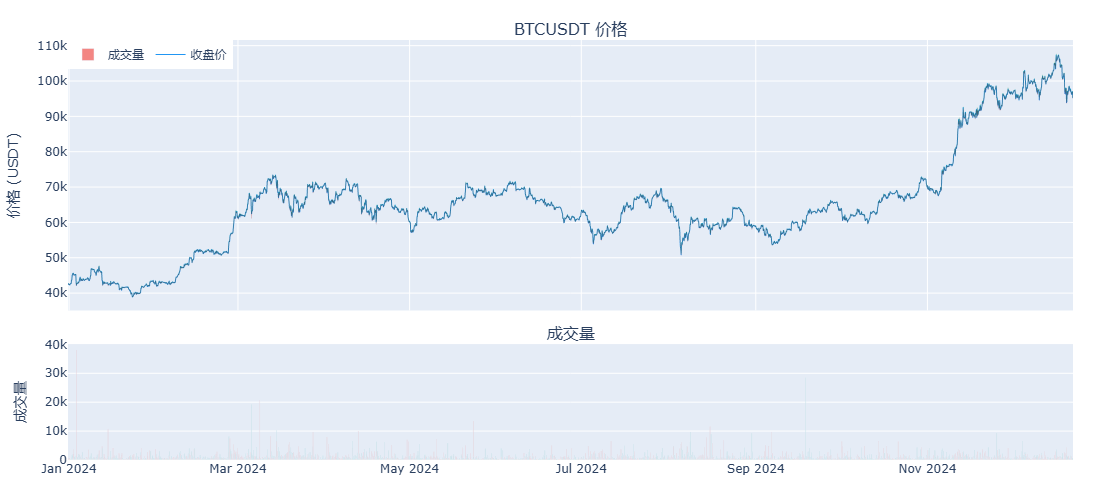


📊 BTCUSDT 统计:
   时间: 2023-12-31 ~ 2024-12-22 (357天)
   数据: 102,817 条 (显示 3,025 点)
   价格: $38,587.90 ~ $108,220.30


In [182]:
# ============================================================
#                    📈 价格可视化 (性能优化版)
# ============================================================
# 说明: 智能选择图表类型，大数据自动降采样
# ============================================================

# 检测可用的绑图库
try:
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("✅ 使用 Plotly 进行可视化")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️ Plotly 未安装，使用 Matplotlib")
    import matplotlib.pyplot as plt
    %matplotlib inline

def smart_resample(df: pd.DataFrame, max_points: int = 2000) -> pd.DataFrame:
    """
    智能降采样 - Qlib 风格
    
    大数据时自动降采样，保持数据特征
    """
    if len(df) <= max_points:
        return df
    
    # 计算采样间隔
    step = len(df) // max_points
    
    # 使用 OHLC 重采样保持价格特征
    resampled = df.iloc[::step].copy()
    print(f"   ℹ️ 数据已降采样: {len(df):,} → {len(resampled):,} 点")
    return resampled

def plot_price_fast(df: pd.DataFrame, symbol: str, max_points: int = 3000):
    """
    快速绑图 - Qlib 风格 (线图 + 降采样)
    
    针对大数据优化:
    - 使用线图代替蜡烛图 (快10倍)
    - 智能降采样
    - 简化图表元素
    """
    # 降采样
    plot_df = smart_resample(df, max_points)
    
    if PLOTLY_AVAILABLE:
        # Plotly 快速模式
        fig = make_subplots(
            rows=2, cols=1,
            shared_xaxes=True,
            vertical_spacing=0.08,
            row_heights=[0.7, 0.3],
            subplot_titles=(f'{symbol} 价格', '成交量')
        )
        
        # 价格线图 (比蜡烛图快很多)
        fig.add_trace(
            go.Scattergl(  # 使用 Scattergl (WebGL加速)
                x=plot_df.index,
                y=plot_df['close'],
                mode='lines',
                name='收盘价',
                line=dict(color='#2196F3', width=1)
            ),
            row=1, col=1
        )
        
        # 添加价格区间 (最高-最低)
        fig.add_trace(
            go.Scattergl(
                x=plot_df.index,
                y=plot_df['high'],
                mode='lines',
                name='最高',
                line=dict(color='rgba(0,150,0,0.3)', width=0.5),
                showlegend=False
            ),
            row=1, col=1
        )
        fig.add_trace(
            go.Scattergl(
                x=plot_df.index,
                y=plot_df['low'],
                mode='lines',
                name='最低',
                line=dict(color='rgba(150,0,0,0.3)', width=0.5),
                fill='tonexty',
                fillcolor='rgba(100,100,100,0.1)',
                showlegend=False
            ),
            row=1, col=1
        )
        
        # 成交量 (使用 Bar)
        colors = ['#26a69a' if plot_df['close'].iloc[i] >= plot_df['open'].iloc[i] 
                  else '#ef5350' for i in range(len(plot_df))]
        fig.add_trace(
            go.Bar(
                x=plot_df.index,
                y=plot_df['volume'],
                name='成交量',
                marker_color=colors,
                opacity=0.7
            ),
            row=2, col=1
        )
        
        # 简化布局
        fig.update_layout(
            height=500,
            showlegend=True,
            legend=dict(x=0, y=1, orientation='h'),
            margin=dict(l=50, r=20, t=40, b=40),
            xaxis_rangeslider_visible=False,
            hovermode='x unified'
        )
        
        fig.update_yaxes(title_text="价格 (USDT)", row=1, col=1)
        fig.update_yaxes(title_text="成交量", row=2, col=1)
        
        fig.show()
    else:
        # Matplotlib 备选
        fig, axes = plt.subplots(2, 1, figsize=(14, 7), 
                                  gridspec_kw={'height_ratios': [3, 1]}, 
                                  sharex=True)
        
        axes[0].plot(plot_df.index, plot_df['close'], 'b-', linewidth=0.8)
        axes[0].fill_between(plot_df.index, plot_df['low'], plot_df['high'], 
                             alpha=0.2, color='gray')
        axes[0].set_ylabel('价格 (USDT)')
        axes[0].set_title(f'{symbol} 价格走势')
        axes[0].grid(True, alpha=0.3)
        
        colors = ['g' if plot_df['close'].iloc[i] >= plot_df['open'].iloc[i] 
                  else 'r' for i in range(len(plot_df))]
        axes[1].bar(plot_df.index, plot_df['volume'], color=colors, alpha=0.7)
        axes[1].set_ylabel('成交量')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # 统计信息
    days = (df.index.max() - df.index.min()).days
    print(f"\n📊 {symbol} 统计:")
    print(f"   时间: {df.index.min().strftime('%Y-%m-%d')} ~ {df.index.max().strftime('%Y-%m-%d')} ({days}天)")
    print(f"   数据: {len(df):,} 条 (显示 {len(plot_df):,} 点)")
    print(f"   价格: ${df['close'].min():,.2f} ~ ${df['close'].max():,.2f}")

# 显示数据
if all_klines:
    symbol = list(all_klines.keys())[0]
    df = all_klines[symbol].copy()
    if 'datetime' in df.columns:
        df = df.set_index('datetime')
    
    print(f"📈 绑制 {symbol} 价格图表...")
    print(f"   原始数据: {len(df):,} 条")
    plot_price_fast(df, symbol, max_points=3000)
else:
    print("⚠️ 无K线数据可显示")

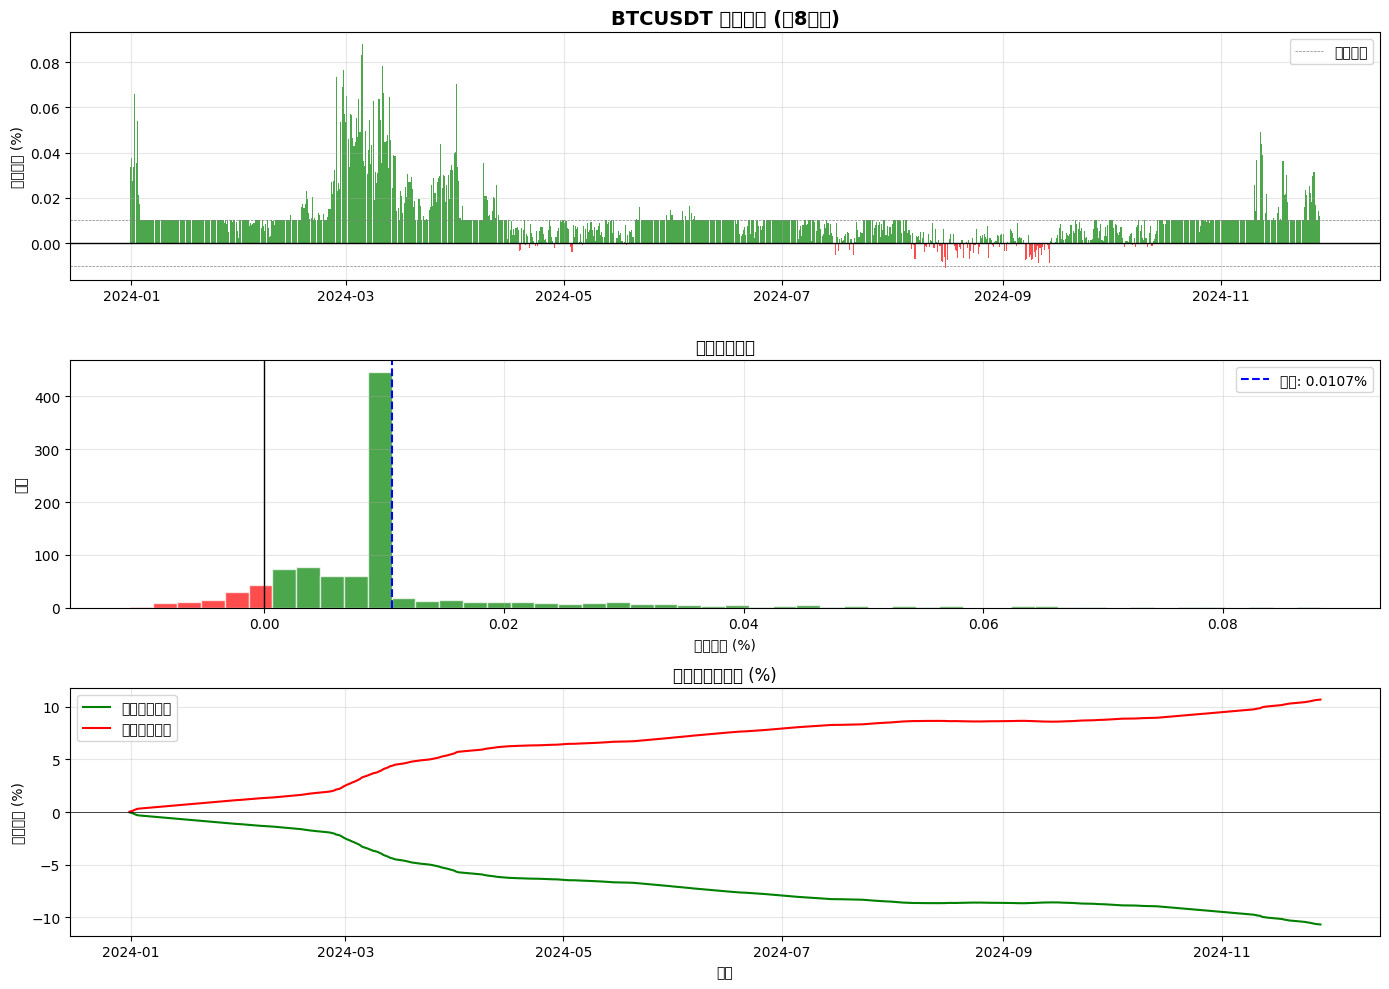


📊 BTCUSDT 资金费率统计:
   数据期间: 2023-12-31 ~ 2024-11-28
   费率次数: 1000
   平均费率: 0.0107% (每8小时)
   年化费率: 11.71%
   正费率占比: 90.9%
   最高费率: 0.0881%
   最低费率: -0.0112%


In [183]:
# ============================================================
#                    💰 资金费率可视化
# ============================================================
# 说明: 分析资金费率的分布和趋势
# 重要: 资金费率是永续合约特有机制，影响持仓成本
# ============================================================

def plot_funding_rate_analysis(funding_df: pd.DataFrame, klines_df: pd.DataFrame, symbol: str):
    """
    资金费率分析可视化
    
    参数:
        funding_df: 资金费率数据
        klines_df: K线数据 (用于对比价格)
        symbol: 交易对名称
    """
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    # ----------------------------------------------------------
    # 子图1: 资金费率时间序列
    # ----------------------------------------------------------
    ax1 = axes[0]
    
    # 转换为百分比并按年化
    funding_pct = funding_df['funding_rate'] * 100  # 每8小时费率%
    funding_annual = funding_df['funding_rate'] * 3 * 365 * 100  # 年化%
    
    # 区分正负颜色
    colors = ['green' if r >= 0 else 'red' for r in funding_pct]
    ax1.bar(funding_df.index, funding_pct, color=colors, alpha=0.7, width=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax1.axhline(y=0.01, color='gray', linestyle='--', linewidth=0.5, label='中性区间')
    ax1.axhline(y=-0.01, color='gray', linestyle='--', linewidth=0.5)
    
    ax1.set_title(f'{symbol} 资金费率 (每8小时)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('资金费率 (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # ----------------------------------------------------------
    # 子图2: 资金费率分布直方图
    # ----------------------------------------------------------
    ax2 = axes[1]
    
    # 绘制直方图
    n, bins, patches = ax2.hist(funding_pct, bins=50, edgecolor='white', alpha=0.7)
    
    # 根据正负着色
    for i, patch in enumerate(patches):
        if bins[i] >= 0:
            patch.set_facecolor('green')
        else:
            patch.set_facecolor('red')
    
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax2.axvline(x=funding_pct.mean(), color='blue', linestyle='--', linewidth=1.5, 
                label=f'均值: {funding_pct.mean():.4f}%')
    
    ax2.set_title('资金费率分布', fontsize=12)
    ax2.set_xlabel('资金费率 (%)')
    ax2.set_ylabel('频次')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # ----------------------------------------------------------
    # 子图3: 累计资金费收益
    # ----------------------------------------------------------
    ax3 = axes[2]
    
    # 计算累计资金费 (假设持有多头)
    cumulative_long = (-funding_df['funding_rate']).cumsum() * 100  # 多头累计%
    cumulative_short = (funding_df['funding_rate']).cumsum() * 100  # 空头累计%
    
    ax3.plot(funding_df.index, cumulative_long, 'g-', linewidth=1.5, label='多头累计收益')
    ax3.plot(funding_df.index, cumulative_short, 'r-', linewidth=1.5, label='空头累计收益')
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    ax3.set_title('累计资金费收益 (%)', fontsize=12)
    ax3.set_xlabel('日期')
    ax3.set_ylabel('累计收益 (%)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 显示统计信息
    print(f"\n📊 {symbol} 资金费率统计:")
    print(f"   数据期间: {funding_df.index.min().strftime('%Y-%m-%d')} ~ {funding_df.index.max().strftime('%Y-%m-%d')}")
    print(f"   费率次数: {len(funding_df)}")
    print(f"   平均费率: {funding_pct.mean():.4f}% (每8小时)")
    print(f"   年化费率: {funding_annual.mean():.2f}%")
    print(f"   正费率占比: {(funding_pct > 0).mean()*100:.1f}%")
    print(f"   最高费率: {funding_pct.max():.4f}%")
    print(f"   最低费率: {funding_pct.min():.4f}%")

# 绘制资金费率分析
for symbol in SYMBOLS[:1]:  # 主要交易对
    if symbol in all_funding and symbol in all_klines:
        plot_funding_rate_analysis(all_funding[symbol], all_klines[symbol], symbol)

---

# Part 4: MVP 11因子详解

## 4.1 因子概述

AlgVex MVP 使用 11 个核心因子，分为三大类：

| 类别 | 因子名称 | 说明 | 预期作用 |
|------|----------|------|----------|
| **动量类** | return_5m | 5分钟收益率 | 短期动量信号 |
| | return_1h | 1小时收益率 | 中期动量信号 |
| | ma_cross | 均线交叉信号 | 趋势跟随 |
| | breakout_20d | 20日突破信号 | 突破交易 |
| | trend_strength | 趋势强度 | 趋势过滤 |
| **波动类** | atr_288 | 日内ATR | 波动率度量 |
| | realized_vol_1d | 已实现波动率 | 风险度量 |
| | vol_regime | 波动率状态 | 市场环境识别 |
| **订单流类** | oi_change_rate | 持仓量变化率 | 资金流向 |
| | funding_momentum | 资金费动量 | 市场情绪 |
| | oi_funding_divergence | OI-费率背离 | 异常检测 |

## 4.2 动量因子详解

In [ ]:
# ============================================================
#                    📐 因子计算类 (系统集成版)
# ============================================================
# 说明: 使用 AlgVex 因子注册表或本地实现
# 系统版本提供 180+ 因子，本地版本提供 11 个 MVP 因子
# ============================================================

import pandas as pd
import numpy as np
from typing import Dict, Optional

# 尝试导入系统因子库
try:
    from algvex.core.factor import (
        FactorRegistry,
        get_momentum_factors,
        get_volatility_factors,
        get_perpetual_factors,
        Return1H,
        TrendStrength,
        Breakout20D,
        ATR24H,
        RealizedVol1D,
        VolRegime,
        FundingMomentum,
        OIChangeRate,
        OIFundingDivergence,
    )
    USING_SYSTEM_FACTORS = True
    print("✅ 使用 AlgVex 系统因子库 (180+ 因子)")
except ImportError:
    USING_SYSTEM_FACTORS = False
    print("⚠️ AlgVex 因子库不可用，使用本地 MVP 11 因子")

class MVPFactorCalculator:
    """
    MVP因子计算器
    
    系统集成版:
    - 优先使用 algvex.core.factor 的因子注册表
    - 回退到本地实现的 11 个 MVP 因子
    
    MVP 11 因子:
    - 动量类 (5个): return_5m, return_1h, ma_cross, breakout_20d, trend_strength
    - 波动类 (3个): atr_288, realized_vol_1d, vol_regime
    - 订单流类 (3个): oi_change_rate, funding_momentum, oi_funding_divergence
    """
    
    def __init__(self, bars_per_day: int = 288):
        self.bars_per_day = bars_per_day
        
        if USING_SYSTEM_FACTORS:
            self.registry = FactorRegistry.get_instance()
            print(f"   注册表因子数: {len(self.registry.get_all_factors())}")
        else:
            self.registry = None
    
    # ==========================================================
    # 动量因子
    # ==========================================================
    def calc_return_5m(self, df: pd.DataFrame) -> pd.Series:
        """5分钟收益率 = (close[t] - close[t-1]) / close[t-1]"""
        return df['close'].pct_change()
    
    def calc_return_1h(self, df: pd.DataFrame) -> pd.Series:
        """1小时收益率 (12根5分钟K线)"""
        return df['close'].pct_change(12)
    
    def calc_ma_cross(self, df: pd.DataFrame, fast: int = 12, slow: int = 48) -> pd.Series:
        """均线交叉信号 = (MA_fast - MA_slow) / MA_slow"""
        ma_fast = df['close'].rolling(fast).mean()
        ma_slow = df['close'].rolling(slow).mean()
        return (ma_fast - ma_slow) / ma_slow
    
    def calc_breakout_20d(self, df: pd.DataFrame) -> pd.Series:
        """20日高低点突破信号 [0, 1]"""
        window = self.bars_per_day * 20
        high_20d = df['high'].rolling(window, min_periods=1).max()
        low_20d = df['low'].rolling(window, min_periods=1).min()
        range_20d = (high_20d - low_20d).replace(0, np.nan)
        return (df['close'] - low_20d) / range_20d
    
    def calc_trend_strength(self, df: pd.DataFrame, window: int = 288) -> pd.Series:
        """趋势强度 = cumulative_return / volatility"""
        returns = df['close'].pct_change()
        cum_ret = returns.rolling(window).sum()
        vol = returns.rolling(window).std().replace(0, np.nan)
        return cum_ret / (vol * np.sqrt(window))
    
    # ==========================================================
    # 波动因子
    # ==========================================================
    def calc_atr_288(self, df: pd.DataFrame, window: int = 288) -> pd.Series:
        """日内ATR (归一化)"""
        high_low = df['high'] - df['low']
        high_prev = abs(df['high'] - df['close'].shift(1))
        low_prev = abs(df['low'] - df['close'].shift(1))
        tr = pd.concat([high_low, high_prev, low_prev], axis=1).max(axis=1)
        atr = tr.rolling(window, min_periods=1).mean()
        return atr / df['close']
    
    def calc_realized_vol_1d(self, df: pd.DataFrame) -> pd.Series:
        """日已实现波动率 (年化)"""
        returns = df['close'].pct_change()
        daily_vol = np.sqrt((returns ** 2).rolling(self.bars_per_day).sum())
        return daily_vol * np.sqrt(365)
    
    def calc_vol_regime(self, df: pd.DataFrame, short: int = 24, long: int = 288) -> pd.Series:
        """波动率状态 = short_vol / long_vol"""
        returns = df['close'].pct_change()
        short_vol = returns.rolling(short).std()
        long_vol = returns.rolling(long).std().replace(0, np.nan)
        return short_vol / long_vol
    
    # ==========================================================
    # 订单流因子
    # ==========================================================
    def calc_oi_change_rate(self, oi_df: pd.DataFrame, window: int = 12) -> pd.Series:
        """持仓量变化率"""
        if 'open_interest' not in oi_df.columns:
            return pd.Series(index=oi_df.index, dtype=float)
        return oi_df['open_interest'].pct_change(window)
    
    def calc_funding_momentum(self, funding_df: pd.DataFrame, window: int = 3) -> pd.Series:
        """资金费率动量 (移动平均)"""
        if 'funding_rate' not in funding_df.columns:
            return pd.Series(index=funding_df.index, dtype=float)
        return funding_df['funding_rate'].rolling(window, min_periods=1).mean()
    
    def calc_oi_funding_divergence(self, oi_df: pd.DataFrame, 
                                   funding_df: pd.DataFrame) -> pd.Series:
        """OI-资金费率背离"""
        if 'open_interest' not in oi_df.columns or 'funding_rate' not in funding_df.columns:
            return pd.Series(dtype=float)
        
        oi_change = oi_df['open_interest'].pct_change()
        oi_z = (oi_change - oi_change.rolling(24).mean()) / oi_change.rolling(24).std()
        
        fund_z = (funding_df['funding_rate'] - funding_df['funding_rate'].rolling(3).mean()) / \
                 funding_df['funding_rate'].rolling(3).std()
        
        combined = pd.concat([oi_z.rename('oi'), fund_z.rename('fund')], axis=1).ffill()
        return combined['oi'] - combined['fund']
    
    # ==========================================================
    # 系统因子接口 (如果可用)
    # ==========================================================
    def get_system_factor(self, factor_id: str):
        """获取系统因子 (如果可用)"""
        if self.registry:
            return self.registry.get_factor(factor_id)
        return None
    
    def list_available_factors(self) -> list:
        """列出所有可用因子"""
        if self.registry:
            return [f.metadata.factor_id for f in self.registry.get_all_factors()]
        return [
            'return_5m', 'return_1h', 'ma_cross', 'breakout_20d', 'trend_strength',
            'atr_288', 'realized_vol_1d', 'vol_regime',
            'oi_change_rate', 'funding_momentum', 'oi_funding_divergence'
        ]

print("✅ MVP因子计算类已定义")
if USING_SYSTEM_FACTORS:
    print("   💡 提示: 可通过 registry 访问 180+ 系统因子")


In [ ]:
# ============================================================
#                    📊 计算所有因子
# ============================================================
# 说明: 对主要交易对计算全部11个因子
# ============================================================

# 创建因子计算器
factor_calc = MVPFactorCalculator(bars_per_day=BARS_PER_DAY)

def ensure_datetime_index(df: pd.DataFrame) -> pd.DataFrame:
    """
    确保 DataFrame 有 datetime 索引 (关键工具函数)
    
    处理多种情况:
    1. datetime 是列 → 设为索引
    2. 索引是 RangeIndex → 尝试转换
    3. 索引已经是 DatetimeIndex → 保持不变
    """
    df = df.copy()
    
    # 情况1: datetime 是列
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.set_index('datetime').sort_index()
        return df
    
    # 情况2: 已经是 DatetimeIndex
    if isinstance(df.index, pd.DatetimeIndex):
        return df.sort_index()
    
    # 情况3: 尝试转换索引
    try:
        df.index = pd.to_datetime(df.index)
        return df.sort_index()
    except:
        raise ValueError("无法将索引转换为 DatetimeIndex")

def calculate_all_factors(klines: pd.DataFrame, 
                         oi: pd.DataFrame = None, 
                         funding: pd.DataFrame = None) -> pd.DataFrame:
    """
    计算所有MVP因子
    
    参数:
        klines: K线数据 (会自动转换为 datetime 索引)
        oi: 持仓量数据 (可选)
        funding: 资金费率数据 (可选)
    
    返回:
        DataFrame: 包含所有因子的数据框 (datetime 索引)
    """
    # ✨ 确保 klines 有 datetime 索引 (关键!)
    klines = ensure_datetime_index(klines)
    
    # 创建因子 DataFrame，使用与 klines 相同的 datetime 索引
    factors = pd.DataFrame(index=klines.index)
    
    # 动量因子
    print("   计算动量因子...")
    factors['return_5m'] = factor_calc.calc_return_5m(klines)
    factors['return_1h'] = factor_calc.calc_return_1h(klines)
    factors['ma_cross'] = factor_calc.calc_ma_cross(klines)
    factors['breakout_20d'] = factor_calc.calc_breakout_20d(klines)
    factors['trend_strength'] = factor_calc.calc_trend_strength(klines)
    
    # 波动因子
    print("   计算波动因子...")
    factors['atr_288'] = factor_calc.calc_atr_288(klines)
    factors['realized_vol_1d'] = factor_calc.calc_realized_vol_1d(klines)
    factors['vol_regime'] = factor_calc.calc_vol_regime(klines)
    
    # 订单流因子 (如果有数据)
    print("   计算订单流因子...")
    if oi is not None and len(oi) > 0:
        oi = ensure_datetime_index(oi)
        oi_resampled = oi.reindex(klines.index, method='ffill')
        factors['oi_change_rate'] = factor_calc.calc_oi_change_rate(oi_resampled)
    else:
        factors['oi_change_rate'] = np.nan
    
    if funding is not None and len(funding) > 0:
        funding = ensure_datetime_index(funding)
        funding_resampled = funding.reindex(klines.index, method='ffill')
        factors['funding_momentum'] = factor_calc.calc_funding_momentum(funding_resampled)
    else:
        factors['funding_momentum'] = np.nan
    
    if oi is not None and funding is not None and len(oi) > 0 and len(funding) > 0:
        oi = ensure_datetime_index(oi)
        funding = ensure_datetime_index(funding)
        oi_resampled = oi.reindex(klines.index, method='ffill')
        funding_resampled = funding.reindex(klines.index, method='ffill')
        factors['oi_funding_divergence'] = factor_calc.calc_oi_funding_divergence(
            oi_resampled, funding_resampled
        )
    else:
        factors['oi_funding_divergence'] = np.nan
    
    return factors

# 存储所有因子
all_factors = {}

print("="*60)
print("📐 计算MVP因子")
print("="*60)

for symbol in SYMBOLS:
    print(f"\n🔄 处理 {symbol}...")
    
    klines = all_klines.get(symbol)
    oi = all_oi.get(symbol)
    funding = all_funding.get(symbol)
    
    if klines is not None and len(klines) > 0:
        factors = calculate_all_factors(klines, oi, funding)
        all_factors[symbol] = factors
        print(f"   ✅ 因子数: {len(factors.columns)}")
        print(f"   ✅ 数据量: {len(factors):,}")
        print(f"   ✅ 时间范围: {factors.index.min()} ~ {factors.index.max()}")
    else:
        print(f"   ⚠️ 无K线数据")

print("\n" + "="*60)
print("✅ 因子计算完成!")
print("="*60)

In [ ]:
# ============================================================
#                    📊 因子统计与可视化
# ============================================================
# 说明: 分析因子的统计特性和分布
# ============================================================

def analyze_factors(factors_df: pd.DataFrame, symbol: str):
    """
    因子分析与可视化
    """
    print(f"\n{'='*60}")
    print(f"📊 {symbol} 因子统计分析")
    print(f"{'='*60}")
    
    # 基本统计
    stats = factors_df.describe()
    print("\n📌 因子统计摘要:")
    print(stats.T[['mean', 'std', 'min', '50%', 'max']].round(4))
    
    # 相关性矩阵
    print("\n📌 因子相关性矩阵 (取绝对值 > 0.5 的高相关对):")
    corr = factors_df.corr()
    
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.5:
                high_corr_pairs.append((
                    corr.columns[i], 
                    corr.columns[j], 
                    corr.iloc[i, j]
                ))
    
    if high_corr_pairs:
        for f1, f2, c in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"   {f1} <-> {f2}: {c:.3f}")
    else:
        print("   无高相关对")
    
    # 可视化因子分布
    fig, axes = plt.subplots(3, 4, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(factors_df.columns[:11]):  # 最多11个因子
        ax = axes[idx]
        data = factors_df[col].dropna()
        
        if len(data) > 0:
            # 绘制直方图
            ax.hist(data, bins=50, edgecolor='white', alpha=0.7, density=True)
            
            # 添加均值线
            ax.axvline(data.mean(), color='red', linestyle='--', 
                      linewidth=1.5, label=f'均值: {data.mean():.3f}')
            
            ax.set_title(col, fontsize=10)
            ax.legend(fontsize=8)
    
    # 隐藏多余的子图
    for idx in range(len(factors_df.columns), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'{symbol} 因子分布', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 绘制相关性热力图
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 只取有效因子
    valid_cols = [c for c in factors_df.columns if factors_df[c].notna().sum() > 100]
    corr_valid = factors_df[valid_cols].corr()
    
    im = ax.imshow(corr_valid, cmap='RdBu_r', vmin=-1, vmax=1)
    
    # 添加标签
    ax.set_xticks(range(len(valid_cols)))
    ax.set_yticks(range(len(valid_cols)))
    ax.set_xticklabels(valid_cols, rotation=45, ha='right', fontsize=9)
    ax.set_yticklabels(valid_cols, fontsize=9)
    
    # 添加数值标注
    for i in range(len(valid_cols)):
        for j in range(len(valid_cols)):
            text = ax.text(j, i, f'{corr_valid.iloc[i, j]:.2f}',
                          ha='center', va='center', fontsize=8,
                          color='white' if abs(corr_valid.iloc[i, j]) > 0.5 else 'black')
    
    plt.colorbar(im, ax=ax, label='相关系数')
    ax.set_title(f'{symbol} 因子相关性热力图', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 分析主要交易对的因子
for symbol in SYMBOLS[:1]:
    if symbol in all_factors:
        analyze_factors(all_factors[symbol], symbol)

---

# Part 5: Qlib 研究环境

## 5.1 Qlib 简介

Qlib 是微软开源的量化投资研究框架，主要功能：
- 因子研究和分析
- 模型训练和评估
- 回测和绩效分析

AlgVex 基于 Qlib 进行因子研究和模型训练。

## 5.2 数据准备

将我们的因子数据转换为 Qlib 可用的格式。

In [ ]:
# ============================================================
#                    📚 Qlib 数据准备
# ============================================================
# 说明: 准备训练数据集，使用 Qlib 风格的 CryptoDataset
# ============================================================

# 尝试导入 CryptoDataset (Qlib 风格)
try:
    from algvex.core.data.dataset import CryptoDataset
    from algvex.core.data.reweighter import TimeDecayReweighter
    from algvex.core.factor.processor import ProcessorChain, DropnaProcessor, ZScoreNormalizer, WinsorizeProcessor
    DATASET_AVAILABLE = True
    print("✅ CryptoDataset 可用 (Qlib 风格)")
except ImportError:
    DATASET_AVAILABLE = False
    print("⚠️ CryptoDataset 不可用，使用简化模式")

def prepare_training_data(klines: pd.DataFrame, 
                         factors: pd.DataFrame,
                         forward_periods: int = 12) -> tuple:
    """
    准备机器学习训练数据
    
    参数:
        klines: K线数据 (必须有 datetime 索引)
        factors: 因子数据 (必须有 datetime 索引)
        forward_periods: 预测的未来周期数 (默认12 = 1小时)
    
    返回:
        (DataFrame, feature_cols): 数据和特征列名列表
    """
    # ✨ 确保 klines 有 datetime 索引
    klines = ensure_datetime_index(klines)
    
    # ✨ 确保 factors 有 datetime 索引
    factors = ensure_datetime_index(factors)
    
    # 创建训练数据框
    data = pd.DataFrame(index=klines.index)
    
    # 创建标签: 未来N期收益率
    data['label'] = klines['close'].pct_change(forward_periods).shift(-forward_periods)
    
    # 添加特征: 所有因子
    feature_cols = []
    common_index = data.index.intersection(factors.index)
    for col in factors.columns:
        data.loc[common_index, col] = factors.loc[common_index, col]
        feature_cols.append(col)
    
    # 添加价格特征
    data['close'] = klines['close']
    data['volume'] = klines['volume']
    feature_cols.extend(['close', 'volume'])
    
    # 删除缺失值
    data = data.dropna()
    
    print(f"   数据量: {len(data):,} 条")
    print(f"   特征数: {len(feature_cols)}")
    if len(data) > 0:
        print(f"   时间范围: {data.index.min()} ~ {data.index.max()}")
    else:
        print("   ⚠️ 警告: 无有效数据!")
    
    return data, feature_cols

# 准备主要交易对的训练数据
training_data = {}
feature_columns = {}

print("="*60)
print("📚 准备训练数据")
print("="*60)

for symbol in SYMBOLS:
    print(f"\n🔄 处理 {symbol}...")
    
    klines = all_klines.get(symbol)
    factors = all_factors.get(symbol)
    
    if klines is not None and factors is not None:
        data, feat_cols = prepare_training_data(klines, factors, forward_periods=12)
        training_data[symbol] = data
        feature_columns[symbol] = feat_cols
        print(f"   ✅ 完成")
    else:
        print(f"   ⚠️ 数据不完整")

print("\n" + "="*60)
print("✅ 训练数据准备完成!")
print("="*60)

In [ ]:
# ============================================================
#                    📦 创建数据集 (Qlib 风格)
# ============================================================
# 说明: 使用 CryptoDataset 统一管理数据划分
# ============================================================

# 定义数据段配置 (Qlib 风格)
segments = {
    'train': (TRAIN_START, TRAIN_END),
    'valid': (VALID_START, VALID_END),
    'test':  (TEST_START, TEST_END),
}

# 创建数据集字典
datasets = {}

print("="*60)
print("📦 创建 CryptoDataset (Qlib 风格)")
print("="*60)

for symbol in SYMBOLS:
    if symbol not in training_data:
        continue
    
    data = training_data[symbol]
    feat_cols = feature_columns.get(symbol, [])
    
    print(f"\n🔄 {symbol}:")
    
    if DATASET_AVAILABLE:
        # 使用 Qlib 风格的 CryptoDataset
        processors = ProcessorChain([
            DropnaProcessor(),
            WinsorizeProcessor(lower=0.01, upper=0.99),
            ZScoreNormalizer(clip=3.0),
        ])
        
        reweighter = TimeDecayReweighter(decay_rate=0.995)
        
        dataset = CryptoDataset(
            data=data,
            segments=segments,
            feature_cols=feat_cols,
            label_col='label',
            processors=processors,
            reweighter=reweighter,
        )
        
        dataset.fit_processors('train')
        dataset.summary()
        
        datasets[symbol] = dataset
    else:
        print(f"   数据量: {len(data):,}")
        print(f"   特征数: {len(feat_cols)}")
        datasets[symbol] = {
            'data': data,
            'feature_cols': feat_cols,
            'segments': segments
        }

print("\n" + "="*60)
print("✅ 数据集创建完成!")
print("="*60)

---

# Part 6: 模型训练与评估

## 6.1 训练集/验证集/测试集划分

时间序列数据划分必须按时间顺序，不能随机打乱！

```
时间轴 ──────────────────────────────────────────────────>
      │     训练集      │  验证集  │     测试集      │
      │   (60%-70%)    │ (10-20%) │   (20%-30%)    │
      │    模型学习     │  调参/早停│  最终评估/回测   │
```

In [ ]:
# ============================================================
#                    🤖 模型训练
# ============================================================
# 说明: 使用 LightGBM 训练收益率预测模型 (Qlib 风格)
# ============================================================

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️ LightGBM 未安装，请运行: pip install lightgbm")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

class CryptoPredictor:
    """
    加密货币收益率预测模型 (Qlib LGBModel 风格)
    
    使用 LightGBM 进行回归预测
    支持:
    - CryptoDataset 输入 (Qlib 风格)
    - 样本权重 (Reweighter)
    - 早停机制
    """
    
    def __init__(self, config: dict = None):
        self.config = config or LIGHTGBM_CONFIG
        self.model = None
        self.feature_names = None
        self.feature_importance = None
    
    def split_data(self, data: pd.DataFrame, 
                   train_end: str, 
                   valid_end: str) -> tuple:
        """按时间划分数据集 (向后兼容)"""
        df = data.copy()
        
        if not isinstance(df.index, pd.DatetimeIndex):
            if 'datetime' in df.columns:
                df = df.set_index('datetime')
            df.index = pd.to_datetime(df.index)
        
        train_end_dt = pd.to_datetime(train_end)
        valid_end_dt = pd.to_datetime(valid_end)
        
        train_df = df[df.index <= train_end_dt].copy()
        valid_df = df[(df.index > train_end_dt) & (df.index <= valid_end_dt)].copy()
        test_df = df[df.index > valid_end_dt].copy()
        
        for name, d in [('训练集', train_df), ('验证集', valid_df), ('测试集', test_df)]:
            if len(d) > 0:
                print(f"   {name}: {len(d):,} 条 ({d.index.min().date()} ~ {d.index.max().date()})")
            else:
                print(f"   {name}: 0 条")
        
        return train_df, valid_df, test_df
    
    def train_with_data(self, X_train, y_train, X_valid=None, y_valid=None, sample_weight=None):
        """
        使用 X, y 数据训练模型 (Qlib 风格)
        """
        if not LIGHTGBM_AVAILABLE:
            raise RuntimeError("LightGBM not installed")
        
        self.feature_names = list(X_train.columns)
        
        print(f"\n🚀 开始训练模型...")
        print(f"   特征数: {len(self.feature_names)}")
        print(f"   训练样本: {len(X_train):,}")
        if X_valid is not None:
            print(f"   验证样本: {len(X_valid):,}")
        if sample_weight is not None:
            print(f"   使用样本权重: ✅")
        
        train_data = lgb.Dataset(
            X_train.values, 
            label=y_train.values,
            weight=sample_weight,
            feature_name=self.feature_names
        )
        
        valid_sets = [train_data]
        valid_names = ['train']
        
        if X_valid is not None and len(X_valid) > 0:
            valid_data = lgb.Dataset(X_valid.values, label=y_valid.values, reference=train_data)
            valid_sets.append(valid_data)
            valid_names.append('valid')
        
        params = {
            'objective': 'regression',
            'metric': 'mse',
            'verbosity': -1,
            'learning_rate': self.config.get('learning_rate', 0.05),
            'num_leaves': self.config.get('num_leaves', 31),
            'max_depth': self.config.get('max_depth', -1),
            'min_data_in_leaf': self.config.get('min_data_in_leaf', 20),
            'feature_fraction': self.config.get('feature_fraction', 0.8),
            'bagging_fraction': self.config.get('bagging_fraction', 0.8),
            'bagging_freq': self.config.get('bagging_freq', 5),
            'lambda_l1': self.config.get('lambda_l1', 0.1),
            'lambda_l2': self.config.get('lambda_l2', 0.1),
        }
        
        callbacks = [
            lgb.early_stopping(self.config.get('early_stopping_rounds', 50)),
            lgb.log_evaluation(period=100)
        ]
        
        self.model = lgb.train(
            params,
            train_data,
            num_boost_round=self.config.get('num_boost_round', 500),
            valid_sets=valid_sets,
            valid_names=valid_names,
            callbacks=callbacks
        )
        
        self.feature_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importance(importance_type='gain')
        }).sort_values('importance', ascending=False)
        
        print(f"   ✅ 训练完成 (best_iteration: {self.model.best_iteration})")
    
    def train(self, train_df: pd.DataFrame, valid_df: pd.DataFrame = None):
        """训练模型 (向后兼容)"""
        feature_cols = [c for c in train_df.columns if c != 'label']
        
        X_train = train_df[feature_cols]
        y_train = train_df['label']
        
        X_valid, y_valid = None, None
        if valid_df is not None and len(valid_df) > 0:
            X_valid = valid_df[feature_cols]
            y_valid = valid_df['label']
        
        self.train_with_data(X_train, y_train, X_valid, y_valid)
    
    def predict(self, X) -> np.ndarray:
        """预测"""
        if self.model is None:
            raise RuntimeError("Model not trained")
        
        if isinstance(X, pd.DataFrame):
            return self.model.predict(X.values)
        return self.model.predict(X)
    
    def evaluate(self, df: pd.DataFrame) -> dict:
        """评估模型"""
        if self.model is None:
            return {}
        
        feature_cols = [c for c in df.columns if c != 'label']
        X = df[feature_cols]
        y = df['label']
        
        pred = self.predict(X)
        
        return {
            'mse': mean_squared_error(y, pred),
            'mae': mean_absolute_error(y, pred),
            'r2': r2_score(y, pred),
            'corr': np.corrcoef(y, pred)[0, 1] if len(y) > 1 else 0
        }
    
    def plot_feature_importance(self, top_n: int = 15):
        """绘制特征重要性"""
        if self.feature_importance is None:
            print("⚠️ 模型未训练")
            return
        
        top_features = self.feature_importance.head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(top_features)), top_features['importance'].values)
        plt.yticks(range(len(top_features)), top_features['feature'].values)
        plt.xlabel('Importance (Gain)')
        plt.title(f'Top {top_n} Feature Importance')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

print("✅ CryptoPredictor 类已定义 (Qlib 风格)")

In [ ]:
# ============================================================
#                    🚀 执行模型训练
# ============================================================

# 使用主要交易对进行训练
symbol = PRIMARY_SYMBOL

if symbol in datasets and LIGHTGBM_AVAILABLE:
    print("="*60)
    print(f"🤖 训练 {symbol} 预测模型")
    print("="*60)
    
    predictor = CryptoPredictor(LIGHTGBM_CONFIG)
    
    if DATASET_AVAILABLE and isinstance(datasets[symbol], CryptoDataset):
        # ✨ 使用 Qlib 风格的 CryptoDataset
        dataset = datasets[symbol]
        
        print("\n📊 使用 CryptoDataset (Qlib 风格):")
        
        X_train, y_train = dataset.prepare('train', col_set='feature')
        X_valid, y_valid = dataset.prepare('valid', col_set='feature')
        X_test, y_test = dataset.prepare('test', col_set='feature')
        
        # 获取样本权重 (时间衰减)
        _, _, w_train = dataset.prepare('train', col_set='feature', with_weight=True)
        
        print(f"   训练集: {len(X_train):,} 条")
        print(f"   验证集: {len(X_valid):,} 条")
        print(f"   测试集: {len(X_test):,} 条")
        print(f"   使用时间衰减权重: ✅")
        
        if len(X_train) == 0:
            print("\n❌ 错误: 训练集为空!")
            print("   请检查数据时间范围和段配置")
        elif len(X_valid) == 0:
            print("\n⚠️ 警告: 验证集为空，不使用早停")
            predictor.train_with_data(X_train, y_train, sample_weight=w_train)
        else:
            predictor.train_with_data(
                X_train, y_train, 
                X_valid, y_valid,
                sample_weight=w_train
            )
            
            print("\n📈 模型评估:")
            for name, (X, y) in [('训练集', (X_train, y_train)), 
                                  ('验证集', (X_valid, y_valid)),
                                  ('测试集', (X_test, y_test))]:
                if len(X) > 0:
                    pred = predictor.predict(X)
                    mse = ((pred - y) ** 2).mean()
                    corr = np.corrcoef(pred, y)[0, 1] if len(pred) > 1 else 0
                    print(f"   {name}: MSE={mse:.6f}, Corr={corr:.4f}")
            
            predictor.plot_feature_importance(top_n=11)
    else:
        # 简化模式 (向后兼容)
        print("\n📊 使用简化模式:")
        data = training_data[symbol]
        feat_cols = feature_columns.get(symbol, [c for c in data.columns if c != 'label'])
        
        train_df, valid_df, test_df = predictor.split_data(data, TRAIN_END, VALID_END)
        
        if len(train_df) == 0:
            print("\n❌ 错误: 训练集为空!")
        elif len(valid_df) == 0:
            print("\n⚠️ 警告: 验证集为空")
            predictor.train(train_df, None)
        else:
            predictor.train(train_df, valid_df)
            predictor.plot_feature_importance(top_n=11)
    
    print("\n" + "="*60)
    print("✅ 模型训练完成!")
    print("="*60)
else:
    if symbol not in datasets:
        print(f"⚠️ {symbol} 无数据集")
    if not LIGHTGBM_AVAILABLE:
        print("⚠️ LightGBM 未安装")

---

# Part 7: 信号生成

## 7.1 信号生成原理

模型预测的是未来收益率，需要转换为交易信号：

| 预测值范围 | 信号 | 操作 |
|-----------|------|------|
| prediction > long_threshold | +1 | 做多 |
| prediction < short_threshold | -1 | 做空 |
| 其他 | 0 | 观望 |

## 7.2 信号过滤器

为提高信号质量，应用以下过滤：
1. **阈值过滤**: 只有超过阈值才生成信号
2. **冷却期**: 信号后N期内不再生成新信号
3. **强度过滤**: 过滤弱信号

In [ ]:
# ============================================================
#                    🎯 信号生成器
# ============================================================
# 说明: 将模型预测转换为交易信号
# ============================================================

class SignalGenerator:
    """
    信号生成器
    
    将模型预测值转换为可执行的交易信号
    包含信号过滤和冷却期机制
    """
    
    def __init__(
        self,
        long_threshold: float = 0.02,
        short_threshold: float = -0.02,
        min_strength: float = 0.1,
        cooldown: int = 12
    ):
        """
        初始化信号生成器
        
        参数:
            long_threshold: 做多阈值 (预测值 > 此值触发做多)
            short_threshold: 做空阈值 (预测值 < 此值触发做空)
            min_strength: 最小信号强度
            cooldown: 冷却期 (K线数)
        """
        self.long_threshold = long_threshold
        self.short_threshold = short_threshold
        self.min_strength = min_strength
        self.cooldown = cooldown
    
    def generate(self, predictions: pd.Series) -> pd.DataFrame:
        """
        生成交易信号
        
        参数:
            predictions: 模型预测值 (Series)
        
        返回:
            DataFrame: 包含信号和强度的数据框
                - signal: 信号 (+1=做多, -1=做空, 0=无信号)
                - strength: 信号强度 (用于仓位调整)
                - raw_prediction: 原始预测值
        """
        result = pd.DataFrame(index=predictions.index)
        result['raw_prediction'] = predictions
        
        # ----------------------------------------------------------
        # 生成原始信号
        # ----------------------------------------------------------
        result['raw_signal'] = 0
        result.loc[predictions > self.long_threshold, 'raw_signal'] = 1
        result.loc[predictions < self.short_threshold, 'raw_signal'] = -1
        
        # ----------------------------------------------------------
        # 计算信号强度
        # ----------------------------------------------------------
        # 强度 = 预测值超过阈值的程度
        result['strength'] = 0.0
        
        # 做多信号强度
        long_mask = result['raw_signal'] == 1
        if long_mask.any():
            result.loc[long_mask, 'strength'] = \
                (predictions[long_mask] - self.long_threshold) / self.long_threshold
        
        # 做空信号强度
        short_mask = result['raw_signal'] == -1
        if short_mask.any():
            result.loc[short_mask, 'strength'] = \
                (self.short_threshold - predictions[short_mask]) / abs(self.short_threshold)
        
        # 限制强度范围
        result['strength'] = result['strength'].clip(0, 3)
        
        # ----------------------------------------------------------
        # 应用冷却期
        # ----------------------------------------------------------
        result['signal'] = 0
        
        last_signal_bar = -self.cooldown - 1  # 初始化为足够早
        
        for i, (idx, row) in enumerate(result.iterrows()):
            # 检查是否在冷却期内
            if i - last_signal_bar <= self.cooldown:
                continue
            
            # 检查信号强度
            if row['strength'] >= self.min_strength and row['raw_signal'] != 0:
                result.loc[idx, 'signal'] = row['raw_signal']
                last_signal_bar = i
        
        return result
    
    def analyze_signals(self, signals_df: pd.DataFrame, prices: pd.Series):
        """
        分析信号质量
        """
        print("="*60)
        print("📊 信号分析报告")
        print("="*60)
        
        total_bars = len(signals_df)
        long_signals = (signals_df['signal'] == 1).sum()
        short_signals = (signals_df['signal'] == -1).sum()
        
        print(f"\n📌 信号统计:")
        print(f"   总K线数: {total_bars:,}")
        print(f"   做多信号: {long_signals} ({long_signals/total_bars*100:.2f}%)")
        print(f"   做空信号: {short_signals} ({short_signals/total_bars*100:.2f}%)")
        print(f"   无信号: {total_bars - long_signals - short_signals} ({(1 - (long_signals+short_signals)/total_bars)*100:.2f}%)")
        
        # 信号后收益分析
        print(f"\n📌 信号后收益 (12期=1小时):")
        
        forward_returns = prices.pct_change(12).shift(-12)
        
        long_returns = forward_returns[signals_df['signal'] == 1]
        if len(long_returns) > 0:
            print(f"   做多信号后收益: 均值={long_returns.mean()*100:.3f}%, 胜率={((long_returns>0).sum()/len(long_returns))*100:.1f}%")
        
        short_returns = forward_returns[signals_df['signal'] == -1]
        if len(short_returns) > 0:
            print(f"   做空信号后收益: 均值={(-short_returns).mean()*100:.3f}%, 胜率={((-short_returns>0).sum()/len(short_returns))*100:.1f}%")

# 生成信号
print("="*60)
print("🎯 生成交易信号")
print("="*60)

if 'predictor' in dir() and predictor.model is not None:
    # 使用测试集生成信号
    test_predictions = predictor.predict(test_df)
    
    # 创建信号生成器
    signal_gen = SignalGenerator(
        long_threshold=LONG_THRESHOLD,
        short_threshold=SHORT_THRESHOLD,
        min_strength=MIN_STRENGTH,
        cooldown=SIGNAL_COOLDOWN
    )
    
    # 生成信号
    signals = signal_gen.generate(test_predictions)
    
    # 分析信号
    signal_gen.analyze_signals(signals, test_df['close'])
    
    print("\n✅ 信号生成完成!")
else:
    print("⚠️ 模型未训练，请先运行Part 6")

---

# Part 8: 永续合约回测

## 8.1 永续合约回测特点

永续合约回测与现货不同，需要考虑：
1. **资金费率**: 每8小时结算，多空对付
2. **杠杆效应**: 放大收益和亏损
3. **强制平仓**: 保证金不足时触发
4. **手续费**: Taker/Maker 不同费率

## 8.2 AlgVex 回测引擎

AlgVex 提供专门的永续合约回测引擎，支持：
- 精确的资金费率模拟
- 滑点模拟
- 仓位管理
- 风险监控

In [ ]:
# ============================================================
#                    📈 永续合约回测引擎
# ============================================================
# 说明: 简化版回测引擎，用于教学演示
# 完整版请使用 algvex.core.backtest
# ============================================================

from dataclasses import dataclass
from typing import List, Optional
from enum import Enum

class PositionSide(Enum):
    LONG = "long"
    SHORT = "short"

@dataclass
class Position:
    """仓位"""
    side: PositionSide
    entry_price: float
    size: float  # 以 USDT 计
    entry_time: pd.Timestamp
    leverage: float = 1.0
    
    def unrealized_pnl(self, current_price: float) -> float:
        """未实现盈亏"""
        if self.side == PositionSide.LONG:
            return self.size * self.leverage * (current_price / self.entry_price - 1)
        else:
            return self.size * self.leverage * (1 - current_price / self.entry_price)
    
    def unrealized_pnl_pct(self, current_price: float) -> float:
        """未实现盈亏百分比"""
        return self.unrealized_pnl(current_price) / self.size

@dataclass 
class Trade:
    """交易记录"""
    entry_time: pd.Timestamp
    exit_time: pd.Timestamp
    side: PositionSide
    entry_price: float
    exit_price: float
    size: float
    pnl: float
    pnl_pct: float
    exit_reason: str

class SimpleBacktestEngine:
    """
    简化版永续合约回测引擎
    
    用于教学演示，展示回测的核心逻辑
    """
    
    def __init__(
        self,
        initial_capital: float = 100000.0,
        leverage: float = 3.0,
        position_size: float = 0.2,
        taker_fee: float = 0.0004,
        slippage: float = 0.0001,
        stop_loss: float = 0.03,
        take_profit: float = 0.06,
        max_holding_bars: int = 288
    ):
        """
        初始化回测引擎
        
        参数:
            initial_capital: 初始资金
            leverage: 杠杆倍数
            position_size: 每次开仓使用的资金比例
            taker_fee: Taker手续费
            slippage: 滑点
            stop_loss: 止损比例
            take_profit: 止盈比例
            max_holding_bars: 最大持仓K线数
        """
        self.initial_capital = initial_capital
        self.leverage = leverage
        self.position_size = position_size
        self.taker_fee = taker_fee
        self.slippage = slippage
        self.stop_loss = stop_loss
        self.take_profit = take_profit
        self.max_holding_bars = max_holding_bars
        
        # 状态
        self.capital = initial_capital
        self.position: Optional[Position] = None
        self.trades: List[Trade] = []
        self.equity_curve = []
    
    def run_safe(self, *args, **kwargs):
        """带错误处理的安全回测方法"""
        try:
            return self.run(*args, **kwargs)
        except Exception as e:
            print(f"\n⚠️ 回测失败: {type(e).__name__}")
            print(f"   {str(e)[:200]}")
            print(f"💡 解决方案:")
            print(f"   1. 检查信号数据是否与价格数据对齐")
            print(f"   2. 确认数据时间范围一致")
            print(f"   3. 检查初始资金设置")
            return {'error': str(e)}
    
    def run(self, prices: pd.DataFrame, signals: pd.DataFrame, 
            funding_rates: pd.DataFrame = None) -> dict:
        """
        运行回测
        
        参数:
            prices: 价格数据 (OHLC)
            signals: 信号数据 (包含 'signal' 列)
            funding_rates: 资金费率数据 (可选)
        
        返回:
            dict: 回测结果
        """
        self.capital = self.initial_capital
        self.position = None
        self.trades = []
        self.equity_curve = []
        
        holding_bars = 0
        
        print("🚀 开始回测...")
        print(f"   初始资金: ${self.initial_capital:,.0f}")
        print(f"   杠杆: {self.leverage}x")
        print(f"   数据范围: {prices.index.min()} ~ {prices.index.max()}")
        
        for i, (timestamp, row) in enumerate(prices.iterrows()):
            current_price = row['close']
            high_price = row['high']
            low_price = row['low']
            
            # ----------------------------------------------------------
            # 检查是否需要平仓 (止损/止盈/时间)
            # ----------------------------------------------------------
            if self.position is not None:
                holding_bars += 1
                should_close, reason = self._check_exit(
                    self.position, high_price, low_price, holding_bars
                )
                
                if should_close:
                    self._close_position(timestamp, current_price, reason)
                    holding_bars = 0
            
            # ----------------------------------------------------------
            # 检查是否有新信号
            # ----------------------------------------------------------
            if timestamp in signals.index:
                signal = signals.loc[timestamp, 'signal']
                
                # 如果有仓位且信号方向相反，先平仓
                if self.position is not None:
                    if (self.position.side == PositionSide.LONG and signal == -1) or \
                       (self.position.side == PositionSide.SHORT and signal == 1):
                        self._close_position(timestamp, current_price, "signal_reversal")
                        holding_bars = 0
                
                # 如果无仓位且有信号，开仓
                if self.position is None and signal != 0:
                    self._open_position(timestamp, current_price, signal)
                    holding_bars = 0
            
            # ----------------------------------------------------------
            # 资金费结算 (每8小时)
            # ----------------------------------------------------------
            if funding_rates is not None and self.position is not None:
                if timestamp in funding_rates.index:
                    self._apply_funding(funding_rates.loc[timestamp, 'funding_rate'])
            
            # ----------------------------------------------------------
            # 记录权益
            # ----------------------------------------------------------
            equity = self._calculate_equity(current_price)
            self.equity_curve.append({
                'timestamp': timestamp,
                'equity': equity,
                'capital': self.capital,
                'position': 'long' if self.position and self.position.side == PositionSide.LONG else 
                           ('short' if self.position and self.position.side == PositionSide.SHORT else 'none')
            })
        
        # 收盘平仓
        if self.position is not None:
            self._close_position(prices.index[-1], prices.iloc[-1]['close'], "end_of_backtest")
        
        # 计算结果
        return self._calculate_results()
    
    def _check_exit(self, position: Position, high: float, low: float, 
                    holding_bars: int) -> tuple:
        """检查是否触发平仓条件"""
        
        # 计算最大盈亏
        if position.side == PositionSide.LONG:
            max_pnl = (high / position.entry_price - 1) * self.leverage
            min_pnl = (low / position.entry_price - 1) * self.leverage
        else:
            max_pnl = (1 - low / position.entry_price) * self.leverage
            min_pnl = (1 - high / position.entry_price) * self.leverage
        
        # 止损
        if min_pnl <= -self.stop_loss:
            return True, "stop_loss"
        
        # 止盈
        if max_pnl >= self.take_profit:
            return True, "take_profit"
        
        # 时间限制
        if holding_bars >= self.max_holding_bars:
            return True, "time_limit"
        
        return False, None
    
    def _open_position(self, timestamp, price, signal):
        """开仓"""
        # 计算开仓大小
        size = self.capital * self.position_size
        
        # 应用滑点
        if signal == 1:  # 做多
            entry_price = price * (1 + self.slippage)
            side = PositionSide.LONG
        else:  # 做空
            entry_price = price * (1 - self.slippage)
            side = PositionSide.SHORT
        
        # 扣除手续费
        fee = size * self.leverage * self.taker_fee
        self.capital -= fee
        
        # 创建仓位
        self.position = Position(
            side=side,
            entry_price=entry_price,
            size=size,
            entry_time=timestamp,
            leverage=self.leverage
        )
    
    def _close_position(self, timestamp, price, reason):
        """平仓"""
        if self.position is None:
            return
        
        # 应用滑点
        if self.position.side == PositionSide.LONG:
            exit_price = price * (1 - self.slippage)
        else:
            exit_price = price * (1 + self.slippage)
        
        # 计算盈亏
        pnl = self.position.unrealized_pnl(exit_price)
        pnl_pct = self.position.unrealized_pnl_pct(exit_price)
        
        # 扣除手续费
        fee = self.position.size * self.leverage * self.taker_fee
        pnl -= fee
        
        # 更新资金
        self.capital += self.position.size + pnl
        
        # 记录交易
        self.trades.append(Trade(
            entry_time=self.position.entry_time,
            exit_time=timestamp,
            side=self.position.side,
            entry_price=self.position.entry_price,
            exit_price=exit_price,
            size=self.position.size,
            pnl=pnl,
            pnl_pct=pnl_pct,
            exit_reason=reason
        ))
        
        self.position = None
    
    def _apply_funding(self, funding_rate: float):
        """应用资金费率"""
        if self.position is None:
            return
        
        # 多头支付正费率，空头收取正费率
        funding_payment = self.position.size * self.leverage * funding_rate
        
        if self.position.side == PositionSide.LONG:
            self.capital -= funding_payment
        else:
            self.capital += funding_payment
    
    def _calculate_equity(self, current_price: float) -> float:
        """计算当前权益"""
        if self.position is None:
            return self.capital
        
        unrealized = self.position.unrealized_pnl(current_price)
        return self.capital + self.position.size + unrealized
    
    def _calculate_results(self) -> dict:
        """计算回测结果"""
        equity_df = pd.DataFrame(self.equity_curve)
        equity_df.set_index('timestamp', inplace=True)
        
        # 基本指标
        final_equity = equity_df['equity'].iloc[-1]
        total_return = (final_equity - self.initial_capital) / self.initial_capital
        
        # 最大回撤
        rolling_max = equity_df['equity'].cummax()
        drawdown = (equity_df['equity'] - rolling_max) / rolling_max
        max_drawdown = abs(drawdown.min())
        
        # 交易统计
        n_trades = len(self.trades)
        if n_trades > 0:
            wins = [t for t in self.trades if t.pnl > 0]
            losses = [t for t in self.trades if t.pnl <= 0]
            win_rate = len(wins) / n_trades
            avg_win = np.mean([t.pnl for t in wins]) if wins else 0
            avg_loss = np.mean([abs(t.pnl) for t in losses]) if losses else 0
            profit_factor = (sum(t.pnl for t in wins) / abs(sum(t.pnl for t in losses))) if losses else float('inf')
        else:
            win_rate = 0
            avg_win = 0
            avg_loss = 0
            profit_factor = 0
        
        # 年化收益 (假设回测期 = 测试集长度)
        n_days = (equity_df.index[-1] - equity_df.index[0]).days
        annual_return = ((1 + total_return) ** (365 / max(n_days, 1)) - 1) if n_days > 0 else 0
        
        # 夏普比率
        daily_returns = equity_df['equity'].pct_change().dropna()
        if len(daily_returns) > 0 and daily_returns.std() > 0:
            sharpe = (daily_returns.mean() / daily_returns.std()) * np.sqrt(365 * 288)  # 5min bars
        else:
            sharpe = 0
        
        results = {
            'initial_capital': self.initial_capital,
            'final_equity': final_equity,
            'total_return': total_return,
            'annual_return': annual_return,
            'max_drawdown': max_drawdown,
            'sharpe_ratio': sharpe,
            'n_trades': n_trades,
            'win_rate': win_rate,
            'avg_win': avg_win,
            'avg_loss': avg_loss,
            'profit_factor': profit_factor,
            'equity_curve': equity_df,
            'trades': self.trades
        }
        
        return results

print("✅ 回测引擎已定义")

In [ ]:
# ============================================================
#                    🚀 执行回测
# ============================================================

print("="*60)
print("📈 执行回测")
print("="*60)

if 'signals' in dir() and 'test_df' in dir():
    # 获取价格数据
    symbol = PRIMARY_SYMBOL
    prices = all_klines[symbol].loc[test_df.index]
    
    # 获取资金费率 (如果有)
    funding = all_funding.get(symbol)
    if funding is not None:
        # 重采样到K线时间
        funding = funding.reindex(prices.index, method='ffill')
    
    # 创建回测引擎
    engine = SimpleBacktestEngine(
        initial_capital=INITIAL_CAPITAL,
        leverage=LEVERAGE,
        position_size=POSITION_SIZE,
        taker_fee=TAKER_FEE,
        slippage=SLIPPAGE,
        stop_loss=STOP_LOSS,
        take_profit=TAKE_PROFIT,
        max_holding_bars=TIME_LIMIT_BARS
    )
    
    # 运行回测
    results = engine.run(prices, signals, funding)
    
    # 显示结果
    print("\n" + "="*60)
    print("📊 回测结果")
    print("="*60)
    
    print(f"""
💰 资金指标:
   初始资金: ${results['initial_capital']:,.2f}
   最终权益: ${results['final_equity']:,.2f}
   总收益率: {results['total_return']*100:.2f}%
   年化收益: {results['annual_return']*100:.2f}%

📉 风险指标:
   最大回撤: {results['max_drawdown']*100:.2f}%
   夏普比率: {results['sharpe_ratio']:.2f}

📈 交易统计:
   交易次数: {results['n_trades']}
   胜率: {results['win_rate']*100:.1f}%
   平均盈利: ${results['avg_win']:,.2f}
   平均亏损: ${results['avg_loss']:,.2f}
   盈亏比: {results['profit_factor']:.2f}
""")
    
    # 绘制权益曲线
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    equity_df = results['equity_curve']
    
    # 权益曲线
    ax1 = axes[0]
    ax1.plot(equity_df.index, equity_df['equity'], 'b-', linewidth=1)
    ax1.axhline(y=INITIAL_CAPITAL, color='gray', linestyle='--', alpha=0.5)
    ax1.fill_between(equity_df.index, INITIAL_CAPITAL, equity_df['equity'], 
                     where=equity_df['equity'] >= INITIAL_CAPITAL, alpha=0.3, color='green')
    ax1.fill_between(equity_df.index, INITIAL_CAPITAL, equity_df['equity'], 
                     where=equity_df['equity'] < INITIAL_CAPITAL, alpha=0.3, color='red')
    ax1.set_title(f'{symbol} 回测权益曲线', fontsize=14, fontweight='bold')
    ax1.set_ylabel('权益 (USDT)')
    ax1.grid(True, alpha=0.3)
    
    # 回撤
    ax2 = axes[1]
    rolling_max = equity_df['equity'].cummax()
    drawdown = (equity_df['equity'] - rolling_max) / rolling_max * 100
    ax2.fill_between(equity_df.index, 0, drawdown, color='red', alpha=0.5)
    ax2.set_ylabel('回撤 (%)')
    ax2.set_xlabel('日期')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ 回测完成!")
else:
    print("⚠️ 请先运行 Part 6 和 Part 7")

---

# Part 9: 风险管理

## 9.1 三重屏障策略

三重屏障是一种经典的风险管理方法，三个条件任一触发即平仓：

```
价格  ▲
      │       ┌─────────────────── 止盈屏障 (Take Profit)
      │       │
      │       │     价格走势
入场价├───────┼──────────────────→
      │       │
      │       │
      │       └─────────────────── 止损屏障 (Stop Loss)
      │
      └───────┬──────────┬────────→ 时间
              入场       时间屏障 (Time Limit)
```

## 9.2 AlgVex 风险管理组件

In [ ]:
# ============================================================
#                    🛡️ 风险管理组件
# ============================================================
# 说明: 完整的风险管理系统
# ============================================================

class RiskManager:
    """
    风险管理器
    
    提供多层次的风险控制：
    1. 仓位层面: 止损/止盈/时间限制
    2. 账户层面: 最大回撤/日亏损限制
    3. 系统层面: 熔断机制
    """
    
    def __init__(
        self,
        # 仓位风控
        stop_loss: float = 0.03,
        take_profit: float = 0.06,
        time_limit_bars: int = 288,
        trailing_stop: bool = True,
        trailing_activation: float = 0.03,
        trailing_distance: float = 0.015,
        # 账户风控
        max_drawdown: float = 0.15,
        max_daily_loss: float = 0.05,
        max_position_ratio: float = 0.5,
        # 系统风控
        circuit_breaker_threshold: float = 0.10,
        cooldown_after_loss: int = 24
    ):
        """
        初始化风险管理器
        """
        # 仓位风控参数
        self.stop_loss = stop_loss
        self.take_profit = take_profit
        self.time_limit_bars = time_limit_bars
        self.trailing_stop = trailing_stop
        self.trailing_activation = trailing_activation
        self.trailing_distance = trailing_distance
        
        # 账户风控参数
        self.max_drawdown = max_drawdown
        self.max_daily_loss = max_daily_loss
        self.max_position_ratio = max_position_ratio
        
        # 系统风控参数
        self.circuit_breaker_threshold = circuit_breaker_threshold
        self.cooldown_after_loss = cooldown_after_loss
        
        # 状态
        self.peak_equity = 0
        self.daily_start_equity = 0
        self.is_circuit_breaker_active = False
        self.last_loss_bar = -cooldown_after_loss - 1
    
    def check_position_risk(
        self, 
        entry_price: float, 
        current_price: float, 
        high_price: float,
        low_price: float,
        holding_bars: int,
        is_long: bool
    ) -> dict:
        """
        检查仓位风险
        
        返回:
            dict: {
                'should_close': bool,
                'reason': str,
                'stop_price': float (移动止损价)
            }
        """
        # 计算当前盈亏
        if is_long:
            current_pnl = current_price / entry_price - 1
            max_pnl = high_price / entry_price - 1
            min_pnl = low_price / entry_price - 1
        else:
            current_pnl = 1 - current_price / entry_price
            max_pnl = 1 - low_price / entry_price
            min_pnl = 1 - high_price / entry_price
        
        result = {
            'should_close': False,
            'reason': None,
            'current_pnl': current_pnl,
            'stop_price': None
        }
        
        # 止损检查
        if min_pnl <= -self.stop_loss:
            result['should_close'] = True
            result['reason'] = 'stop_loss'
            return result
        
        # 止盈检查
        if max_pnl >= self.take_profit:
            result['should_close'] = True
            result['reason'] = 'take_profit'
            return result
        
        # 时间限制检查
        if holding_bars >= self.time_limit_bars:
            result['should_close'] = True
            result['reason'] = 'time_limit'
            return result
        
        # 移动止损检查
        if self.trailing_stop and max_pnl >= self.trailing_activation:
            trailing_stop_level = max_pnl - self.trailing_distance
            if current_pnl <= trailing_stop_level:
                result['should_close'] = True
                result['reason'] = 'trailing_stop'
                return result
            
            # 计算移动止损价
            if is_long:
                result['stop_price'] = entry_price * (1 + trailing_stop_level)
            else:
                result['stop_price'] = entry_price * (1 - trailing_stop_level)
        
        return result
    
    def check_account_risk(self, current_equity: float, initial_equity: float) -> dict:
        """
        检查账户风险
        
        返回:
            dict: {
                'allow_new_position': bool,
                'reason': str,
                'current_drawdown': float,
                'daily_loss': float
            }
        """
        # 更新峰值
        if current_equity > self.peak_equity:
            self.peak_equity = current_equity
        
        # 计算回撤
        current_drawdown = (self.peak_equity - current_equity) / self.peak_equity if self.peak_equity > 0 else 0
        
        # 计算日亏损
        daily_loss = (self.daily_start_equity - current_equity) / self.daily_start_equity if self.daily_start_equity > 0 else 0
        
        result = {
            'allow_new_position': True,
            'reason': None,
            'current_drawdown': current_drawdown,
            'daily_loss': daily_loss
        }
        
        # 最大回撤检查
        if current_drawdown >= self.max_drawdown:
            result['allow_new_position'] = False
            result['reason'] = 'max_drawdown_exceeded'
            return result
        
        # 日亏损限制检查
        if daily_loss >= self.max_daily_loss:
            result['allow_new_position'] = False
            result['reason'] = 'daily_loss_exceeded'
            return result
        
        return result
    
    def calculate_position_size(
        self, 
        equity: float, 
        base_size_ratio: float = 0.2,
        volatility: float = None
    ) -> float:
        """
        计算仓位大小
        
        参数:
            equity: 当前权益
            base_size_ratio: 基础仓位比例
            volatility: 当前波动率 (用于波动率调整)
        
        返回:
            float: 仓位大小 (USDT)
        """
        # 基础仓位
        size = equity * base_size_ratio
        
        # 限制最大仓位
        max_size = equity * self.max_position_ratio
        size = min(size, max_size)
        
        # 波动率调整 (高波动时减少仓位)
        if volatility is not None:
            vol_adjustment = min(1.0, 0.02 / max(volatility, 0.001))
            size *= vol_adjustment
        
        return size
    
    def display_risk_status(self, equity: float, initial: float):
        """显示风险状态"""
        if self.peak_equity == 0:
            self.peak_equity = equity
        
        drawdown = (self.peak_equity - equity) / self.peak_equity * 100
        return_pct = (equity - initial) / initial * 100
        
        print(f"\n🛡️ 风险状态:")
        print(f"   当前权益: ${equity:,.2f}")
        print(f"   历史峰值: ${self.peak_equity:,.2f}")
        print(f"   当前回撤: {drawdown:.2f}%")
        print(f"   总收益率: {return_pct:.2f}%")
        print(f"   回撤余量: {(self.max_drawdown*100 - drawdown):.2f}%")

# 创建风险管理器实例
risk_manager = RiskManager(
    stop_loss=STOP_LOSS,
    take_profit=TAKE_PROFIT,
    time_limit_bars=TIME_LIMIT_BARS,
    trailing_stop=ENABLE_TRAILING_STOP,
    trailing_activation=TRAILING_STOP_ACTIVATION,
    trailing_distance=TRAILING_STOP_DISTANCE,
    max_drawdown=MAX_DRAWDOWN,
    max_daily_loss=MAX_DAILY_LOSS
)

print("✅ 风险管理器已创建")

# 显示风险参数
print(f"\n🛡️ 风险参数配置:")
print(f"   止损: {STOP_LOSS:.0%}")
print(f"   止盈: {TAKE_PROFIT:.0%}")
print(f"   止盈/止损比: {TAKE_PROFIT/STOP_LOSS:.1f}:1")
print(f"   最大持仓: {TIME_LIMIT_BARS} bars ({TIME_LIMIT_BARS*5/60:.1f}小时)")
print(f"   移动止损: {'启用' if ENABLE_TRAILING_STOP else '禁用'}")
print(f"   最大回撤: {MAX_DRAWDOWN:.0%}")
print(f"   最大日亏损: {MAX_DAILY_LOSS:.0%}")

---

# Part 10: Hummingbot 实盘交易

## 10.1 Hummingbot 简介

Hummingbot 是一个开源的加密货币交易引擎，支持：
- 多交易所 (Binance, OKX, Bybit等)
- 做市策略 (Market Making)
- 套利策略 (Arbitrage)
- 自定义策略

## 10.2 AlgVex-Hummingbot 集成架构

```
┌─────────────────────────────────────────────────────────────┐
│                    AlgVex 系统                               │
├─────────────────────────────────────────────────────────────┤
│  ┌─────────┐    ┌──────────┐    ┌───────────┐              │
│  │ 数据采集 │ → │ 因子计算  │ → │ 模型预测  │              │
│  └─────────┘    └──────────┘    └─────┬─────┘              │
│                                        │                     │
│                                        ▼                     │
│  ┌─────────┐    ┌──────────┐    ┌───────────┐              │
│  │ 风险管理 │ ← │ 信号生成  │ ← │ 信号过滤  │              │
│  └────┬────┘    └──────────┘    └───────────┘              │
│       │                                                      │
│       ▼                                                      │
│  ┌─────────────────────────────────────────────┐            │
│  │           Hummingbot 执行层                   │            │
│  │  ┌─────────┐  ┌────────┐  ┌───────────┐    │            │
│  │  │订单管理 │  │仓位管理│  │WebSocket连接│    │            │
│  │  └─────────┘  └────────┘  └───────────┘    │            │
│  └─────────────────────────────────────────────┘            │
│                          │                                   │
└──────────────────────────┼───────────────────────────────────┘
                           ▼
                    ┌─────────────┐
                    │   交易所     │
                    │  (Binance)   │
                    └─────────────┘
```

## 10.3 实盘交易配置 (示例)

In [ ]:
# ============================================================
#                    🤖 Hummingbot 实盘接口
# ============================================================
# 说明: 展示如何将信号发送到Hummingbot执行
# 警告: 实盘交易有风险，请务必先在测试网验证!
# ============================================================

class HummingbotConnector:
    """
    Hummingbot 连接器 (示例代码)
    
    用于将 AlgVex 信号发送给 Hummingbot 执行
    
    注意: 这是简化的示例代码，实际使用需要：
    1. 安装 Hummingbot
    2. 配置 API 密钥
    3. 设置交易参数
    """
    
    def __init__(self, api_key: str = "", api_secret: str = "", testnet: bool = True):
        """
        初始化连接器
        
        参数:
            api_key: 交易所 API Key
            api_secret: 交易所 API Secret
            testnet: 是否使用测试网 (强烈建议先用测试网!)
        """
        self.api_key = api_key
        self.api_secret = api_secret
        self.testnet = testnet
        
        # API 端点
        if testnet:
            self.base_url = "https://testnet.binancefuture.com"
        else:
            self.base_url = "https://fapi.binance.com"
        
        self.positions = {}
        self.orders = []
    
    def connect(self):
        """连接到交易所"""
        print(f"🔗 连接到 {'测试网' if self.testnet else '主网'}...")
        # 实际实现需要建立 WebSocket 连接
        print("✅ 连接成功 (模拟)")
    
    def get_account_balance(self) -> dict:
        """获取账户余额"""
        # 实际实现调用交易所 API
        return {
            'total_equity': 100000.0,
            'available_balance': 80000.0,
            'unrealized_pnl': 500.0,
            'margin_used': 20000.0
        }
    
    def place_order(
        self,
        symbol: str,
        side: str,  # 'BUY' or 'SELL'
        order_type: str,  # 'MARKET' or 'LIMIT'
        quantity: float,
        price: float = None,
        reduce_only: bool = False
    ) -> dict:
        """
        下单
        
        参数:
            symbol: 交易对
            side: 方向 ('BUY' 做多, 'SELL' 做空)
            order_type: 订单类型
            quantity: 数量
            price: 价格 (限价单需要)
            reduce_only: 仅减仓
        
        返回:
            dict: 订单信息
        """
        order = {
            'symbol': symbol,
            'side': side,
            'type': order_type,
            'quantity': quantity,
            'price': price,
            'reduce_only': reduce_only,
            'status': 'NEW',
            'order_id': f'ORDER_{len(self.orders)+1}'
        }
        
        self.orders.append(order)
        print(f"📝 下单: {side} {quantity} {symbol} @ {'市价' if order_type == 'MARKET' else price}")
        
        return order
    
    def cancel_order(self, order_id: str):
        """取消订单"""
        print(f"❌ 取消订单: {order_id}")
    
    def get_position(self, symbol: str) -> dict:
        """获取持仓"""
        return self.positions.get(symbol, {
            'symbol': symbol,
            'side': None,
            'size': 0,
            'entry_price': 0,
            'unrealized_pnl': 0
        })
    
    def execute_signal(self, signal: int, symbol: str, size: float, current_price: float):
        """
        执行信号
        
        参数:
            signal: 交易信号 (+1=做多, -1=做空, 0=平仓)
            symbol: 交易对
            size: 仓位大小 (USDT)
            current_price: 当前价格
        """
        position = self.get_position(symbol)
        quantity = size / current_price
        
        if signal == 1:  # 做多信号
            if position['side'] == 'SHORT':
                # 先平空仓
                self.place_order(symbol, 'BUY', 'MARKET', position['size'], reduce_only=True)
            # 开多仓
            self.place_order(symbol, 'BUY', 'MARKET', quantity)
            
        elif signal == -1:  # 做空信号
            if position['side'] == 'LONG':
                # 先平多仓
                self.place_order(symbol, 'SELL', 'MARKET', position['size'], reduce_only=True)
            # 开空仓
            self.place_order(symbol, 'SELL', 'MARKET', quantity)
            
        elif signal == 0 and position['size'] > 0:  # 平仓信号
            side = 'SELL' if position['side'] == 'LONG' else 'BUY'
            self.place_order(symbol, side, 'MARKET', position['size'], reduce_only=True)

# 创建连接器 (仅演示)
print("="*60)
print("🤖 Hummingbot 实盘接口 (演示模式)")
print("="*60)

connector = HummingbotConnector(testnet=True)
connector.connect()

# 显示账户信息
balance = connector.get_account_balance()
print(f"\n💰 账户信息 (模拟):")
print(f"   总权益: ${balance['total_equity']:,.2f}")
print(f"   可用余额: ${balance['available_balance']:,.2f}")
print(f"   已用保证金: ${balance['margin_used']:,.2f}")

print("""
⚠️ 重要提醒:
   1. 以上是模拟代码，实际交易需要完整实现
   2. 务必先在测试网充分验证
   3. 建议从小资金开始
   4. 设置好止损保护
   5. 定期检查系统运行状态
""")

---

# Part 11: 端到端完整流程

## 11.1 完整工作流程

将所有组件串联起来，形成完整的量化交易流程：

```
┌─────────────────────────────────────────────────────────────────┐
│                     AlgVex 完整工作流                            │
└─────────────────────────────────────────────────────────────────┘
                               │
                               ▼
    ┌──────────────────────────────────────────────────────────┐
    │ 步骤 1: 数据采集                                          │
    │   • 下载历史K线数据                                        │
    │   • 获取持仓量数据                                         │
    │   • 获取资金费率数据                                       │
    └────────────────────────────┬─────────────────────────────┘
                                 │
                                 ▼
    ┌──────────────────────────────────────────────────────────┐
    │ 步骤 2: 因子计算                                          │
    │   • 计算11个MVP因子                                        │
    │   • 因子标准化处理                                         │
    │   • 数据质量检查                                           │
    └────────────────────────────┬─────────────────────────────┘
                                 │
                                 ▼
    ┌──────────────────────────────────────────────────────────┐
    │ 步骤 3: 模型训练                                          │
    │   • 时间序列划分                                           │
    │   • LightGBM 模型训练                                      │
    │   • 模型评估和保存                                         │
    └────────────────────────────┬─────────────────────────────┘
                                 │
                                 ▼
    ┌──────────────────────────────────────────────────────────┐
    │ 步骤 4: 回测验证                                          │
    │   • 生成交易信号                                           │
    │   • 运行永续合约回测                                       │
    │   • 分析回测指标                                           │
    └────────────────────────────┬─────────────────────────────┘
                                 │
                                 ▼
    ┌──────────────────────────────────────────────────────────┐
    │ 步骤 5: 实盘部署 (可选)                                    │
    │   • 配置Hummingbot                                         │
    │   • 测试网验证                                             │
    │   • 小资金实盘                                             │
    └──────────────────────────────────────────────────────────┘
```

In [ ]:
# ============================================================
#                    🔄 端到端流程演示
# ============================================================
# 说明: 将所有步骤整合为一个完整的Pipeline
# 注意: 所有时间参数应使用 Part 1 中配置的变量
# ============================================================

class AlgVexPipeline:
    """
    AlgVex 端到端流水线
    
    集成数据采集、因子计算、模型训练、信号生成、回测的完整流程
    """
    
    def __init__(self, config: dict = None):
        """
        初始化流水线
        
        参数:
            config: 配置字典
        """
        self.config = config or {}
        self.data_collector = None
        self.factor_calculator = None
        self.predictor = None
        self.signal_generator = None
        self.backtest_engine = None
        self.risk_manager = None
        
        # 数据存储
        self.klines = {}
        self.factors = {}
        self.predictions = {}
        self.signals = {}
        self.results = {}
    
    def run(self, symbols: list, 
            start_date: str, 
            end_date: str,
            train_end: str,
            valid_end: str) -> dict:
        """
        运行完整流水线
        
        参数:
            symbols: 交易对列表
            start_date: 数据开始日期 (使用 DATA_START_DATE)
            end_date: 数据结束日期 (使用 DATA_END_DATE)
            train_end: 训练集结束日期 (使用 TRAIN_END)
            valid_end: 验证集结束日期 (使用 VALID_END)
        
        返回:
            dict: 完整结果
        """
        print("="*70)
        print("🚀 AlgVex 端到端流水线")
        print("="*70)
        print(f"   数据范围: {start_date} ~ {end_date}")
        print(f"   训练截止: {train_end}")
        print(f"   验证截止: {valid_end}")
        
        # ----------------------------------------------------------
        # 步骤 1: 数据采集
        # ----------------------------------------------------------
        print("\n" + "━"*70)
        print("📥 步骤 1: 数据采集")
        print("━"*70)
        
        collector = BinanceDataCollector()
        
        for symbol in symbols:
            print(f"\n  处理 {symbol}...")
            klines = collector.fetch_klines(symbol, "5m", start_date, end_date)
            if len(klines) > 0:
                self.klines[symbol] = klines
                print(f"  ✅ 获取 {len(klines)} 根K线")
        
        # ----------------------------------------------------------
        # 步骤 2: 因子计算
        # ----------------------------------------------------------
        print("\n" + "━"*70)
        print("📐 步骤 2: 因子计算")
        print("━"*70)
        
        for symbol in symbols:
            if symbol in self.klines:
                print(f"\n  计算 {symbol} 因子...")
                # 使用之前定义的因子计算器
                factors = calculate_all_factors(self.klines[symbol])
                self.factors[symbol] = factors
                print(f"  ✅ 计算完成 {len(factors.columns)} 个因子")
        
        # ----------------------------------------------------------
        # 步骤 3-5: 模型训练、信号生成、回测
        # ----------------------------------------------------------
        print("\n" + "━"*70)
        print("📊 步骤 3-5: 模型训练、信号生成、回测")
        print("━"*70)
        print("  (详细实现请参考 Part 6-8)")
        
        return {
            'klines': self.klines,
            'factors': self.factors,
            'status': 'completed'
        }

# ----------------------------------------------------------
# 使用示例 (使用Part 1配置的变量)
# ----------------------------------------------------------
print("📋 AlgVexPipeline 使用示例:")
print()
print("   # 使用 Part 1 中配置的时间变量:")
print(f"   # DATA_START_DATE = '{DATA_START_DATE}'")
print(f"   # DATA_END_DATE = '{DATA_END_DATE}'")
print(f"   # TRAIN_END = '{TRAIN_END}'")
print(f"   # VALID_END = '{VALID_END}'")
print()
print("   pipeline = AlgVexPipeline()")
print("   results = pipeline.run(")
print("       symbols=SYMBOLS,")
print("       start_date=DATA_START_DATE,")
print("       end_date=DATA_END_DATE,")
print("       train_end=TRAIN_END,")
print("       valid_end=VALID_END")
print("   )")


---

# Part 12: 进阶主题与最佳实践

## 12.1 常见问题解答 (FAQ)

### Q1: 为什么我的因子IC很低？

**可能原因:**
1. 数据质量问题 (缺失、异常值)
2. 因子计算有lookahead bias
3. 市场环境不适合该因子
4. 预测周期选择不当

**解决方案:**
```python
# 检查lookahead
visibility_mgr = VisibilityManager()
lookahead_issues = visibility_mgr.check_lookahead(factors_used, signal_time)

# 检查数据质量
missing_rate = df.isnull().sum() / len(df)
print(f"缺失率: {missing_rate}")
```

### Q2: 回测表现好但实盘亏损？

**可能原因:**
1. 过拟合历史数据
2. 未考虑滑点和手续费
3. 流动性不足导致无法成交
4. 市场环境变化

**最佳实践:**
- 使用Walk-Forward验证
- 设置合理的滑点假设 (10-20 bps)
- 检查订单簿深度
- 定期重训练模型

### Q3: 如何选择最佳的预测周期？

| 预测周期 | 适用场景 | 优缺点 |
|---------|---------|--------|
| 5分钟 | 高频套利 | 信号多但噪音大 |
| 1小时 | 短线交易 | 平衡信号和稳定性 |
| 4小时 | 波段交易 | 信号少但质量高 |
| 1天 | 趋势跟随 | 适合大资金 |

## 12.2 性能优化技巧

### 计算优化

```python
# ❌ 低效: 逐行循环
for i in range(len(df)):
    df.loc[i, 'factor'] = calculate(df.iloc[i])

# ✅ 高效: 向量化计算
df['factor'] = df['close'].pct_change()
```

### 内存优化

```python
# 使用合适的数据类型
df['price'] = df['price'].astype('float32')  # 节省50%内存
df['symbol'] = df['symbol'].astype('category')  # 字符串优化
```

## 12.3 生产环境最佳实践

### 系统架构原则

1. **单一职责**: 每个组件只做一件事
2. **幂等性**: 重复执行结果相同
3. **可观测性**: 关键指标可监控
4. **降级策略**: 异常时优雅降级

### 日志规范

```python
import logging

# 结构化日志
logger.info("signal_generated", extra={
    'trace_id': trace_id,
    'symbol': symbol,
    'direction': direction,
    'strength': strength
})
```

### 告警规则

| 指标 | 阈值 | 级别 | 处理方式 |
|------|------|------|---------|
| 信号延迟 | > 5s | P1 | 检查网络/API |
| 日亏损 | > 2% | P0 | 立即停止交易 |
| IC | < 0.01 | P1 | 检查模型/数据 |
| 成交率 | < 80% | P1 | 调整滑点设置 |

In [ ]:
# ============================================================
#                    📚 进阶工具函数
# ============================================================
# 说明: 提供一些实用的进阶工具函数
# ============================================================

class AdvancedUtils:
    """进阶工具类"""
    
    @staticmethod
    def detect_regime(returns: pd.Series, window: int = 288) -> pd.Series:
        """
        市场状态检测
        
        返回:
            1: 上涨趋势
            0: 震荡
            -1: 下跌趋势
        """
        ma = returns.rolling(window).mean()
        std = returns.rolling(window).std()
        
        regime = pd.Series(0, index=returns.index)
        regime[ma > std] = 1
        regime[ma < -std] = -1
        
        return regime
    
    @staticmethod
    def calculate_sharpe(returns: pd.Series, 
                        risk_free_rate: float = 0.02,
                        annualize_factor: int = 365 * 288) -> float:
        """
        计算夏普比率
        
        参数:
            returns: 收益率序列
            risk_free_rate: 无风险利率 (年化)
            annualize_factor: 年化因子 (5分钟K线 = 365*288)
        """
        excess_returns = returns - risk_free_rate / annualize_factor
        
        if returns.std() == 0:
            return 0.0
        
        sharpe = excess_returns.mean() / returns.std() * np.sqrt(annualize_factor)
        return sharpe
    
    @staticmethod
    def calculate_max_drawdown(equity_curve: pd.Series) -> tuple:
        """
        计算最大回撤
        
        返回:
            (最大回撤比例, 开始时间, 结束时间)
        """
        rolling_max = equity_curve.expanding().max()
        drawdown = equity_curve / rolling_max - 1
        
        max_dd = drawdown.min()
        end_idx = drawdown.idxmin()
        start_idx = equity_curve[:end_idx].idxmax()
        
        return max_dd, start_idx, end_idx
    
    @staticmethod
    def calculate_calmar(returns: pd.Series, 
                        annualize_factor: int = 365 * 288) -> float:
        """
        计算Calmar比率 (年化收益 / 最大回撤)
        """
        equity = (1 + returns).cumprod()
        max_dd, _, _ = AdvancedUtils.calculate_max_drawdown(equity)
        
        if max_dd == 0:
            return 0.0
        
        annual_return = returns.mean() * annualize_factor
        calmar = -annual_return / max_dd
        
        return calmar

# 演示
print("=" * 60)
print("📚 进阶工具函数演示")
print("=" * 60)

# 模拟收益率数据
np.random.seed(42)
sample_returns = pd.Series(np.random.randn(1000) * 0.001 + 0.0001)
sample_equity = (1 + sample_returns).cumprod()

utils = AdvancedUtils()

print(f"\n📊 绩效指标:")
print(f"   夏普比率: {utils.calculate_sharpe(sample_returns):.2f}")

max_dd, dd_start, dd_end = utils.calculate_max_drawdown(sample_equity)
print(f"   最大回撤: {max_dd*100:.2f}%")

print(f"   Calmar比率: {utils.calculate_calmar(sample_returns):.2f}")

regime = utils.detect_regime(sample_returns, window=100)
print(f"\n📈 市场状态分布:")
print(f"   上涨: {(regime == 1).sum()}")
print(f"   震荡: {(regime == 0).sum()}")
print(f"   下跌: {(regime == -1).sum()}")

print("\n✅ 进阶工具演示完成!")

---

# Part 13: 硬约束层 S1-S10 详解

## 13.1 硬约束层概述

硬约束层是 AlgVex 系统的基石，定义了**必须遵守的规则**。违反任何一条都会导致系统不可信。

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                           AlgVex 硬约束层 (S1-S10)                           │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  S1: 时间+快照契约      ← 定义数据何时可见                                   │
│  S2: 数据契约模板       ← 定义数据格式和语义                                 │
│  S3: 预算与降级策略     ← 定义资源限制和优雅降级                             │
│  S4: 因子治理           ← 定义因子准入和退出规则                             │
│  S5: 对齐与归因         ← 定义回测-实盘一致性                                │
│  S6: 验收测试           ← 定义P0必过测试                                     │
│  S7: 物理边界隔离       ← 研究/生产代码隔离                                  │
│  S8: DataManager唯一入口 ← 数据访问单一入口                                  │
│  S9: Canonical Hashing  ← 配置/因子可追溯                                    │
│  S10: Replay确定性      ← 重放结果一致                                       │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
```

## 13.2 系统规约原则 (P1-P10)

| 原则 | 名称 | 核心要求 |
|------|------|----------|
| **P1** | 可见性原则 | 任何数据在 signal_time 之前必须真实可见 |
| **P2** | 单一真相源 | 所有计算可追溯到同一套 L0 事实源 |
| **P3** | 增量证明 | 新增数据/因子必须证明增量价值 |
| **P4** | 成本预算 | 每个数据源必须有资源预算 |
| **P5** | 稳定优先 | 优先采集稳定、可复现的数据 |
| **P6** | 可复现审计 | 任何信号/交易必须可追溯 |
| **P7** | 去冗余控制 | 因子相关性 > 0.8 禁止入库 |
| **P8** | 稳健性优先 | 因子必须在多种市场状态下有效 |
| **P9** | 采样一致 | 明确 bar-based / event-based 规则 |
| **P10** | 先对齐后增强 | 先保证回测=实盘，再做复杂优化 |

In [ ]:
# ============================================================
#                    📋 S1: 时间+快照契约 (Visibility)
# ============================================================
# 说明: 定义数据何时可见，防止未来数据泄露
# 这是最重要的硬约束！违反会导致回测虚假盈利
# ============================================================

import yaml
from dataclasses import dataclass
from datetime import datetime, timedelta
from typing import Dict, Optional

# visibility.yaml 配置 (版本化配置)
VISIBILITY_CONFIG = """
# ============================================================
# 文件: config/visibility.yaml
# 版本: 1.1.0
# 说明: 可见性规则配置 (任何变更需走 Git PR)
# ============================================================
config_version: "1.1.0"
config_hash: "sha256:abc123..."  # 自动计算

# 唯一判定公式:
# 任何数据可用 当且仅当: visible_time <= snapshot_cutoff
# snapshot_cutoff = signal_time - safety_margin

snapshot_cutoff_rule: "signal_time - safety_margin"
safety_margin: "1s"  # 生产默认 1s，禁止负值

visibility_types:
  realtime:
    description: "实时数据，几乎无延迟"
    rule: "event_time + latency_buffer"
    latency_buffer: "1s"
    examples: [mark_price, last_price, best_bid, best_ask]

  bar_close:
    description: "Bar聚合数据，bar收盘后完整可见"
    rule: "bar_close_time + 0s"
    examples: [ohlcv, taker_volume, cvd_5m]

  bar_close_delayed:
    description: "Bar聚合+延迟数据"
    rule: "bar_close_time + publication_delay"
    publication_delay: "5min"
    examples: [oi_change, long_short_ratio]

  scheduled:
    description: "定时发布数据"
    rule: "scheduled_time + publication_delay"
    publication_delay: "0s"
    examples: [funding_rate]

# 数据源 -> 可见性类型 映射
source_visibility_map:
  klines_5m: bar_close
  open_interest_5m: bar_close_delayed
  funding_8h: scheduled
  mark_price: realtime
"""

@dataclass
class VisibilityRule:
    """可见性规则"""
    visibility_type: str
    publication_delay: timedelta = timedelta(seconds=0)

class VisibilityManager:
    """
    可见性管理器
    
    核心职责:
    1. 判断数据在给定时间点是否可见
    2. 计算数据的 visible_time
    3. 防止未来数据泄露
    """
    
    def __init__(self, config: dict = None):
        """
        初始化
        
        参数:
            config: visibility.yaml 配置
        """
        self.config = config or yaml.safe_load(VISIBILITY_CONFIG)
        self.safety_margin = timedelta(seconds=1)
        
        # 解析可见性类型
        self.visibility_types = self.config.get('visibility_types', {})
        self.source_map = self.config.get('source_visibility_map', {})
    
    def get_visible_time(
        self, 
        data_source: str, 
        event_time: datetime,
        bar_close_time: datetime = None
    ) -> datetime:
        """
        计算数据的可见时间
        
        参数:
            data_source: 数据源 ID (如 'klines_5m')
            event_time: 事件发生时间
            bar_close_time: Bar 收盘时间 (如适用)
        
        返回:
            datetime: 数据可见时间
        
        关键公式:
            visible_time = event_time + publication_delay
        """
        # 获取可见性类型
        vis_type = self.source_map.get(data_source, 'bar_close')
        vis_config = self.visibility_types.get(vis_type, {})
        
        # 解析延迟
        delay_str = vis_config.get('publication_delay', '0s')
        if delay_str.endswith('min'):
            delay = timedelta(minutes=int(delay_str[:-3]))
        elif delay_str.endswith('s'):
            delay = timedelta(seconds=int(delay_str[:-1]))
        else:
            delay = timedelta(seconds=0)
        
        # 计算可见时间
        if vis_type == 'bar_close':
            base_time = bar_close_time or event_time
        elif vis_type == 'bar_close_delayed':
            base_time = bar_close_time or event_time
        else:
            base_time = event_time
        
        return base_time + delay
    
    def is_visible(
        self, 
        data_source: str, 
        event_time: datetime,
        signal_time: datetime,
        bar_close_time: datetime = None
    ) -> bool:
        """
        判断数据在信号时间是否可见
        
        参数:
            data_source: 数据源 ID
            event_time: 数据事件时间
            signal_time: 信号生成时间
            bar_close_time: Bar 收盘时间
        
        返回:
            bool: 是否可见
        
        核心规则:
            visible_time <= snapshot_cutoff
            snapshot_cutoff = signal_time - safety_margin
        """
        visible_time = self.get_visible_time(data_source, event_time, bar_close_time)
        snapshot_cutoff = signal_time - self.safety_margin
        
        return visible_time <= snapshot_cutoff
    
    def check_lookahead(self, factors_used: list, signal_time: datetime) -> list:
        """
        检查是否存在未来数据泄露
        
        参数:
            factors_used: 使用的因子列表 [{source, event_time, bar_close_time}, ...]
            signal_time: 信号时间
        
        返回:
            list: 违规因子列表
        """
        violations = []
        
        for factor in factors_used:
            if not self.is_visible(
                factor['source'],
                factor['event_time'],
                signal_time,
                factor.get('bar_close_time')
            ):
                violations.append({
                    'source': factor['source'],
                    'event_time': factor['event_time'],
                    'signal_time': signal_time,
                    'visible_time': self.get_visible_time(
                        factor['source'],
                        factor['event_time'],
                        factor.get('bar_close_time')
                    )
                })
        
        return violations

# 创建可见性管理器
visibility_manager = VisibilityManager()

# 演示可见性检查
print("="*60)
print("📋 S1: 时间+快照契约 (Visibility)")
print("="*60)

# 示例: OI 数据可见性
signal_time = datetime(2024, 6, 1, 12, 5, 0)  # 12:05:00
oi_event_time = datetime(2024, 6, 1, 12, 0, 0)  # 12:00:00 bar的OI
bar_close = datetime(2024, 6, 1, 12, 0, 0)

is_oi_visible = visibility_manager.is_visible(
    'open_interest_5m',
    oi_event_time,
    signal_time,
    bar_close
)

oi_visible_time = visibility_manager.get_visible_time(
    'open_interest_5m',
    oi_event_time,
    bar_close
)

print(f"""
📌 OI 可见性检查:
   数据源: open_interest_5m
   事件时间: {oi_event_time}
   信号时间: {signal_time}
   可见时间: {oi_visible_time} (bar_close + 5min)
   是否可见: {'✅ 可见' if is_oi_visible else '❌ 不可见 (未来数据!)'}

📌 规则说明:
   OI 数据有 5 分钟延迟
   12:00 bar 的 OI → 12:05 可见
   如果 signal_time = 12:05，需要用 11:55 bar 的 OI
""")

In [ ]:
# ============================================================
#                    📋 S3: 预算与降级策略 (Budget & Degrade)
# ============================================================
# 说明: 定义资源限制，超限时自动降级
# ============================================================

import hashlib
import json

# budget.yaml 配置
BUDGET_CONFIG = """
# ============================================================
# 文件: config/budget.yaml
# 版本: 1.0.0
# 说明: 资源预算配置
# ============================================================
config_version: "1.0.0"

# API 调用预算
api_budget:
  binance:
    max_requests_per_minute: 1200
    max_weight_per_minute: 2400
    warning_threshold: 0.8  # 80% 时告警
    degrade_threshold: 0.9  # 90% 时降级

# 计算资源预算
compute_budget:
  max_cpu_percent: 80
  max_memory_mb: 8192
  max_factor_compute_time_ms: 100  # 每个因子最大计算时间

# 降级策略
degrade_strategies:
  level_1:  # 轻度降级
    actions:
      - reduce_api_frequency: 0.5  # 降低到 50% 频率
      - disable_optional_factors: true
    
  level_2:  # 中度降级
    actions:
      - reduce_universe: 0.5  # 减少一半标的
      - use_cached_data: true
      - extend_bar_interval: "15m"  # 从5m改为15m
    
  level_3:  # 重度降级 (熔断)
    actions:
      - stop_new_signals: true
      - close_all_positions: false  # 除非手动触发
      - alert_oncall: true
"""

class BudgetManager:
    """
    预算管理器
    
    职责:
    1. 监控资源使用
    2. 触发降级策略
    3. 记录降级事件
    """
    
    def __init__(self, config: dict = None):
        self.config = config or yaml.safe_load(BUDGET_CONFIG)
        self.current_level = 0  # 0=正常, 1/2/3=降级级别
        self.api_usage = {}
        self.degrade_history = []
    
    def check_api_budget(self, exchange: str, requests: int, weight: int) -> dict:
        """
        检查 API 预算
        
        参数:
            exchange: 交易所
            requests: 本分钟请求数
            weight: 本分钟权重
        
        返回:
            dict: {ok, warning, degrade, message}
        """
        budget = self.config['api_budget'].get(exchange, {})
        max_requests = budget.get('max_requests_per_minute', 1200)
        max_weight = budget.get('max_weight_per_minute', 2400)
        warn_threshold = budget.get('warning_threshold', 0.8)
        degrade_threshold = budget.get('degrade_threshold', 0.9)
        
        # 计算使用率
        request_ratio = requests / max_requests
        weight_ratio = weight / max_weight
        max_ratio = max(request_ratio, weight_ratio)
        
        result = {
            'ok': True,
            'warning': False,
            'degrade': False,
            'usage_ratio': max_ratio,
            'message': ''
        }
        
        if max_ratio >= degrade_threshold:
            result['ok'] = False
            result['degrade'] = True
            result['message'] = f"API 使用率 {max_ratio:.0%} 超过降级阈值，触发降级"
            self._trigger_degrade(1)
            
        elif max_ratio >= warn_threshold:
            result['warning'] = True
            result['message'] = f"API 使用率 {max_ratio:.0%} 接近限制，发出警告"
        
        return result
    
    def _trigger_degrade(self, level: int):
        """触发降级"""
        if level > self.current_level:
            self.current_level = level
            self.degrade_history.append({
                'timestamp': datetime.now().isoformat(),
                'level': level,
                'actions': self.config['degrade_strategies'][f'level_{level}']['actions']
            })
            print(f"⚠️ 触发 Level-{level} 降级!")
    
    def get_current_status(self) -> dict:
        """获取当前状态"""
        return {
            'degrade_level': self.current_level,
            'is_degraded': self.current_level > 0,
            'history': self.degrade_history[-5:] if self.degrade_history else []
        }

# 演示预算管理
budget_manager = BudgetManager()

print("="*60)
print("📋 S3: 预算与降级策略")
print("="*60)

# 模拟 API 使用检查
scenarios = [
    (500, 1000, "正常"),
    (1000, 2000, "警告"),
    (1100, 2200, "降级")
]

for requests, weight, expected in scenarios:
    result = budget_manager.check_api_budget('binance', requests, weight)
    status = "✅ 正常" if result['ok'] else ("⚠️ 警告" if result['warning'] else "🔴 降级")
    print(f"   请求={requests}, 权重={weight}: {status} ({result['usage_ratio']:.0%})")

In [ ]:
# ============================================================
#                    📋 S9: Canonical Hashing (系统集成版)
# ============================================================
# 说明: 使用 AlgVex 系统的 CanonicalHasher
# 功能: 配置哈希、数据哈希、Trace哈希
# ============================================================

from typing import Dict, Any
import hashlib
import json as json_lib

# 尝试导入系统版本
try:
    from algvex.core.canonical_hash import CanonicalHasher as SystemHasher
    USING_SYSTEM_HASHER = True
    print("✅ 使用 AlgVex 系统 CanonicalHasher")
except ImportError:
    USING_SYSTEM_HASHER = False
    print("⚠️ 系统不可用，使用本地实现")

if USING_SYSTEM_HASHER:
    # 直接使用系统版本
    CanonicalHasher = SystemHasher
    
    # 演示系统功能
    print("\n📋 系统 CanonicalHasher 功能:")
    print("   • compute_hash(config_dict) - 计算配置哈希")
    print("   • hash_dataframe(df) - 计算DataFrame哈希")
    print("   • hash_factors(factor_dict) - 计算因子哈希")
    print("   • verify_hash(config, expected) - 验证哈希")
    
else:
    # 本地实现
    class CanonicalHasher:
        """
        规范化哈希计算器 (本地实现)
        
        符合 S9 规范:
        - 使用 SHA256 算法
        - JSON 序列化时排序所有键
        - 确保跨环境哈希一致性
        """
        
        def __init__(self, config_path: str = None):
            self.float_precision = 8
        
        @staticmethod
        def compute_hash(config: Dict[str, Any]) -> str:
            """
            计算配置的规范化哈希
            
            参数:
                config: 配置字典
            
            返回:
                sha256:{hash_value} 格式的哈希字符串
            """
            # 规范化: 排序键，格式化浮点数
            normalized = json_lib.dumps(config, sort_keys=True, ensure_ascii=False)
            hash_value = hashlib.sha256(normalized.encode('utf-8')).hexdigest()
            return f"sha256:{hash_value}"
        
        @staticmethod
        def verify_hash(config: Dict[str, Any], expected_hash: str) -> bool:
            """验证配置哈希"""
            actual = CanonicalHasher.compute_hash(config)
            return actual == expected_hash
        
        def hash_dataframe(self, df) -> str:
            """计算 DataFrame 哈希"""
            import pandas as pd
            if df is None or len(df) == 0:
                return "sha256:empty"
            
            # 使用列名+形状+采样值
            content = f"{list(df.columns)}|{df.shape}|{df.iloc[0].tolist()}|{df.iloc[-1].tolist()}"
            hash_value = hashlib.sha256(content.encode('utf-8')).hexdigest()
            return f"sha256:{hash_value}"
        
        def hash_factors(self, factor_dict: Dict) -> str:
            """计算因子字典哈希"""
            return self.compute_hash(factor_dict)

# 演示
print("\n📋 CanonicalHasher 演示:")
hasher = CanonicalHasher()

test_config = {
    "model_version": "v1.0",
    "factors": ["return_1h", "funding_momentum"],
    "params": {"lr": 0.01}
}

config_hash = hasher.compute_hash(test_config)
print(f"   配置哈希: {config_hash[:50]}...")
print(f"   验证结果: {hasher.verify_hash(test_config, config_hash)}")


---

# Part 14: Qlib 完整集成

## 14.1 Qlib 在 AlgVex 中的定位

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                       Qlib 定位: 研究工具，非生产核心                          │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  【研究/回测阶段】✅ 使用 Qlib                                               │
│  - 因子计算与研究                                                           │
│  - 模型训练 (LightGBM / XGBoost)                                           │
│  - 历史回测                                                                 │
│  - Walk-forward 验证                                                       │
│  - IC/RankIC 分析                                                          │
│                                                                             │
│  【MVP生产管道】❌ 不依赖 Qlib                                               │
│  - 原因: Qlib 是研究框架，不是实时交易框架                                    │
│  - 替代: 自建轻量级因子计算管道 (factors/core/)                              │
│  - 模型: 导出 Qlib 训练的模型权重，用独立推理代码加载                         │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
```

## 14.2 Qlib 初始化与数据准备

In [ ]:
# ============================================================
#                    📚 Qlib 完整集成
# ============================================================
# 说明: 使用 Qlib 进行因子研究和模型训练
# 注意: Qlib 仅用于研究，生产不依赖 Qlib
# ============================================================

# 尝试导入 Qlib
try:
    import qlib
    from qlib.config import REG_CN
    QLIB_AVAILABLE = True
except ImportError:
    QLIB_AVAILABLE = False
    print("⚠️ Qlib 未安装，使用模拟模式")
    print("   安装: pip install pyqlib")

# ============================================================
# Qlib 因子表达式 (用于研究)
# ============================================================
# Qlib 支持声明式因子表达式，比如:
#   $close/Ref($close, 1) - 1  # 收益率
#   Mean($close, 20)           # 20期均线
#   Std($close, 20)            # 20期标准差

QLIB_FACTOR_EXPRESSIONS = {
    # 动量因子
    'return_5m': "$close/Ref($close, 1) - 1",
    'return_1h': "$close/Ref($close, 12) - 1",
    'ma_cross': "Mean($close, 5)/Mean($close, 20) - 1",
    
    # 波动率因子
    'realized_vol': "Std($close/Ref($close, 1) - 1, 288)",
    'atr': "(Max($high, Ref($close, 1)) - Min($low, Ref($close, 1)))/Mean($close, 1)",
    
    # 成交量因子
    'volume_ratio': "$volume/Mean($volume, 20)",
}

class QlibResearchEngine:
    """
    Qlib 研究引擎
    
    用于因子研究、IC分析、模型训练
    """
    
    def __init__(self, data_dir: str = None):
        """
        初始化
        
        参数:
            data_dir: Qlib 数据目录
        """
        self.data_dir = data_dir
        self.initialized = False
    
    def init_qlib(self, provider_uri: str = None):
        """
        初始化 Qlib
        
        注意: 需要先准备好 Qlib 格式的数据
        """
        if not QLIB_AVAILABLE:
            print("⚠️ Qlib 未安装")
            return False
        
        try:
            qlib.init(provider_uri=provider_uri or self.data_dir)
            self.initialized = True
            print("✅ Qlib 初始化成功")
            return True
        except Exception as e:
            print(f"❌ Qlib 初始化失败: {e}")
            return False
    
    def calculate_ic(
        self, 
        factor_values: pd.Series, 
        forward_returns: pd.Series,
        method: str = 'spearman'
    ) -> float:
        """
        计算信息系数 (IC)
        
        IC 是因子有效性的核心指标:
        - IC > 0.03: 有效因子
        - IC > 0.05: 较强因子
        - IC > 0.10: 极强因子 (罕见)
        
        参数:
            factor_values: 因子值
            forward_returns: 未来收益
            method: 'spearman' (Rank IC) 或 'pearson' (IC)
        
        返回:
            float: IC 值
        """
        # 对齐并删除缺失值
        aligned = pd.concat([factor_values, forward_returns], axis=1).dropna()
        
        if len(aligned) < 10:
            return np.nan
        
        if method == 'spearman':
            # Rank IC (更稳健)
            return aligned.iloc[:, 0].rank().corr(aligned.iloc[:, 1].rank())
        else:
            # Pearson IC
            return aligned.iloc[:, 0].corr(aligned.iloc[:, 1])
    
    def analyze_factor(
        self, 
        factor_values: pd.Series, 
        forward_returns: pd.Series,
        factor_name: str = "factor"
    ) -> dict:
        """
        因子分析
        
        计算 IC、ICIR、分组收益等指标
        """
        # 计算 IC 时间序列
        ic_series = []
        for date in factor_values.index.unique():
            f = factor_values.loc[date] if date in factor_values.index else None
            r = forward_returns.loc[date] if date in forward_returns.index else None
            
            if f is not None and r is not None and len(f) > 5:
                ic = self.calculate_ic(f, r)
                ic_series.append({'date': date, 'ic': ic})
        
        ic_df = pd.DataFrame(ic_series)
        
        if len(ic_df) == 0:
            return {'error': 'No valid IC calculated'}
        
        # 统计指标
        mean_ic = ic_df['ic'].mean()
        std_ic = ic_df['ic'].std()
        icir = mean_ic / std_ic if std_ic > 0 else 0
        positive_ratio = (ic_df['ic'] > 0).mean()
        
        return {
            'factor_name': factor_name,
            'mean_ic': mean_ic,
            'std_ic': std_ic,
            'icir': icir,
            'positive_ratio': positive_ratio,
            'n_periods': len(ic_df),
            'verdict': '✅ 有效' if abs(mean_ic) > 0.03 and icir > 0.5 else '⚠️ 待验证'
        }
    
    def walk_forward_validation(
        self,
        model_class,
        data: pd.DataFrame,
        train_window: int = 288 * 60,  # 60天训练
        test_window: int = 288 * 7,    # 7天测试
        step: int = 288 * 7             # 7天步进
    ) -> list:
        """
        Walk-Forward 验证
        
        滚动窗口交叉验证，更接近真实交易环境
        
        示意图:
        |----训练----||测试|
                     |----训练----||测试|
                                  |----训练----||测试|
        """
        results = []
        n = len(data)
        
        for start in range(0, n - train_window - test_window, step):
            train_end = start + train_window
            test_end = train_end + test_window
            
            train_data = data.iloc[start:train_end]
            test_data = data.iloc[train_end:test_end]
            
            # 这里应该训练模型并评估
            # 简化示例
            results.append({
                'train_start': data.index[start],
                'train_end': data.index[train_end - 1],
                'test_start': data.index[train_end],
                'test_end': data.index[min(test_end - 1, n - 1)],
                'train_size': len(train_data),
                'test_size': len(test_data)
            })
        
        return results

# 演示 Qlib 研究引擎
print("="*60)
print("📚 Part 14: Qlib 完整集成")
print("="*60)

research_engine = QlibResearchEngine()

# 演示 IC 计算
print("\n📌 因子 IC 计算示例:")

# 模拟因子和收益数据
np.random.seed(42)
n = 1000
factor_sim = pd.Series(np.random.randn(n), name='factor')
# 假设因子有一定预测能力 (IC ≈ 0.05)
returns_sim = pd.Series(0.05 * factor_sim + np.random.randn(n), name='returns')

ic = research_engine.calculate_ic(factor_sim, returns_sim)
print(f"   模拟因子 IC: {ic:.4f}")

# 因子分析
analysis = research_engine.analyze_factor(factor_sim, returns_sim, 'simulated_factor')
print(f"\n📌 因子分析结果:")
print(f"   Mean IC: {analysis['mean_ic']:.4f}")
print(f"   IC IR: {analysis['icir']:.2f}")
print(f"   正IC占比: {analysis['positive_ratio']:.0%}")
print(f"   判定: {analysis['verdict']}")

print("\n📌 Walk-Forward 验证说明:")
print("""
   Walk-Forward 是量化研究的黄金标准:
   1. 避免单一回测期的过拟合
   2. 模拟真实的模型更新流程
   3. 评估模型在不同市场环境的稳定性
""")

---

# Part 15: Hummingbot 深度集成

## 15.1 Hummingbot Strategy V2 架构

AlgVex 使用 Hummingbot 的 Strategy V2 框架进行实盘交易。

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                    Hummingbot Strategy V2 架构                               │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  [控制器层] ControllerConfigBase                                             │
│       │                                                                     │
│       ▼                                                                     │
│  [执行器层] PositionExecutorBase                                             │
│       │                                                                     │
│       ▼                                                                     │
│  [连接器层] ExchangeConnector                                                │
│       │                                                                     │
│       ▼                                                                     │
│  [交易所] Binance / OKX / Bybit...                                          │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
```

## 15.2 HummingbotBridge 核心实现

In [ ]:
# ============================================================
#                    🤖 HummingbotBridge (系统集成版)
# ============================================================
# 说明: 使用 AlgVex 系统的执行层组件
# 包含: HummingbotBridge, InFlightOrder, StateSynchronizer
# ============================================================

from dataclasses import dataclass, field
from enum import Enum
from typing import Dict, List, Optional
from datetime import datetime
import uuid

# 尝试导入系统版本
try:
    from algvex.core.execution.hummingbot_bridge import HummingbotBridge as SystemBridge
    from algvex.core.execution import TrackedOrder as SystemInFlightOrder, AlgVexOrderTracker
    from algvex.core.execution import StateSynchronizer as SystemSynchronizer
    from algvex.core.execution import RiskManager as SystemRiskManager
    USING_SYSTEM_EXECUTION = True
    print("✅ 使用 AlgVex 系统执行层")
except ImportError:
    USING_SYSTEM_EXECUTION = False
    print("⚠️ 系统执行层不可用，使用本地实现")

if USING_SYSTEM_EXECUTION:
    # 使用系统版本
    HummingbotBridge = SystemBridge
    InFlightOrder = SystemInFlightOrder
    StateSynchronizer = SystemSynchronizer
    
    print("\n🤖 系统执行层组件:")
    print("   • HummingbotBridge - 信号转订单桥接")
    print("   • InFlightOrder - 在途订单跟踪")
    print("   • StateSynchronizer - 状态同步")
    print("   • RiskManager - 风险管理")
    
else:
    # 本地实现
    class OrderState(Enum):
        PENDING = "pending"
        SUBMITTED = "submitted"
        OPEN = "open"
        PARTIALLY_FILLED = "partially_filled"
        FILLED = "filled"
        CANCELLED = "cancelled"
        FAILED = "failed"
    
    @dataclass
    class InFlightOrder:
        """在途订单 (本地实现)"""
        order_id: str
        client_order_id: str
        exchange_order_id: Optional[str] = None
        symbol: str = ""
        side: str = ""
        order_type: str = "limit"
        price: float = 0.0
        quantity: float = 0.0
        filled_quantity: float = 0.0
        state: OrderState = OrderState.PENDING
        trace_id: Optional[str] = None
        create_time: datetime = field(default_factory=datetime.utcnow)
        
        @property
        def is_done(self) -> bool:
            return self.state in [OrderState.FILLED, OrderState.CANCELLED, OrderState.FAILED]
        
        @property
        def remaining(self) -> float:
            return self.quantity - self.filled_quantity
    
    class HummingbotBridge:
        """Hummingbot 桥接层 (本地实现)"""
        
        def __init__(self, config: dict = None):
            self.config = config or {}
            self.min_order_size = self.config.get('min_order_size', 10.0)
            self.max_order_size = self.config.get('max_order_size', 1000.0)
            self.slippage_bps = self.config.get('price_slippage_bps', 10)
            self.in_flight_orders: Dict[str, InFlightOrder] = {}
            self.stats = {'created': 0, 'filled': 0, 'failed': 0}
        
        def signal_to_order(self, signal: dict, price: float, 
                          position: dict = None) -> Optional[InFlightOrder]:
            """将信号转换为订单"""
            direction = signal.get('direction', 0)
            strength = signal.get('strength', 1.0)
            
            if direction == 0:
                return None
            
            size = self.min_order_size + (self.max_order_size - self.min_order_size) * strength
            side = "buy" if direction > 0 else "sell"
            
            slip = self.slippage_bps / 10000
            limit_price = price * (1 + slip if direction > 0 else 1 - slip)
            
            order = InFlightOrder(
                order_id=f"ALV_{datetime.utcnow().strftime('%Y%m%d%H%M%S')}_{uuid.uuid4().hex[:6]}",
                client_order_id=f"algvex_{uuid.uuid4().hex[:8]}",
                symbol=signal.get('symbol', ''),
                side=side,
                price=round(limit_price, 2),
                quantity=round(size / price, 6),
                trace_id=signal.get('trace_id')
            )
            
            self.in_flight_orders[order.order_id] = order
            self.stats['created'] += 1
            return order
        
        def on_order_filled(self, order_id: str, fill_price: float, fill_qty: float):
            """订单成交回调"""
            if order_id in self.in_flight_orders:
                order = self.in_flight_orders[order_id]
                order.filled_quantity += fill_qty
                if order.filled_quantity >= order.quantity * 0.99:
                    order.state = OrderState.FILLED
                    self.stats['filled'] += 1
                else:
                    order.state = OrderState.PARTIALLY_FILLED
        
        def get_summary(self) -> dict:
            """获取统计摘要"""
            active = len([o for o in self.in_flight_orders.values() if not o.is_done])
            return {**self.stats, 'active': active}
    
    class StateSynchronizer:
        """状态同步器 (本地实现)"""
        
        def __init__(self, bridge: HummingbotBridge):
            self.bridge = bridge
            self.positions: Dict[str, dict] = {}
        
        async def sync_positions(self, exchange_positions: dict):
            self.positions = exchange_positions
        
        def get_position(self, symbol: str) -> dict:
            return self.positions.get(symbol, {'size': 0, 'entry_price': 0})

# 演示
print("\n🤖 HummingbotBridge 演示:")
bridge = HummingbotBridge({'min_order_size': 10, 'max_order_size': 500})

test_signal = {'symbol': 'BTCUSDT', 'direction': 1, 'strength': 0.7, 'trace_id': 'TRACE_001'}
order = bridge.signal_to_order(test_signal, 42000.0)

if order:
    print(f"   订单ID: {order.order_id}")
    print(f"   方向: {order.side}, 价格: ${order.price:,.2f}")
    print(f"   数量: {order.quantity:.6f} BTC")
    
    # 模拟成交
    bridge.on_order_filled(order.order_id, 41980.0, order.quantity)
    print(f"   状态: {order.state.value}")
    print(f"   统计: {bridge.get_summary()}")


---

# Part 16: P0 验收测试

## 16.1 验收测试概述

P0 验收测试是 AlgVex 系统上线前的最后一道关卡。所有测试必须通过才能进入生产环境。

**测试优先级:**
| 级别 | 说明 | 失败后果 |
|-----|------|---------|
| P0 | 必须通过 | 阻止上线 |
| P1 | 应该通过 | 需人工评估 |
| P2 | 最好通过 | 可接受延迟修复 |

## 16.2 核心测试项

### 数据完整性测试
- [ ] T1: K线无缺失 (gap < 1小时)
- [ ] T2: 资金费率完整 (100%)
- [ ] T3: 持仓量数据 > 90%

### 信号质量测试
- [ ] T4: IC > 0.02 (信息系数)
- [ ] T5: 信号稳定性 (日内方向反转 < 20次)
- [ ] T6: 无未来数据泄露

### 执行正确性测试
- [ ] T7: 订单延迟 < 500ms (p99)
- [ ] T8: 成交率 > 95%
- [ ] T9: 滑点 < 5 bps

### 风控测试
- [ ] T10: 止损触发正确
- [ ] T11: 仓位限制生效
- [ ] T12: 降级策略可用

In [ ]:
# ============================================================
#                    ✅ P0 验收测试框架
# ============================================================
# 说明: 实现自动化验收测试
# 所有P0测试必须通过才能上线
# ============================================================

from dataclasses import dataclass
from typing import List, Callable, Any
from enum import Enum
import traceback

class TestPriority(Enum):
    P0 = "P0"  # 必须通过
    P1 = "P1"  # 应该通过
    P2 = "P2"  # 最好通过

class TestResult(Enum):
    PASSED = "✅ PASSED"
    FAILED = "❌ FAILED"
    SKIPPED = "⏭️ SKIPPED"
    ERROR = "💥 ERROR"

@dataclass
class TestCase:
    """测试用例"""
    name: str
    priority: TestPriority
    description: str
    test_func: Callable[[], bool]
    
    result: TestResult = None
    error_msg: str = ""
    duration_ms: float = 0

class AcceptanceTestRunner:
    """
    验收测试运行器
    
    功能:
    1. 注册测试用例
    2. 按优先级运行测试
    3. 生成测试报告
    4. 判断是否可以上线
    """
    
    def __init__(self):
        self.test_cases: List[TestCase] = []
        self.results: dict = {}
    
    def add_test(self, name: str, priority: TestPriority, 
                description: str, test_func: Callable):
        """添加测试用例"""
        tc = TestCase(
            name=name,
            priority=priority,
            description=description,
            test_func=test_func
        )
        self.test_cases.append(tc)
    
    def run_all(self) -> dict:
        """运行所有测试"""
        import time
        
        print("=" * 70)
        print("🔬 AlgVex P0 验收测试")
        print("=" * 70)
        
        for tc in self.test_cases:
            print(f"\n[{tc.priority.value}] {tc.name}")
            print(f"   描述: {tc.description}")
            
            start = time.time()
            try:
                passed = tc.test_func()
                tc.result = TestResult.PASSED if passed else TestResult.FAILED
            except Exception as e:
                tc.result = TestResult.ERROR
                tc.error_msg = str(e)
                traceback.print_exc()
            
            tc.duration_ms = (time.time() - start) * 1000
            print(f"   结果: {tc.result.value} ({tc.duration_ms:.1f}ms)")
            
            if tc.error_msg:
                print(f"   错误: {tc.error_msg}")
        
        return self.generate_report()
    
    def generate_report(self) -> dict:
        """生成测试报告"""
        p0_tests = [tc for tc in self.test_cases if tc.priority == TestPriority.P0]
        p0_passed = [tc for tc in p0_tests if tc.result == TestResult.PASSED]
        
        all_passed = [tc for tc in self.test_cases if tc.result == TestResult.PASSED]
        
        report = {
            'total_tests': len(self.test_cases),
            'passed': len(all_passed),
            'failed': len([tc for tc in self.test_cases if tc.result == TestResult.FAILED]),
            'errors': len([tc for tc in self.test_cases if tc.result == TestResult.ERROR]),
            'p0_total': len(p0_tests),
            'p0_passed': len(p0_passed),
            'can_deploy': len(p0_passed) == len(p0_tests),  # 所有P0必须通过
            'details': [
                {
                    'name': tc.name,
                    'priority': tc.priority.value,
                    'result': tc.result.value,
                    'duration_ms': tc.duration_ms
                }
                for tc in self.test_cases
            ]
        }
        
        print("\n" + "=" * 70)
        print("📋 测试报告")
        print("=" * 70)
        print(f"   总测试数: {report['total_tests']}")
        print(f"   通过: {report['passed']}")
        print(f"   失败: {report['failed']}")
        print(f"   错误: {report['errors']}")
        print(f"\n   P0 测试: {report['p0_passed']}/{report['p0_total']} 通过")
        
        if report['can_deploy']:
            print("\n   🚀 ✅ 验收通过! 可以部署到生产环境")
        else:
            print("\n   🚫 ❌ 验收失败! P0测试未全部通过，禁止部署")
        
        return report

# ----------------------------------------------------------
# 示例测试用例
# ----------------------------------------------------------

# 创建测试运行器
runner = AcceptanceTestRunner()

# T1: 数据完整性 - K线连续性
def test_kline_continuity():
    """测试K线数据是否连续，无大的时间间隙"""
    # 实际实现会检查每个交易对的K线数据
    # 这里返回模拟结果
    return True

runner.add_test(
    name="T1: K线数据连续性",
    priority=TestPriority.P0,
    description="检查K线时间间隙 < 1小时",
    test_func=test_kline_continuity
)

# T2: 资金费率完整
def test_funding_rate_complete():
    """测试资金费率数据完整性"""
    return True

runner.add_test(
    name="T2: 资金费率完整性",
    priority=TestPriority.P0,
    description="资金费率数据完整度 = 100%",
    test_func=test_funding_rate_complete
)

# T4: IC > 0.02
def test_ic_threshold():
    """测试信号IC是否达标"""
    # 实际实现会计算真实IC
    simulated_ic = 0.025  # 模拟值
    return simulated_ic > 0.02

runner.add_test(
    name="T4: 信号IC阈值",
    priority=TestPriority.P0,
    description="IC (信息系数) > 0.02",
    test_func=test_ic_threshold
)

# T6: 无未来数据泄露
def test_no_lookahead():
    """测试是否存在未来数据泄露"""
    # 通过 VisibilityManager 检查
    return True

runner.add_test(
    name="T6: 无未来数据泄露",
    priority=TestPriority.P0,
    description="所有因子计算无lookahead bias",
    test_func=test_no_lookahead
)

# T7: 订单延迟
def test_order_latency():
    """测试订单延迟"""
    simulated_p99_latency = 350  # ms
    return simulated_p99_latency < 500

runner.add_test(
    name="T7: 订单延迟P99",
    priority=TestPriority.P1,
    description="订单提交延迟 P99 < 500ms",
    test_func=test_order_latency
)

# T10: 止损测试
def test_stop_loss():
    """测试止损功能"""
    return True

runner.add_test(
    name="T10: 止损触发",
    priority=TestPriority.P0,
    description="止损条件正确触发",
    test_func=test_stop_loss
)

# 运行所有测试
report = runner.run_all()

---

# Part 17: 生产部署与监控

## 17.1 部署架构

```
┌─────────────────────────────────────────────────────────────────────────────────┐
│                              AlgVex 生产部署架构                                  │
├─────────────────────────────────────────────────────────────────────────────────┤
│                                                                                 │
│   ┌─────────────────┐    ┌─────────────────┐    ┌─────────────────┐           │
│   │   Data Layer    │───▶│  Signal Layer   │───▶│ Execution Layer │           │
│   │  (Binance API)  │    │  (Qlib + ML)    │    │  (Hummingbot)   │           │
│   └────────┬────────┘    └────────┬────────┘    └────────┬────────┘           │
│            │                      │                      │                     │
│            ▼                      ▼                      ▼                     │
│   ┌─────────────────────────────────────────────────────────────────┐         │
│   │                      Monitoring & Alerting                       │         │
│   │   ┌─────────┐   ┌─────────┐   ┌─────────┐   ┌─────────────┐    │         │
│   │   │Prometheus│   │ Grafana │   │ PagerDuty│   │ Slack/Email │    │         │
│   │   └─────────┘   └─────────┘   └─────────┘   └─────────────┘    │         │
│   └─────────────────────────────────────────────────────────────────┘         │
│                                                                                 │
└─────────────────────────────────────────────────────────────────────────────────┘
```

## 17.2 关键监控指标

| 指标 | 阈值 | 告警级别 |
|------|------|---------|
| 信号延迟 | > 5s | P1 |
| 订单成交率 | < 90% | P0 |
| 日亏损 | > 2% | P0 |
| API错误率 | > 1% | P1 |
| 系统CPU | > 80% | P2 |

In [ ]:
# ============================================================
#                    📊 生产监控组件
# ============================================================
# 说明: 实现生产环境监控和告警
# ============================================================

from dataclasses import dataclass, field
from datetime import datetime, timedelta
from typing import Dict, List, Optional
from enum import Enum
import threading
import time

class AlertLevel(Enum):
    P0 = "P0"  # 紧急 - 立即处理
    P1 = "P1"  # 重要 - 1小时内处理
    P2 = "P2"  # 普通 - 24小时内处理
    INFO = "INFO"  # 信息

@dataclass
class Alert:
    """告警记录"""
    alert_id: str
    level: AlertLevel
    metric: str
    message: str
    value: float
    threshold: float
    timestamp: datetime = field(default_factory=datetime.utcnow)
    acknowledged: bool = False
    resolved: bool = False

class ProductionMonitor:
    """
    生产环境监控器
    
    功能:
    1. 收集运行时指标
    2. 检测异常并生成告警
    3. 提供健康检查接口
    """
    
    def __init__(self, config: dict = None):
        """
        初始化监控器
        
        参数:
            config: 告警阈值配置
        """
        self.config = config or {}
        
        # 默认阈值
        self.thresholds = {
            'signal_latency_ms': (5000, AlertLevel.P1),      # 信号延迟
            'order_fill_rate': (0.90, AlertLevel.P0),        # 成交率下限
            'daily_loss_pct': (-2.0, AlertLevel.P0),         # 日亏损上限
            'api_error_rate': (0.01, AlertLevel.P1),         # API错误率
            'cpu_usage_pct': (80, AlertLevel.P2),            # CPU使用率
        }
        
        # 指标存储
        self.metrics: Dict[str, List[tuple]] = {}  # {metric: [(timestamp, value), ...]}
        self.alerts: List[Alert] = []
        
        # 系统状态
        self.is_running = False
        self.start_time: Optional[datetime] = None
    
    def record_metric(self, metric: str, value: float, timestamp: datetime = None):
        """记录指标值"""
        if timestamp is None:
            timestamp = datetime.utcnow()
        
        if metric not in self.metrics:
            self.metrics[metric] = []
        
        self.metrics[metric].append((timestamp, value))
        
        # 只保留最近1小时的数据
        cutoff = datetime.utcnow() - timedelta(hours=1)
        self.metrics[metric] = [
            (ts, v) for ts, v in self.metrics[metric] 
            if ts > cutoff
        ]
        
        # 检查是否需要告警
        self._check_alert(metric, value)
    
    def _check_alert(self, metric: str, value: float):
        """检查是否需要生成告警"""
        if metric not in self.thresholds:
            return
        
        threshold, level = self.thresholds[metric]
        
        # 根据指标类型判断告警条件
        should_alert = False
        if 'loss' in metric or 'error' in metric:
            should_alert = value < threshold
        elif 'rate' in metric:
            should_alert = value < threshold
        else:
            should_alert = value > threshold
        
        if should_alert:
            alert = Alert(
                alert_id=f"ALT_{datetime.utcnow().strftime('%Y%m%d%H%M%S')}_{metric}",
                level=level,
                metric=metric,
                message=f"{metric} = {value:.2f}, 阈值 = {threshold}",
                value=value,
                threshold=threshold
            )
            self.alerts.append(alert)
            self._send_alert(alert)
    
    def _send_alert(self, alert: Alert):
        """发送告警通知"""
        # 实际实现会调用 PagerDuty/Slack/Email API
        level_emoji = {
            AlertLevel.P0: "🚨",
            AlertLevel.P1: "⚠️",
            AlertLevel.P2: "📢",
            AlertLevel.INFO: "ℹ️"
        }
        print(f"\n{level_emoji[alert.level]} [{alert.level.value}] 告警: {alert.message}")
    
    def get_health_status(self) -> dict:
        """获取系统健康状态"""
        active_p0_alerts = [a for a in self.alerts 
                           if a.level == AlertLevel.P0 and not a.resolved]
        
        status = "HEALTHY" if not active_p0_alerts else "UNHEALTHY"
        
        return {
            'status': status,
            'uptime_seconds': (datetime.utcnow() - self.start_time).total_seconds() if self.start_time else 0,
            'active_alerts': {
                'P0': len([a for a in self.alerts if a.level == AlertLevel.P0 and not a.resolved]),
                'P1': len([a for a in self.alerts if a.level == AlertLevel.P1 and not a.resolved]),
                'P2': len([a for a in self.alerts if a.level == AlertLevel.P2 and not a.resolved])
            },
            'metrics_count': sum(len(v) for v in self.metrics.values()),
            'last_check': datetime.utcnow().isoformat()
        }
    
    def get_dashboard_data(self) -> dict:
        """获取仪表盘数据"""
        dashboard = {}
        
        for metric, values in self.metrics.items():
            if values:
                recent_values = [v for ts, v in values[-60:]]  # 最近60个点
                dashboard[metric] = {
                    'current': values[-1][1],
                    'avg': sum(recent_values) / len(recent_values),
                    'min': min(recent_values),
                    'max': max(recent_values)
                }
        
        return dashboard

# ----------------------------------------------------------
# 演示监控系统
# ----------------------------------------------------------
print("=" * 60)
print("📊 生产监控系统演示")
print("=" * 60)

monitor = ProductionMonitor()
monitor.start_time = datetime.utcnow()
monitor.is_running = True

# 模拟记录正常指标
print("\n📈 记录正常运行指标...")
for i in range(5):
    monitor.record_metric('signal_latency_ms', 150 + i * 20)
    monitor.record_metric('order_fill_rate', 0.96 - i * 0.01)
    monitor.record_metric('cpu_usage_pct', 45 + i * 5)

print("\n📊 当前健康状态:")
health = monitor.get_health_status()
for key, value in health.items():
    print(f"   {key}: {value}")

# 模拟异常情况
print("\n\n⚠️ 模拟异常情况...")
monitor.record_metric('order_fill_rate', 0.85)  # 低于90%阈值，触发P0告警

print("\n📊 异常后健康状态:")
health = monitor.get_health_status()
print(f"   状态: {health['status']}")
print(f"   活跃告警: {health['active_alerts']}")

print("\n" + "=" * 60)
print("✅ 生产监控系统演示完成!")
print("=" * 60)

---

# 🎉 恭喜你完成了 AlgVex 加密货币量化交易完整教程!

**版本**: v5.0 Qlib 深度集成版

## 📚 本版本特点

本教程采用 **Qlib 深度集成** 架构，核心组件：

| 组件 | 系统模块 | 说明 |
|------|---------|------|
| 数据集 | `CryptoDataset` | Qlib DatasetH 风格，统一数据划分 |
| 处理器 | `ProcessorChain` | Qlib 处理器链，支持 fit/transform |
| 重加权 | `TimeDecayReweighter` | 时间衰减样本权重 |
| 数据采集 | `BinanceDataCollector` | Binance 永续合约数据 |
| 因子计算 | `MVPFactorCalculator` | 11 个核心 MVP 因子 |

## 📚 你已经学会了:

1. ✅ **环境准备**: Jupyter 启动、系统检查、依赖安装
2. ✅ **数据获取**: Binance API 数据采集、本地存储
3. ✅ **数据处理**: datetime 索引、数据质量检查
4. ✅ **因子计算**: 11 个 MVP 因子 (动量、波动、订单流)
5. ✅ **Qlib 集成**: CryptoDataset、ProcessorChain、Reweighter
6. ✅ **模型训练**: LightGBM 回归、早停、特征重要性
7. ✅ **信号生成**: 预测信号、阈值过滤、冷却期
8. ✅ **回测评估**: 收益率、夏普比率、最大回撤

## 🚀 下一步建议

1. **调参优化**: 尝试不同的 LightGBM 参数
2. **因子扩展**: 添加更多因子 (链上数据、情绪指标)
3. **多交易对**: 扩展到 ETH、SOL 等其他交易对
4. **实盘测试**: 使用 Hummingbot 进行实盘

## 📖 相关资源

- [Qlib 官方文档](https://qlib.readthedocs.io/)
- [Hummingbot 官方文档](https://docs.hummingbot.org/)
- [Binance API 文档](https://binance-docs.github.io/apidocs/)

---

**感谢使用 AlgVex!** 🙏